In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import json

import os

from pprint import pprint

from config import *

In [4]:
def get_alarm_id(props):
    props_dict = json.loads(props)
    alarm_id = str(props_dict['alarm_id']) if 'alarm_id' in props_dict else None
    return int(alarm_id.split('_')[-1]) if alarm_id else None

In [3]:
raw_path = '/Users/kimdanhee/PycharmProjects/delightroom/data/1cb762cc-6471-43b9-9846-9f8252b29ac6.csv'
raw_name = raw_path.split('/')[-1].split('.')[0]
alarm_log_path = f"./alarm_logs/{raw_name}"

In [134]:
df = pd.read_csv(raw_path, header=None, delimiter='\t')
df.columns = ['timestamps', 'event name', 'event property']

In [136]:
start_event = START_EVENT
end_event = END_EVENT
scheduled_event = ALARM_SCHEDULE_EVENT
filtered_events = FILTERED_EVENTS

In [138]:
def merge_alarm_properties(df):
    props = {}

    for idx, row in df.iterrows():
        alarm_properties = json.loads(row['event property'])
        alarm_properties = { k.lower() : v for k, v in alarm_properties.items() }
        props.update(alarm_properties)

    return props

In [139]:
df['alarm_id'] = df['event property'].apply(get_alarm_id)
df = df[['timestamps', 'alarm_id', 'event name', 'event property']]
df = df[~df['event name'].isin(filtered_events)]

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 3090),
 ('alarm_promise_id', 'ae2df9fa-9d42-4c32-8613-dd70187d4d4d'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621501277511),
 ('fire_timestamp', 1621587660000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 4),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('is_use_built_in_speaker_on', Tru

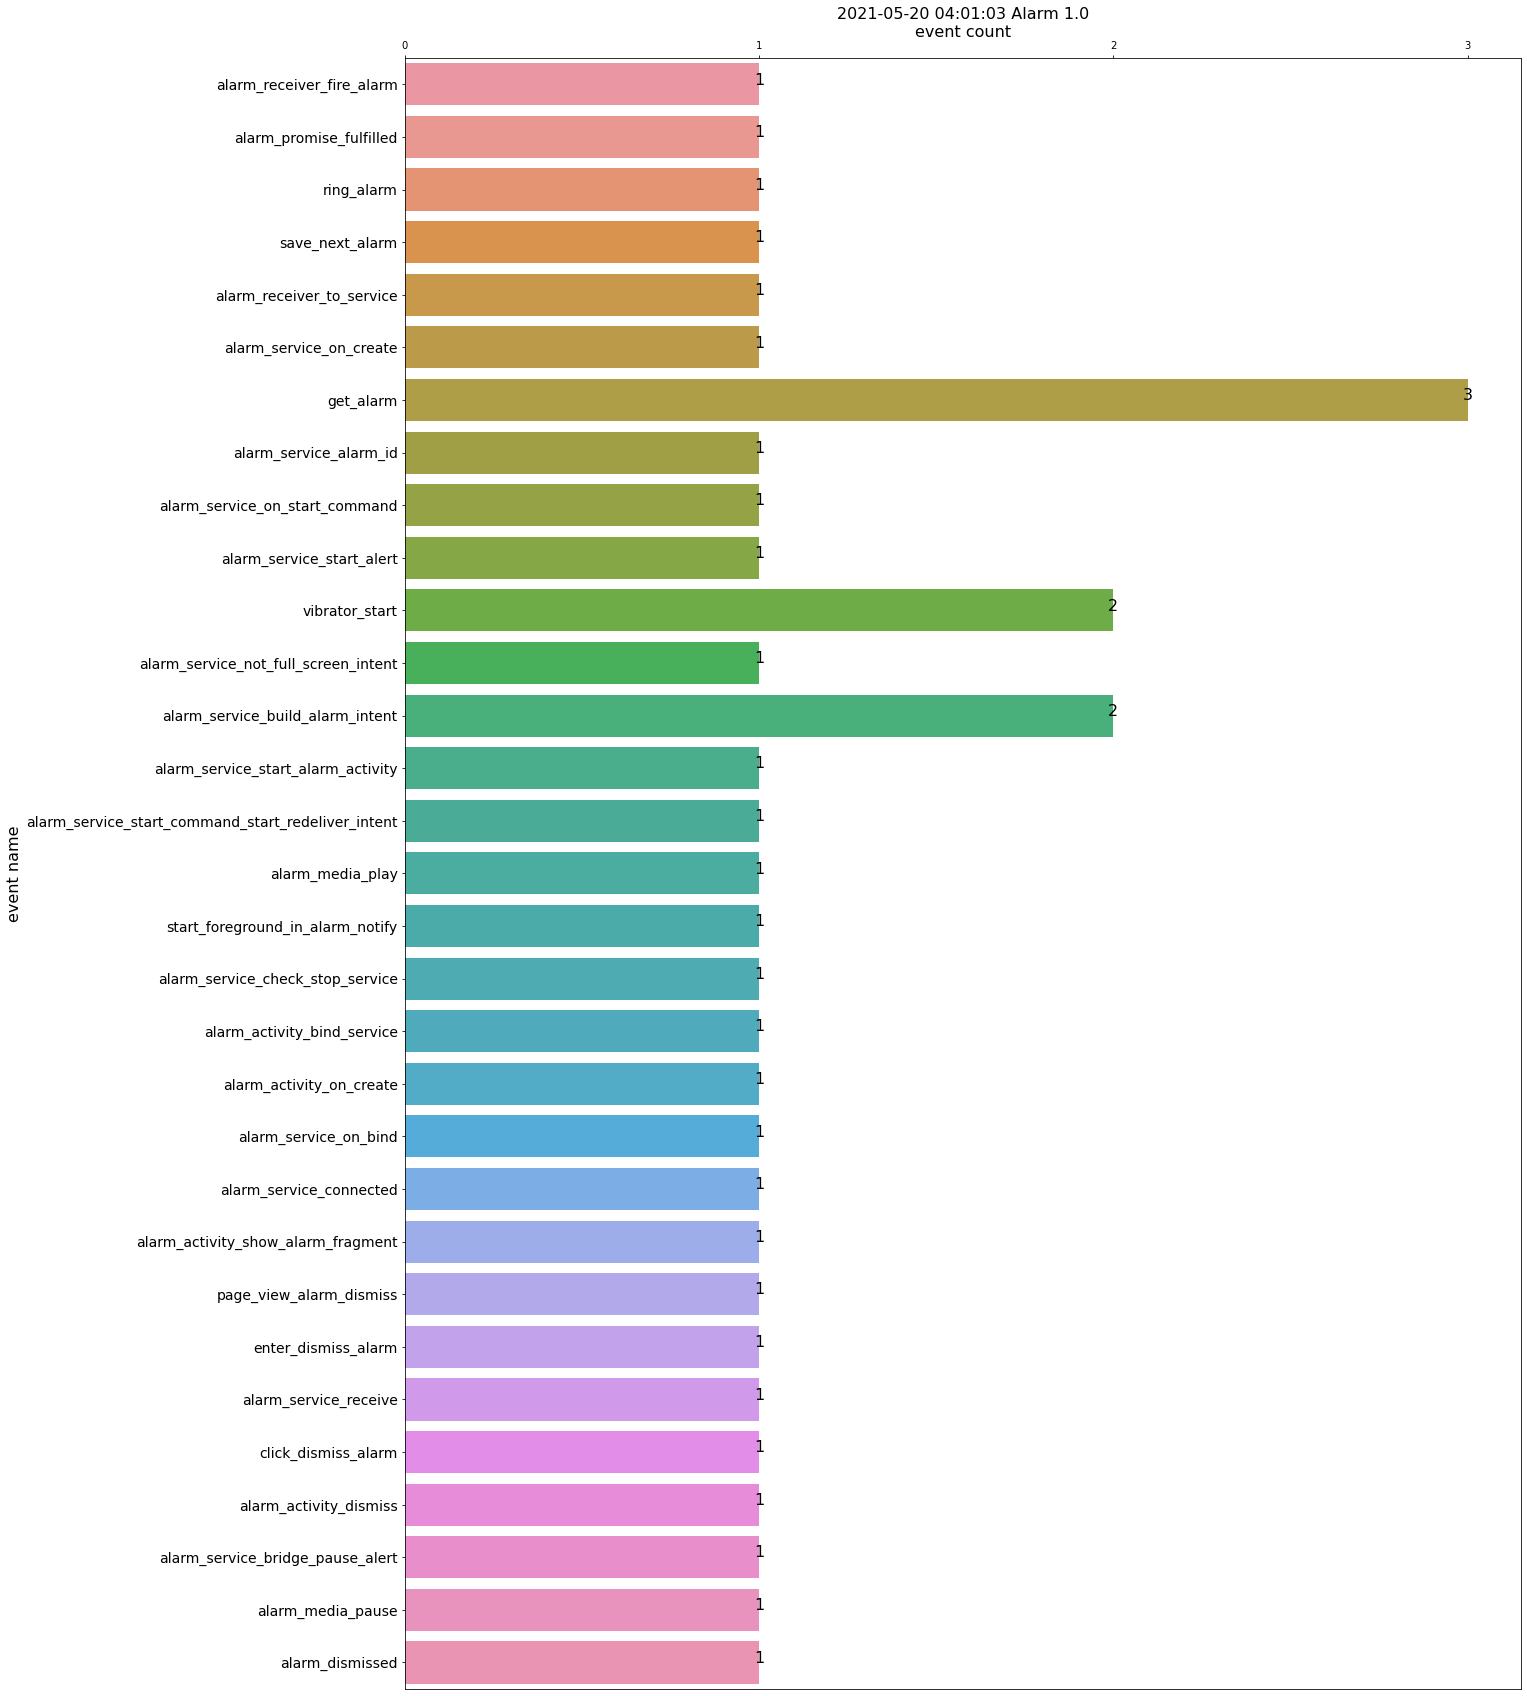

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 2961),
 ('alarm_promise_id', '2f1a5424-ca00-4316-9243-0ee6cc985a31'),
 ('alarm_time', 1621502700000),
 ('alarm_time_formatted', '2021-05-20 04:25:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621502708312),
 ('fire_timestamp', 1621589100000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 4),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

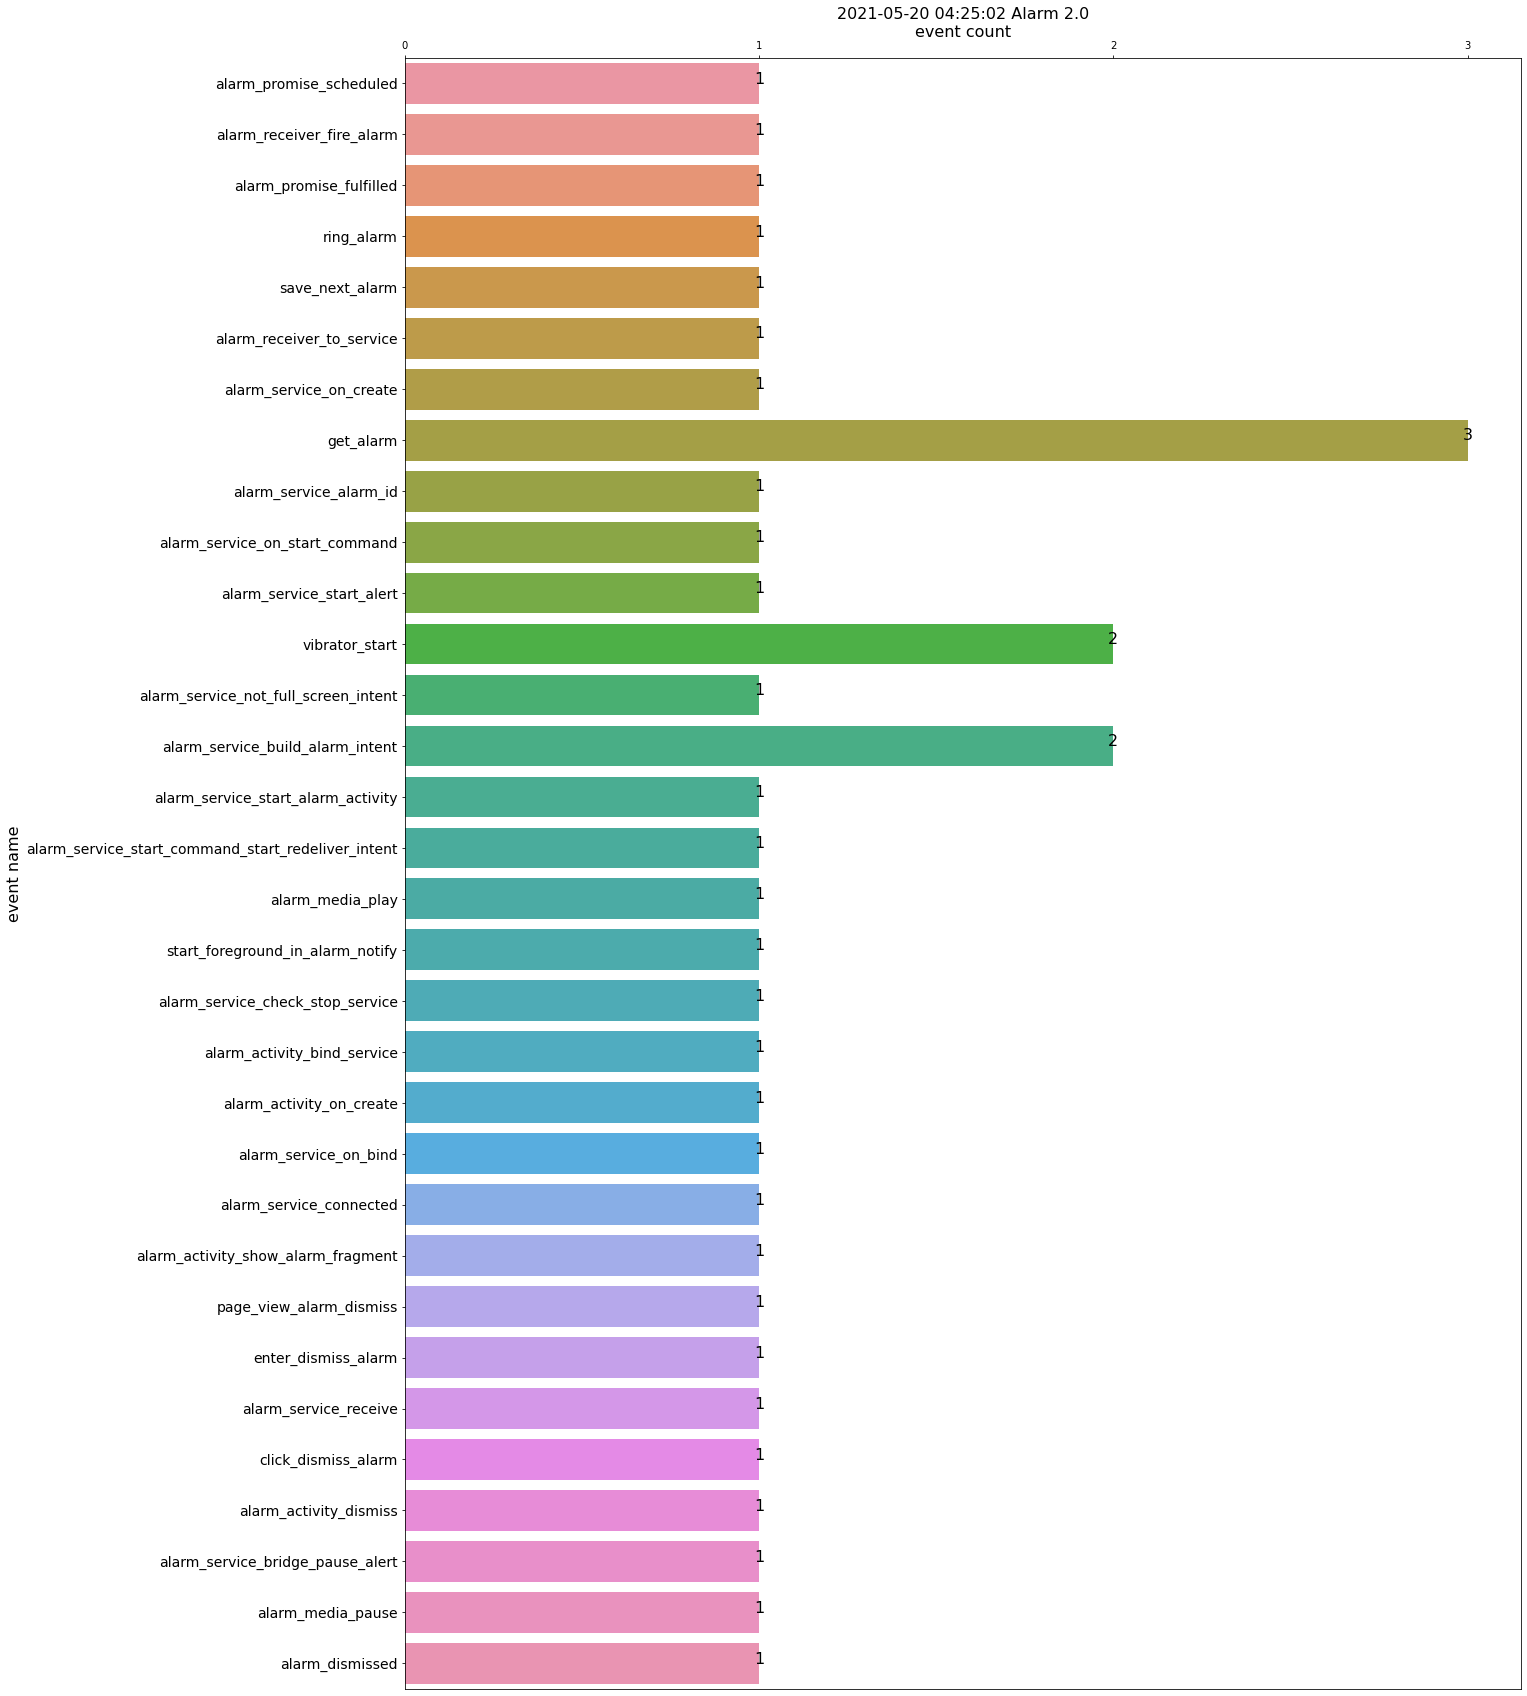

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'sweet home alabama'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1471'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_4'),
 ('alarm_offset_time', 2796),
 ('alarm_promise_id', '3c313846-5626-4fb2-bd33-de440c35c8b8'),
 ('alarm_time', 1621543500000),
 ('alarm_time_formatted', '2021-05-20 15:45:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621543506036),
 ('fire_timestamp', 1621629900000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 15),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', Fals

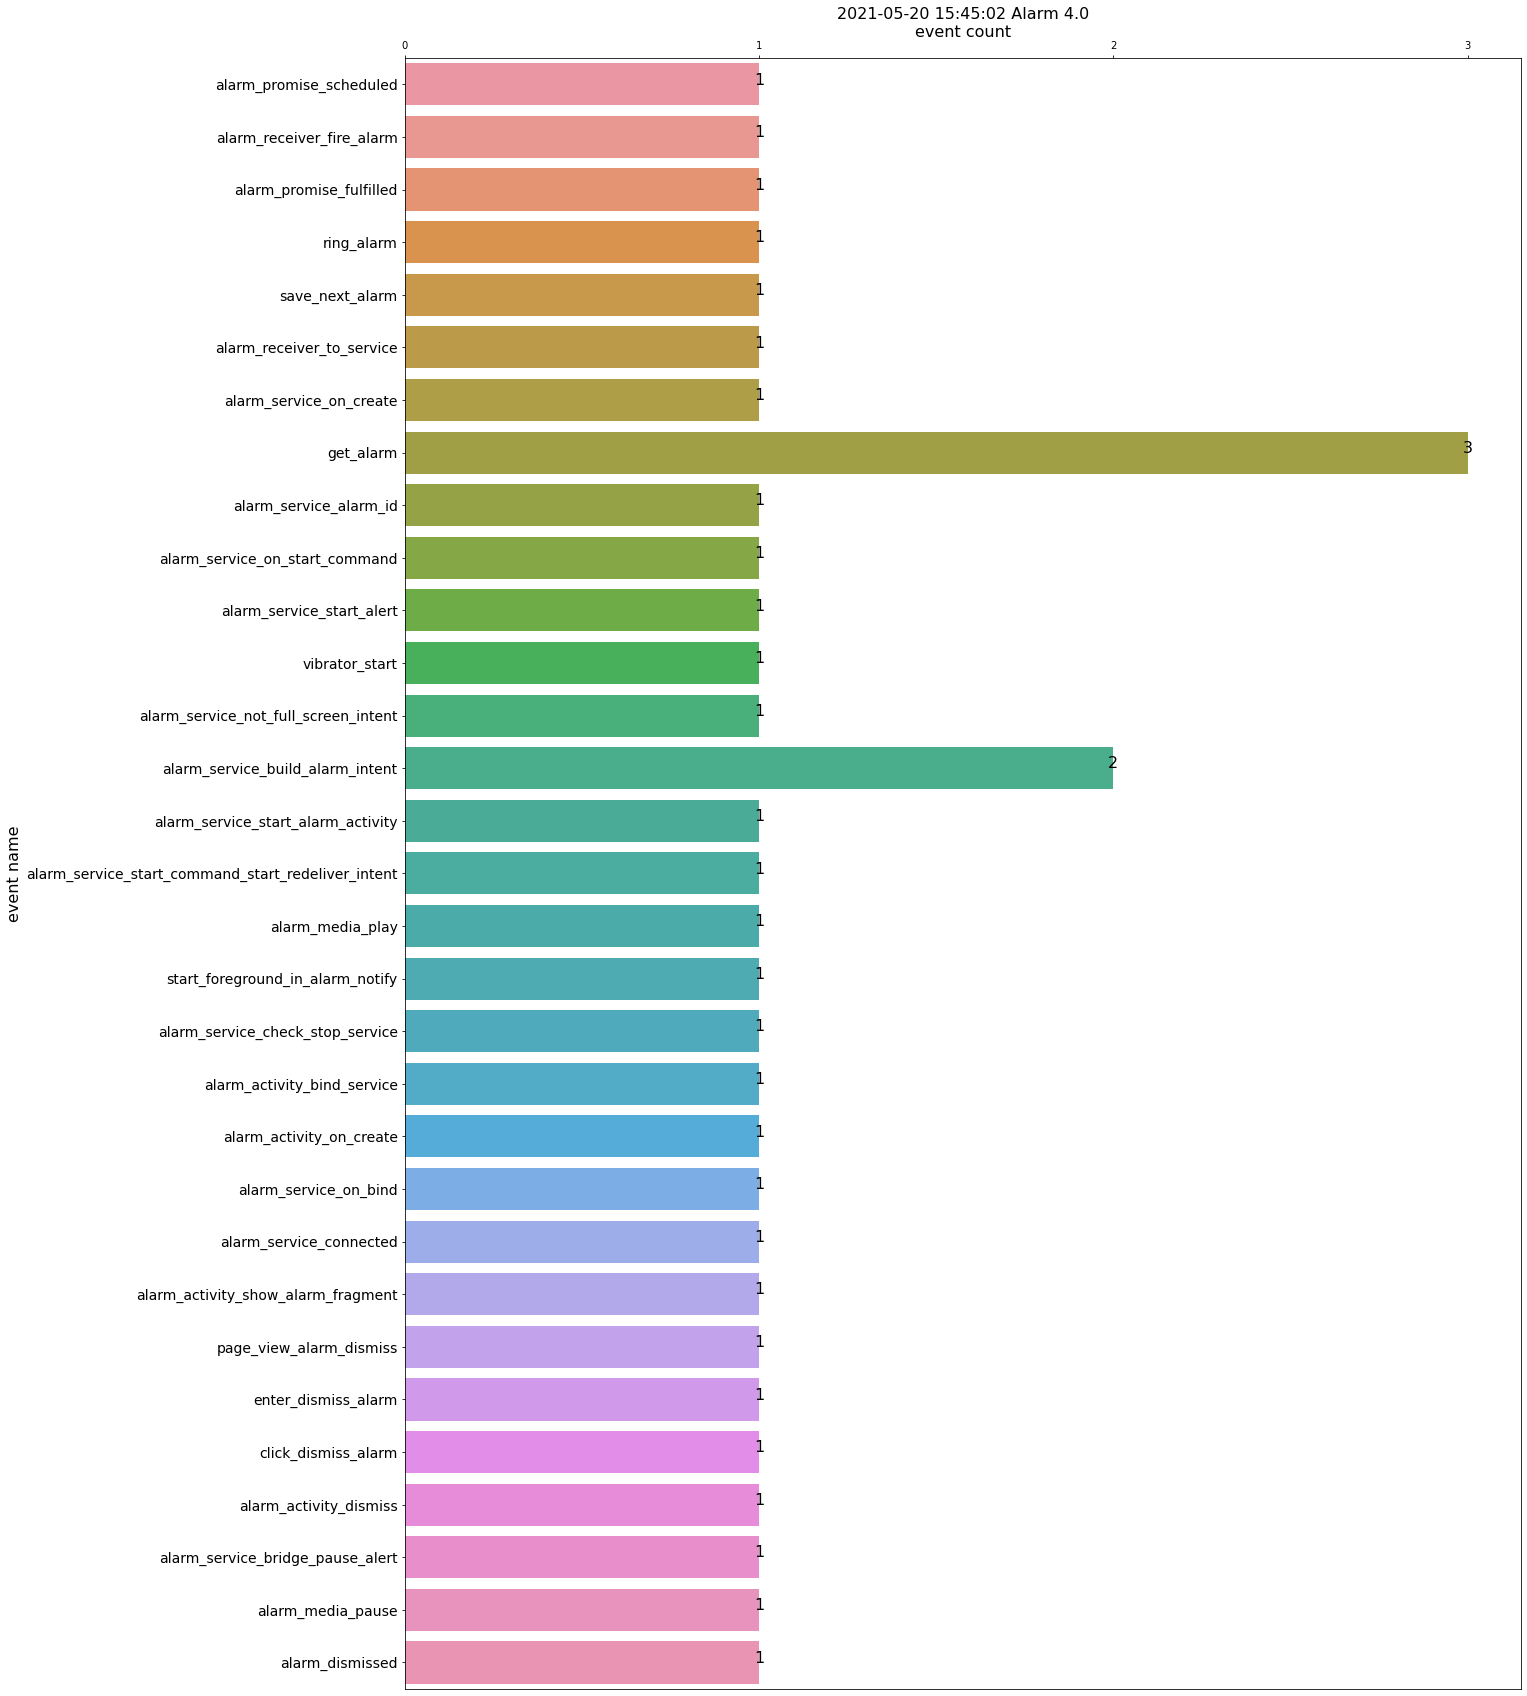

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_11'),
 ('alarm_offset_time', 2756),
 ('alarm_promise_id', '7b0d6ded-dff0-4af7-ab51-30b35879aec9'),
 ('alarm_time', 1621554360000),
 ('alarm_time_formatted', '2021-05-20 18:46:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 77),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621554391446),
 ('fire_timestamp', 1621640760000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 18),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', True),
 ('is_random', Fal

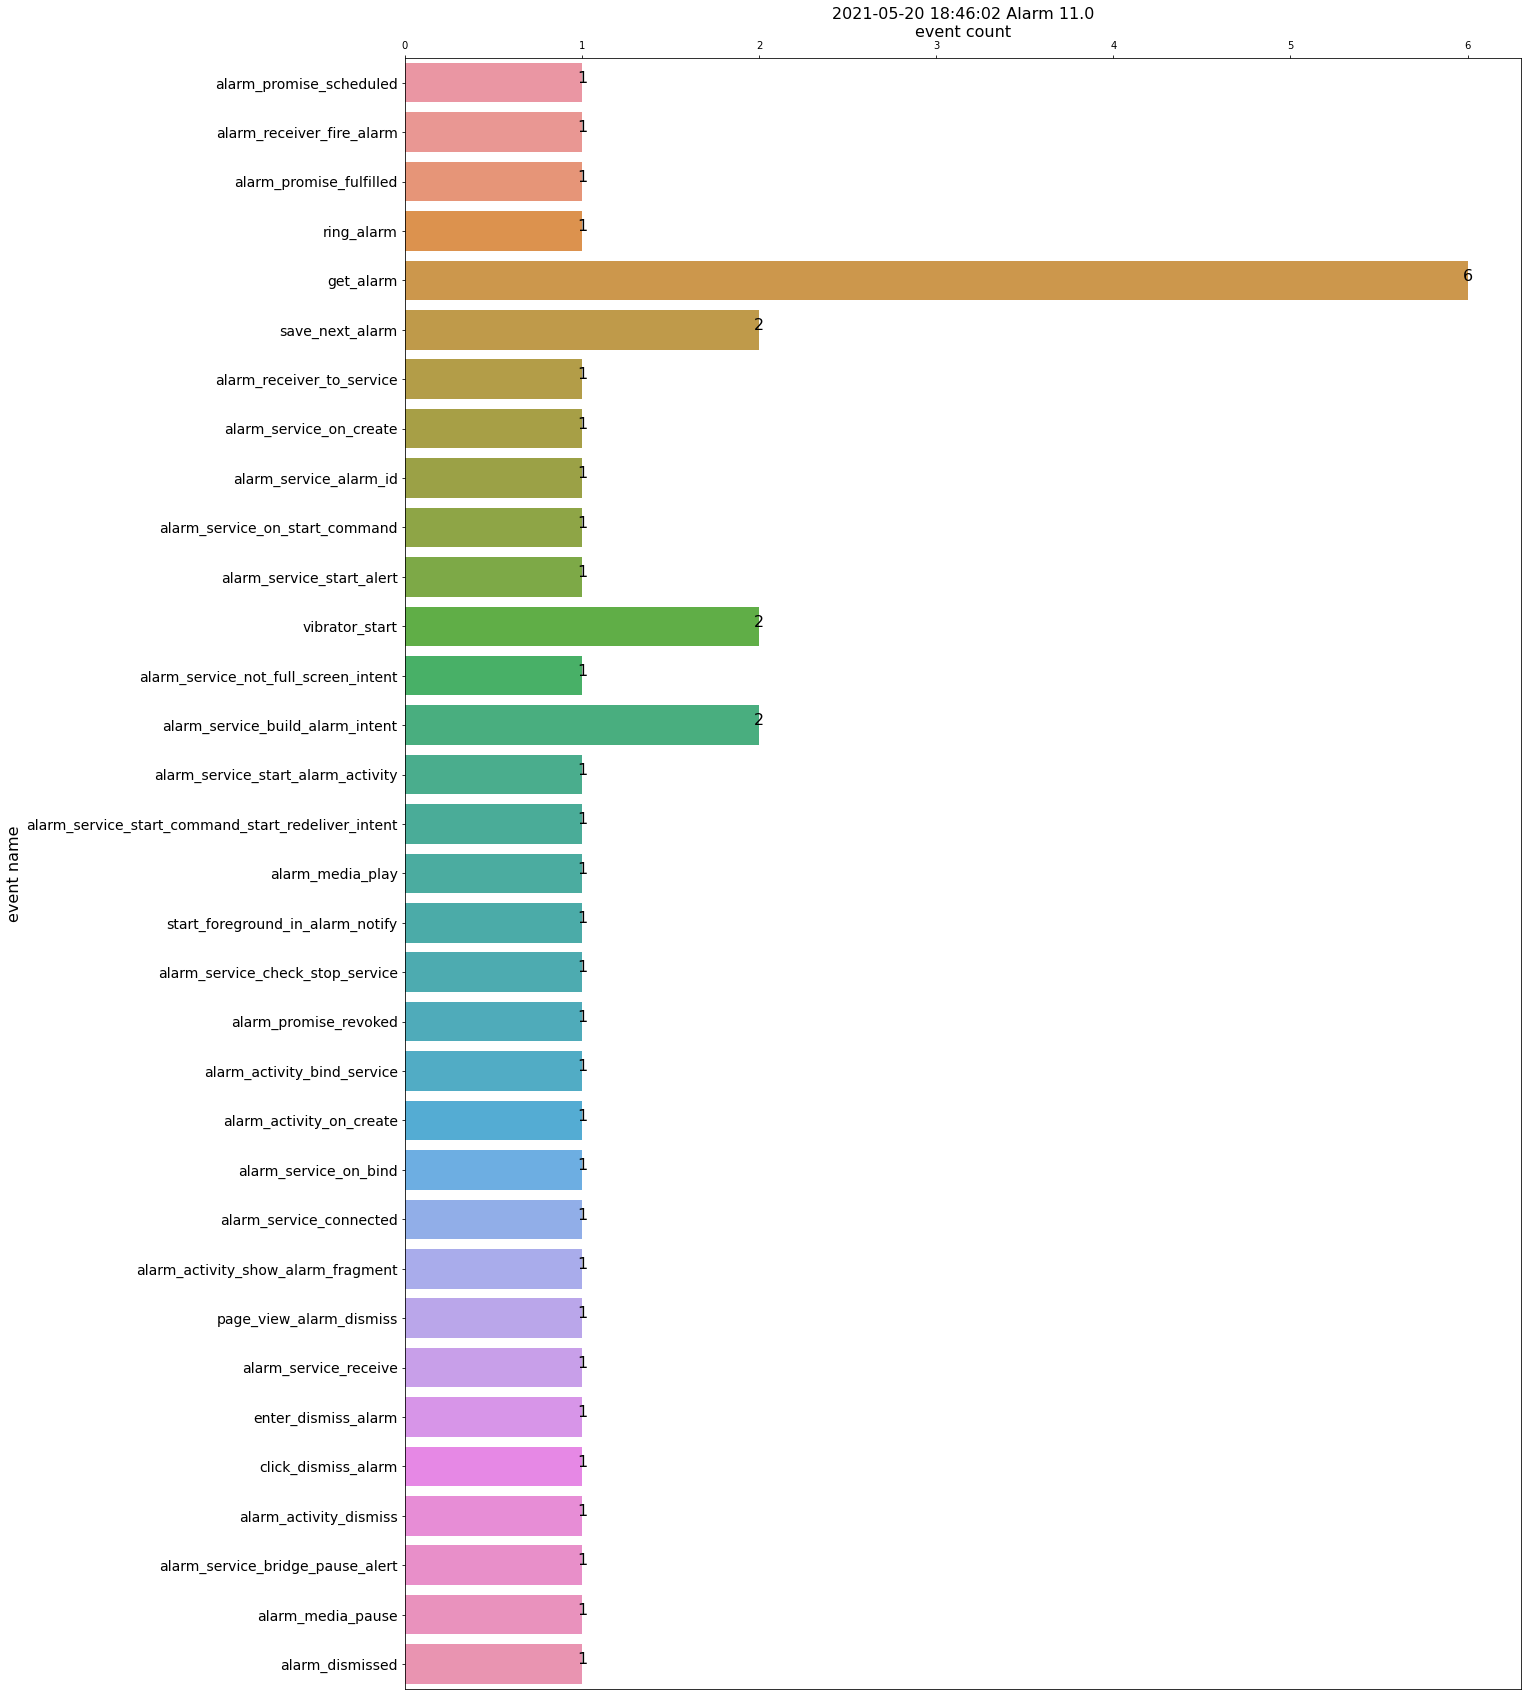

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_7'),
 ('alarm_offset_time', 3323),
 ('alarm_promise_id', 'dbc9be7e-f48f-49f5-9e7b-88428b10c2ad'),
 ('alarm_time', 1621640100000),
 ('alarm_time_formatted', '2021-05-21 18:35:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621640111028),
 ('fire_timestamp', 1622244900000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 18),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fals

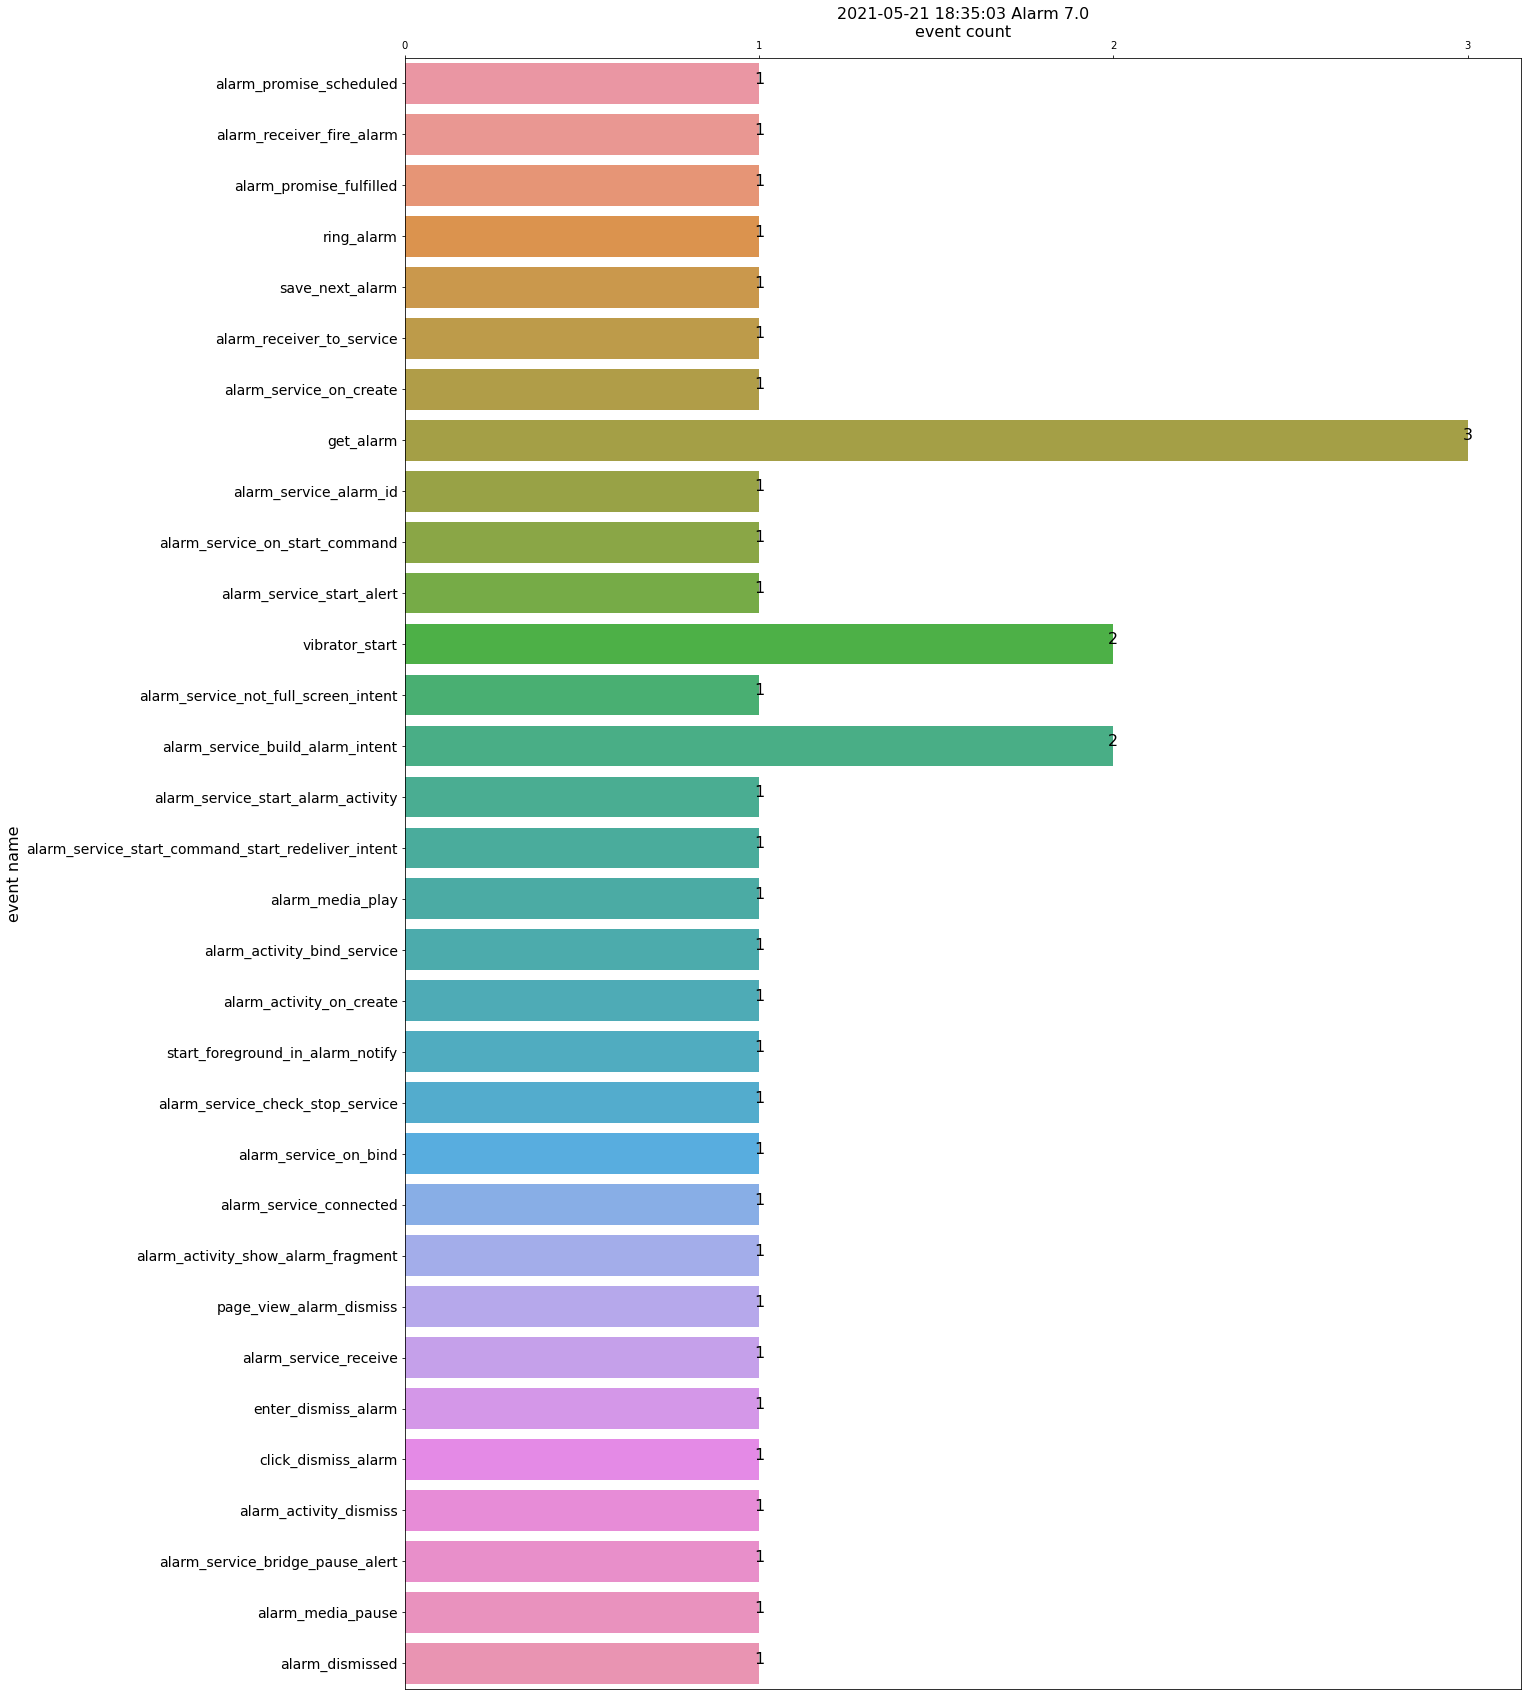

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_7'),
 ('alarm_offset_time', 2312),
 ('alarm_promise_id', '9952d55b-1204-4875-9102-28d4b23ca033'),
 ('alarm_time', 1621640460000),
 ('alarm_time_formatted', '2021-05-21 18:41:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621640474852),
 ('fire_timestamp', 1622245260000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 18),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('

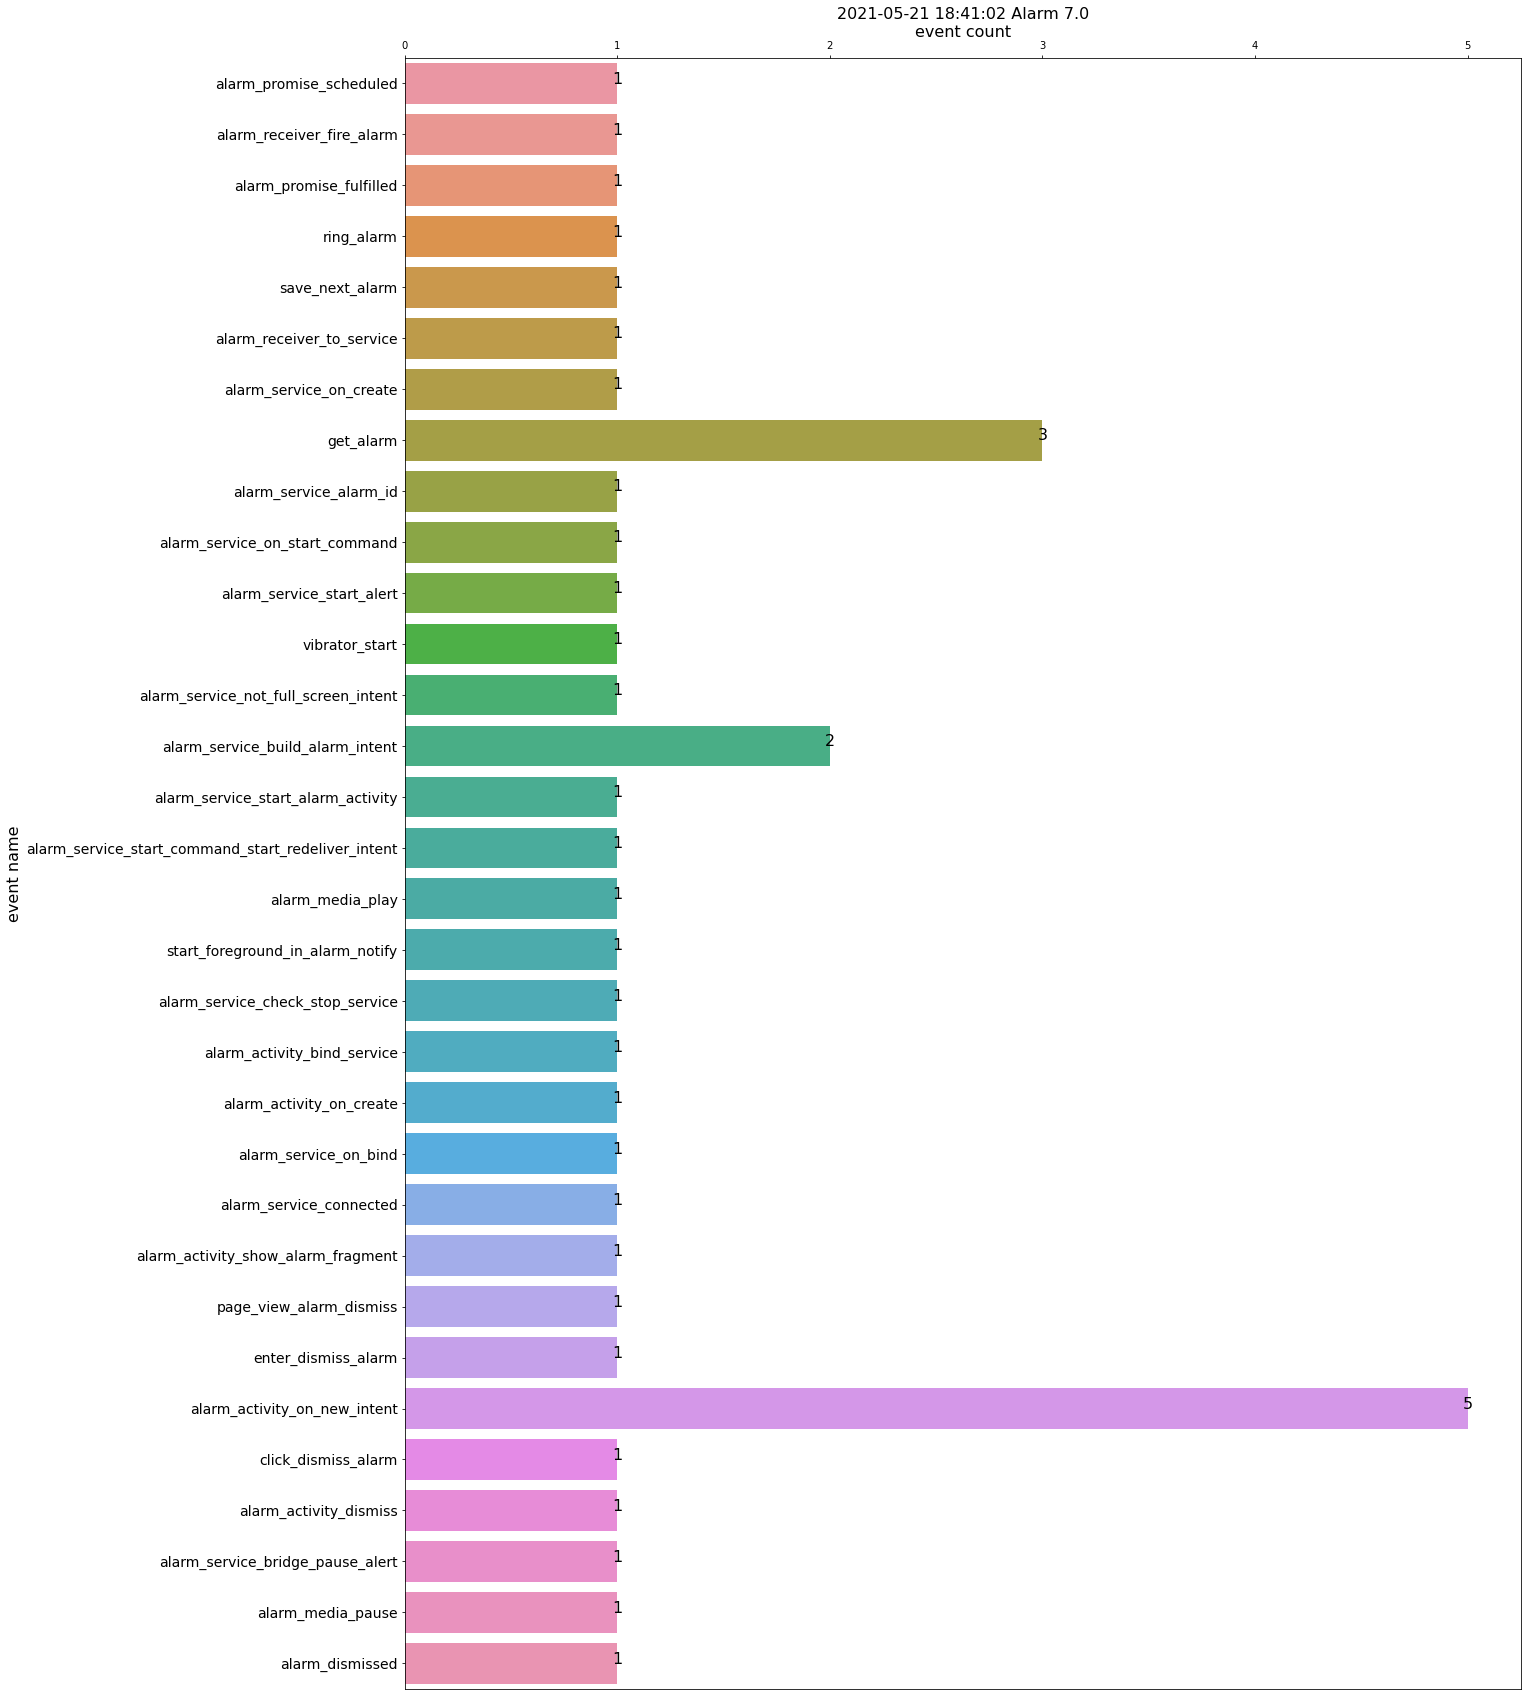

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_8'),
 ('alarm_offset_time', 2704),
 ('alarm_promise_id', '7b3a9e7e-6b05-447d-a403-19c3525795b2'),
 ('alarm_time', 1621674060000),
 ('alarm_time_formatted', '2021-05-22 04:01:00'),
 ('alarm_volume', 10),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621674074817),
 ('fire_timestamp', 1622278860000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 4),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

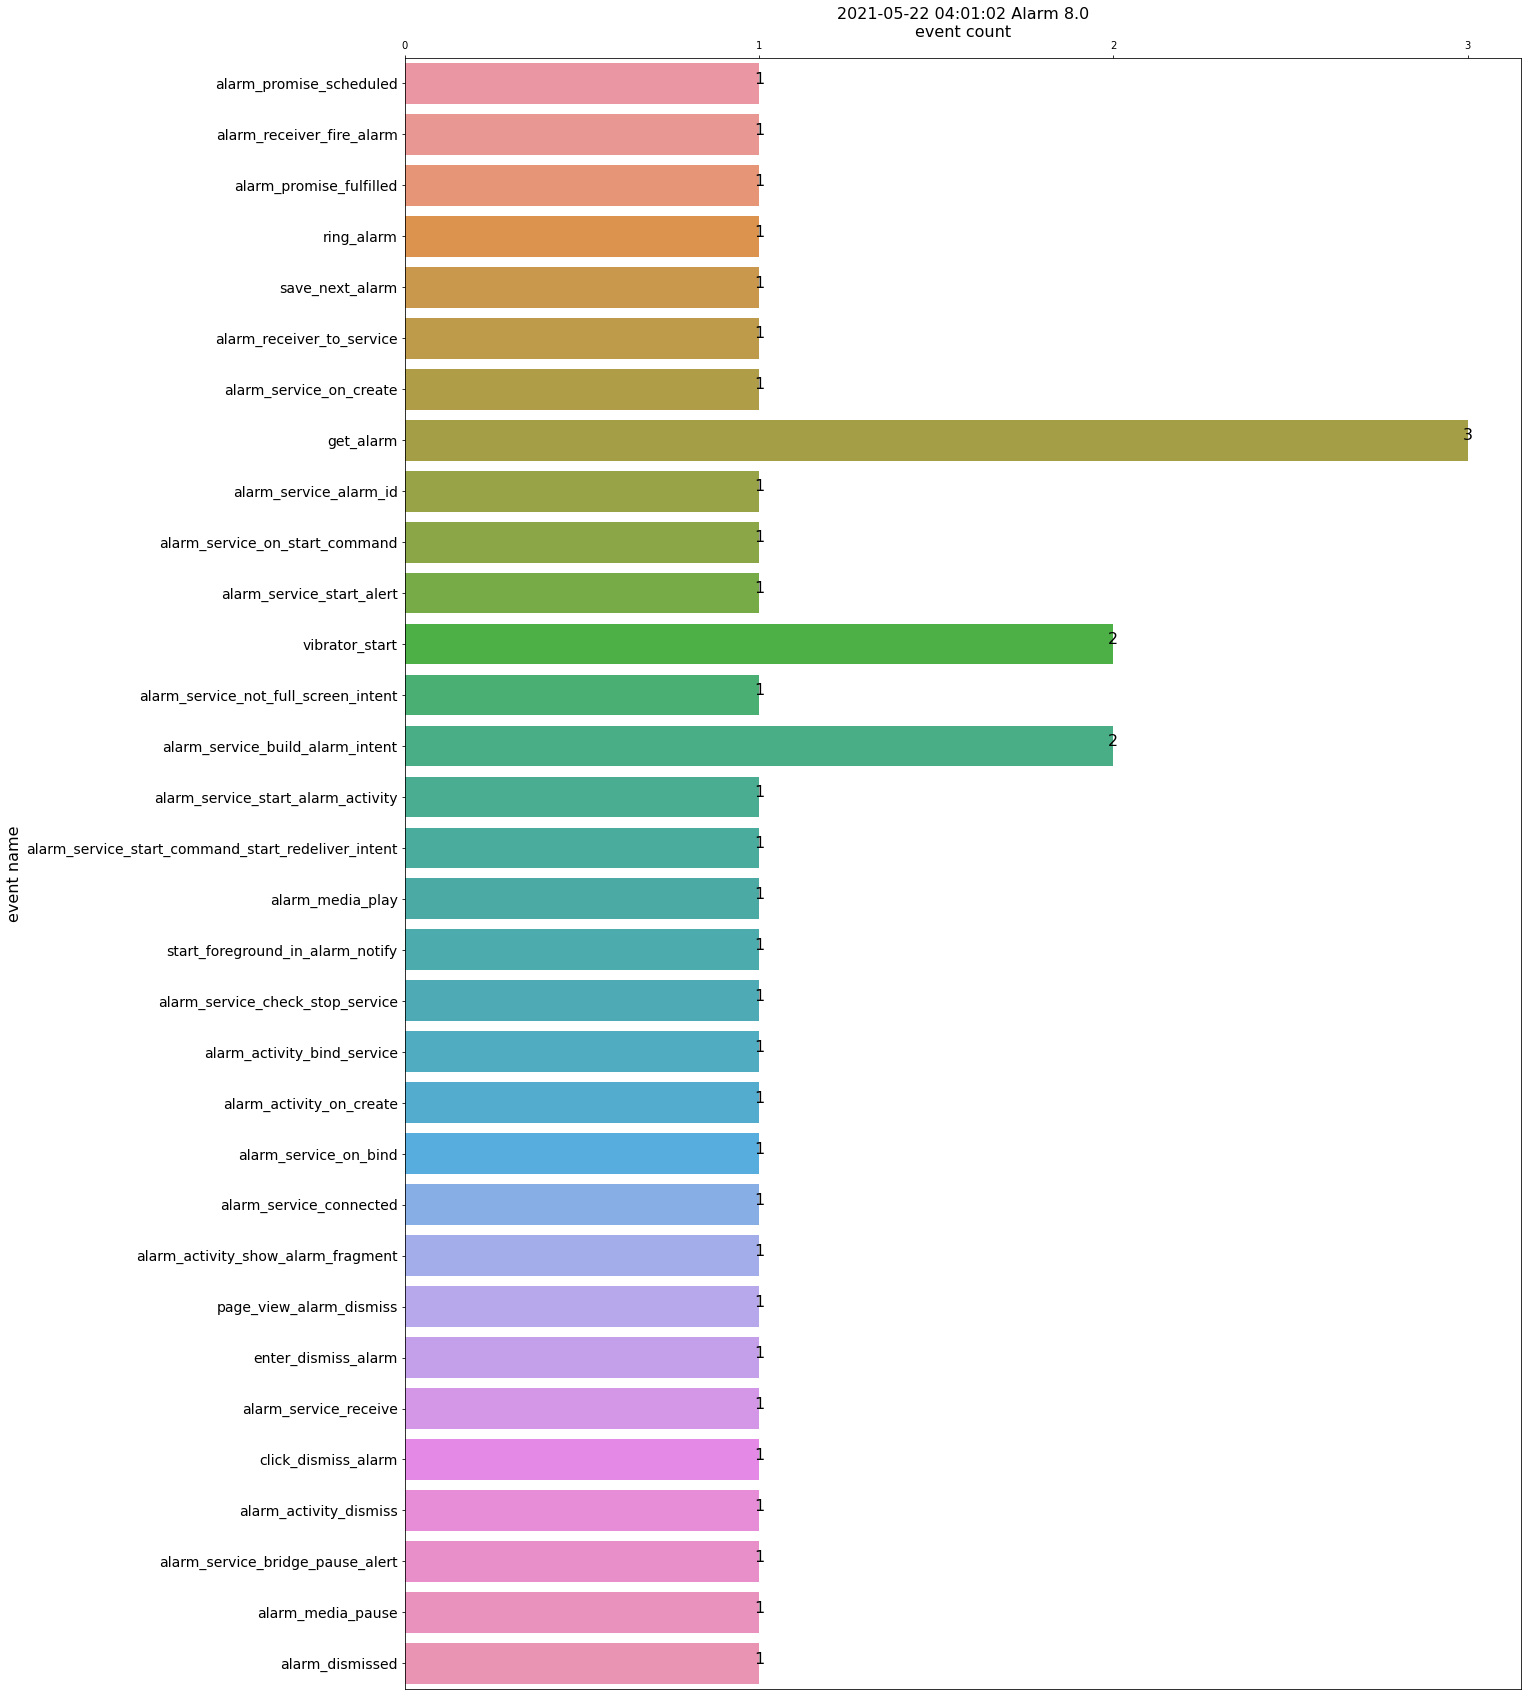

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_3'),
 ('alarm_offset_time', 68),
 ('alarm_promise_id', 'b0ebd4ae-d65a-4753-b6be-1b453aa5d109'),
 ('alarm_time', 1621760460000),
 ('alarm_time_formatted', '2021-05-23 04:01:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621760781306),
 ('fire_timestamp', 1622365260000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 4),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', True),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

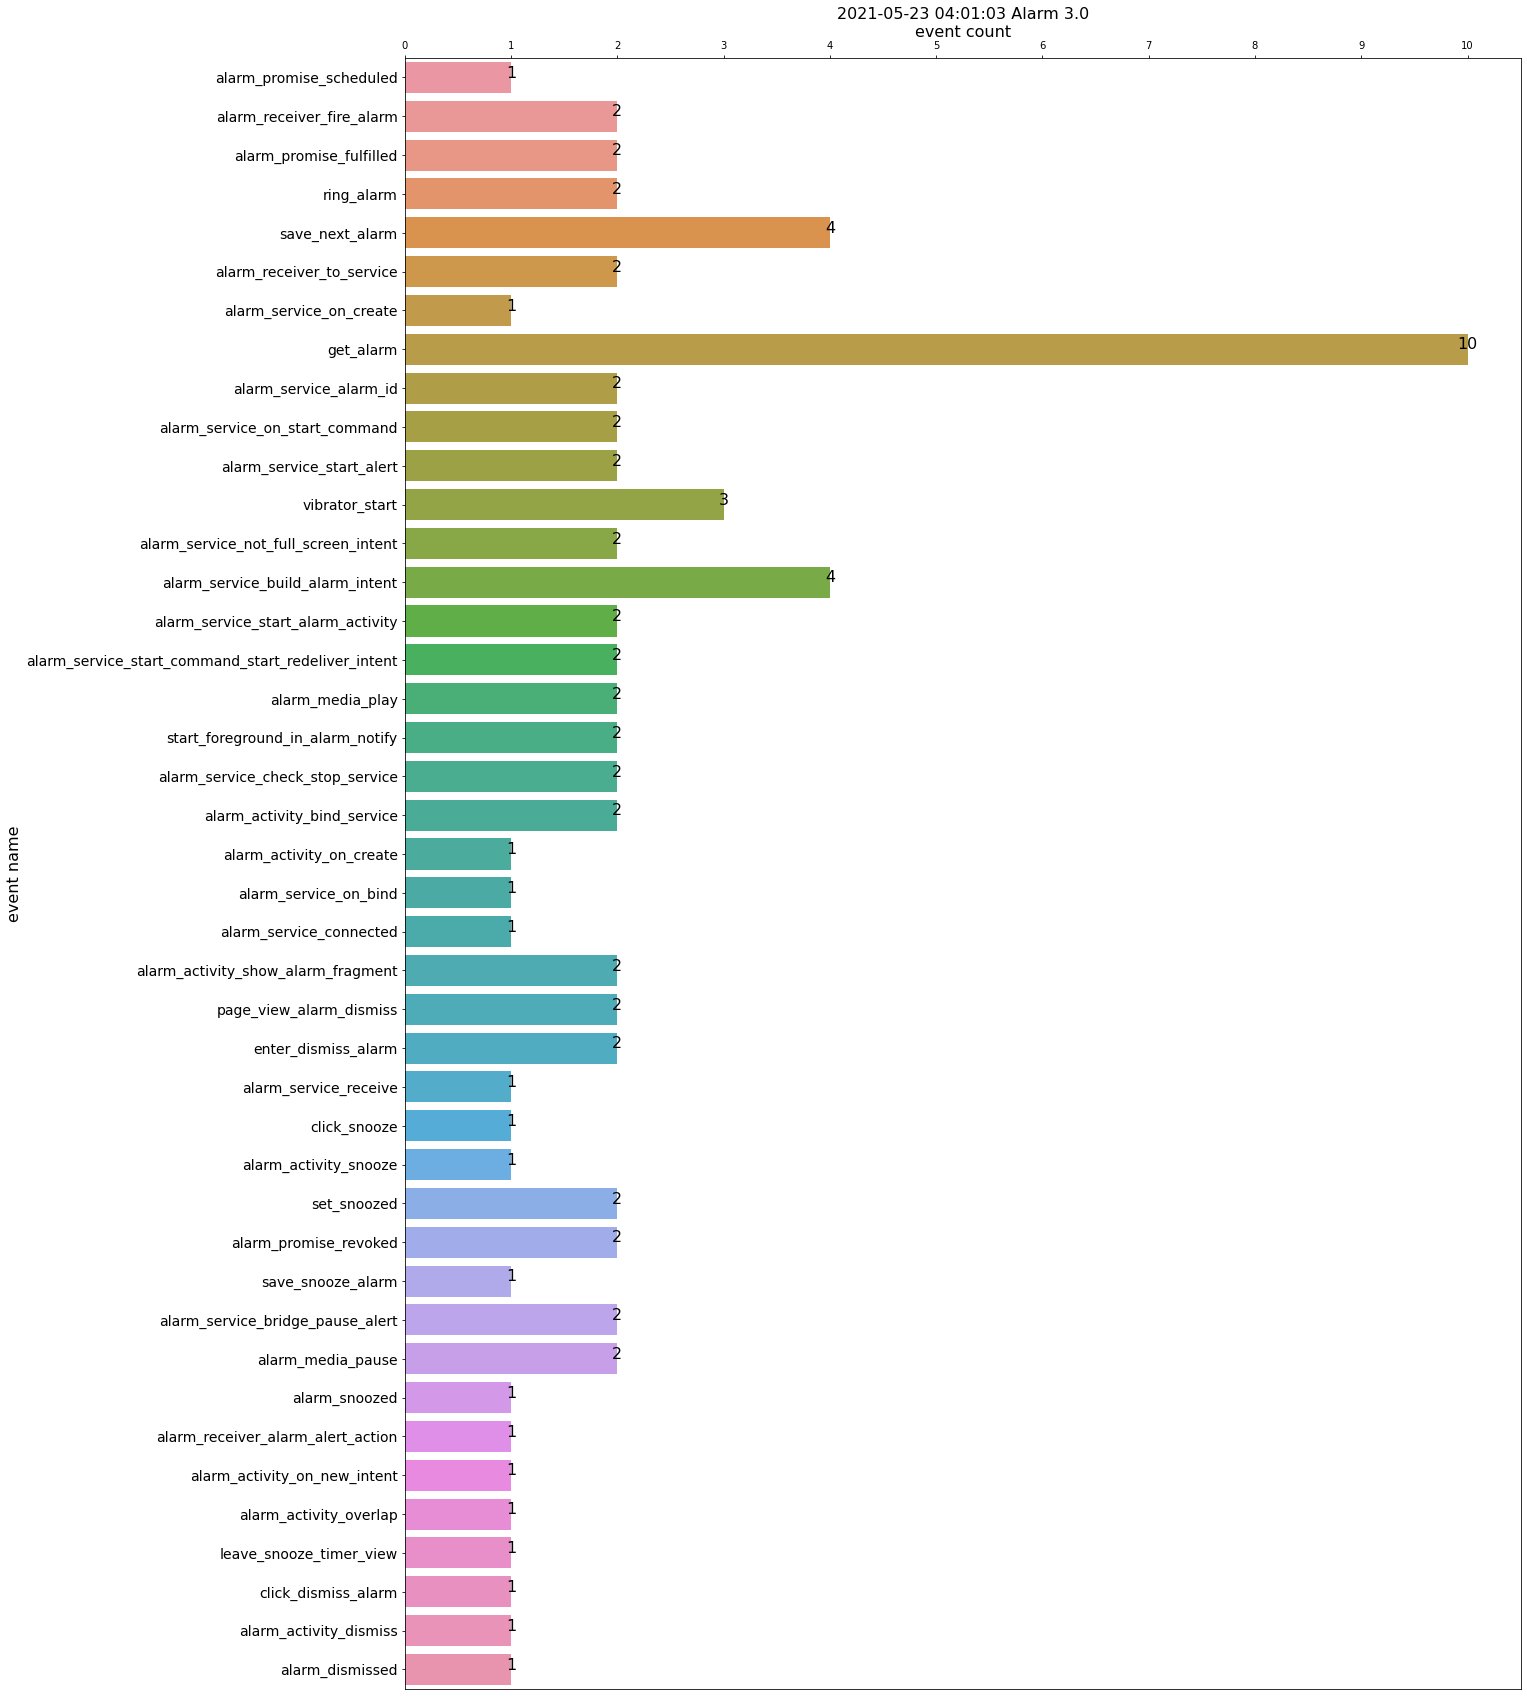

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_3'),
 ('alarm_offset_time', 68),
 ('alarm_promise_id', 'b0ebd4ae-d65a-4753-b6be-1b453aa5d109'),
 ('alarm_time', 1621760774426),
 ('alarm_time_formatted', '2021-05-23 04:06:14'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621760781306),
 ('fire_timestamp', 1622365260000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 4),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', True),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('i

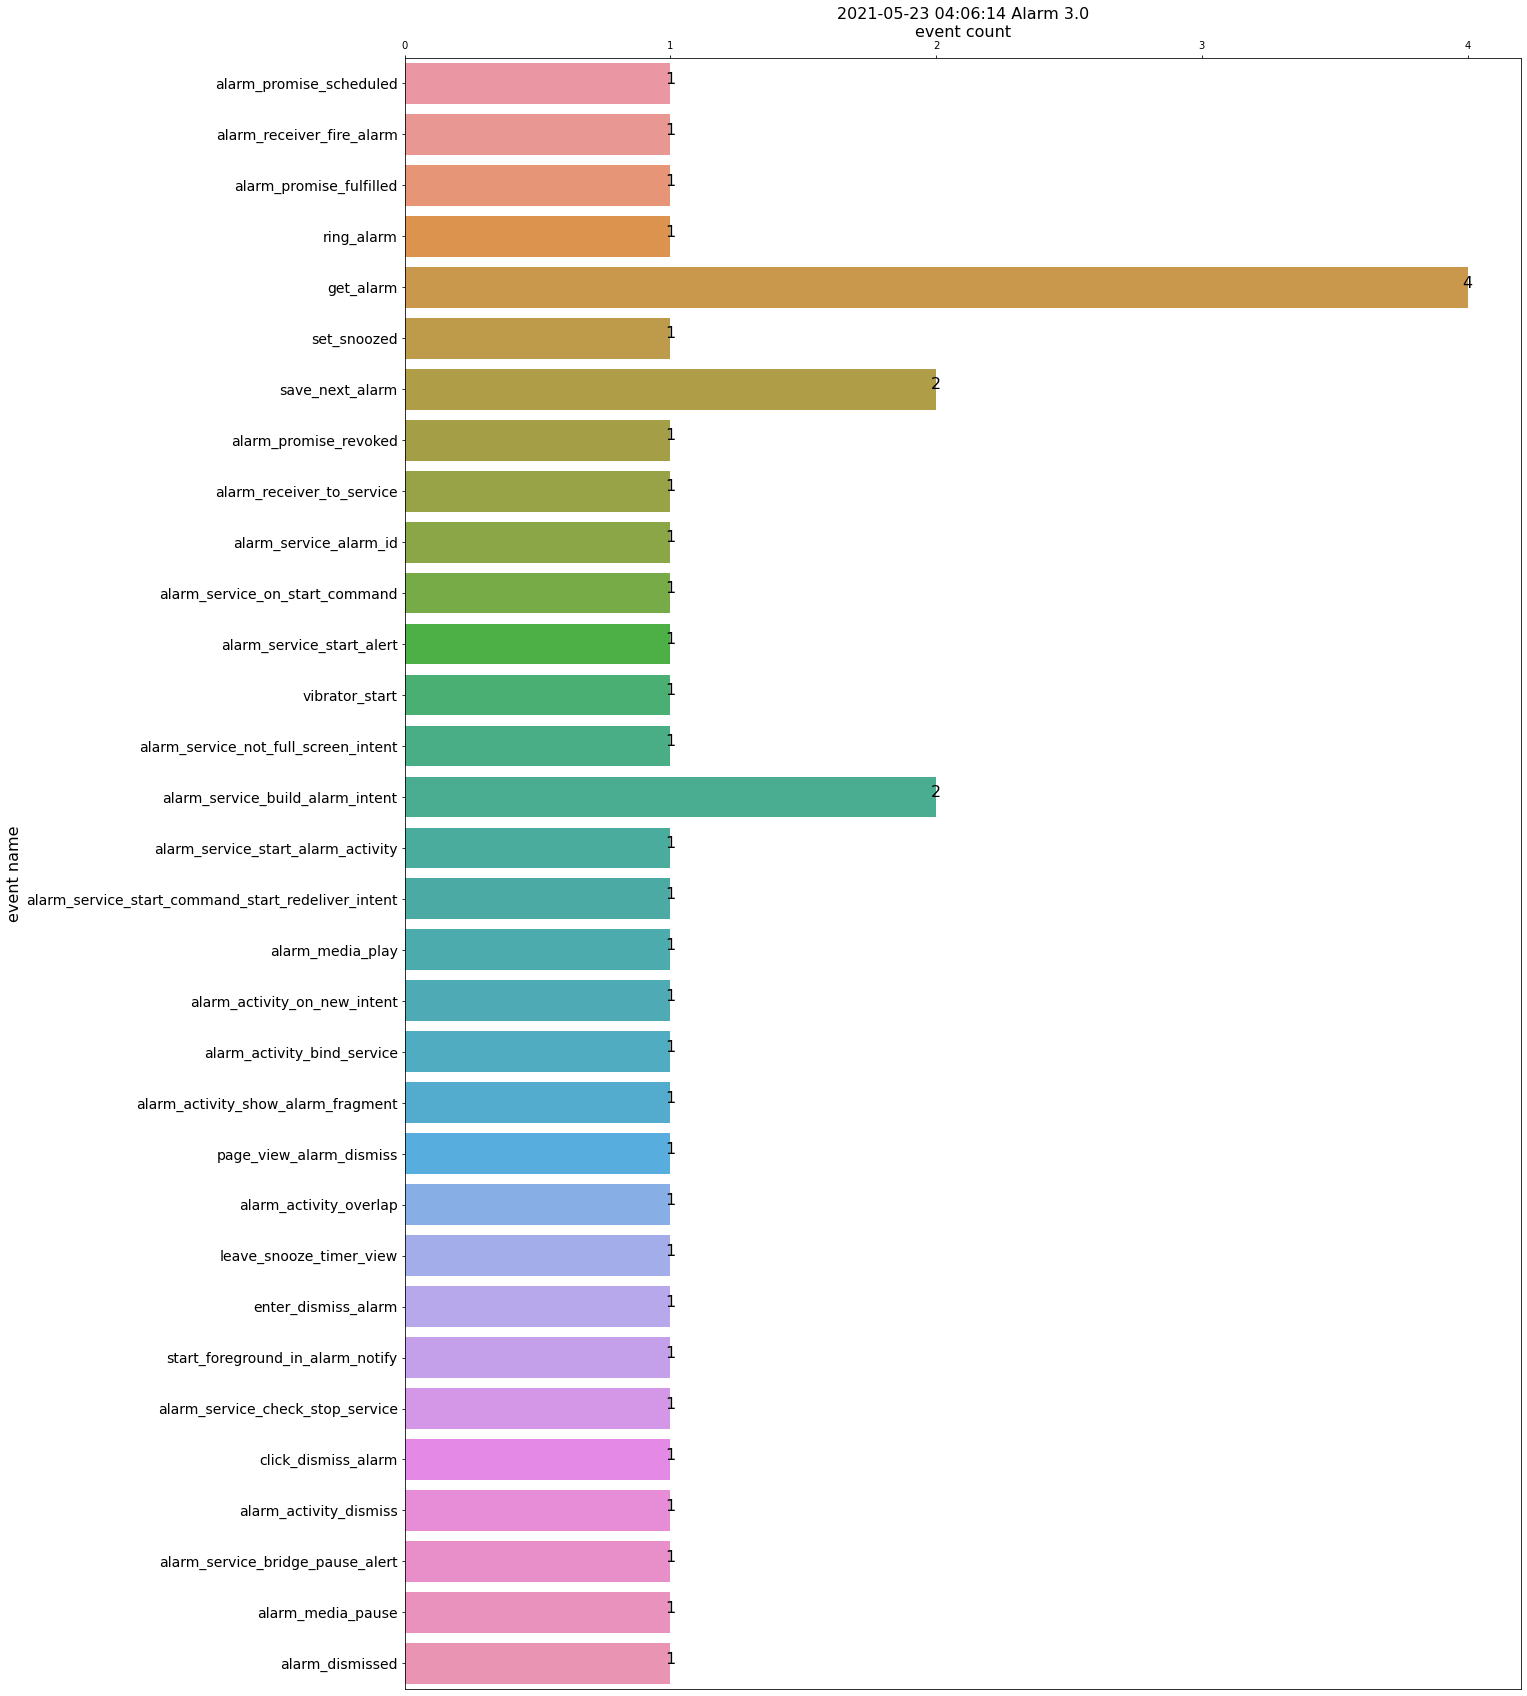

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_5'),
 ('alarm_offset_time', 2939),
 ('alarm_promise_id', '9f6375a6-4734-4e83-a4a6-e53353eabc79'),
 ('alarm_time', 1621762260000),
 ('alarm_time_formatted', '2021-05-23 04:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621762270354),
 ('fire_timestamp', 1622367060000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 4),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

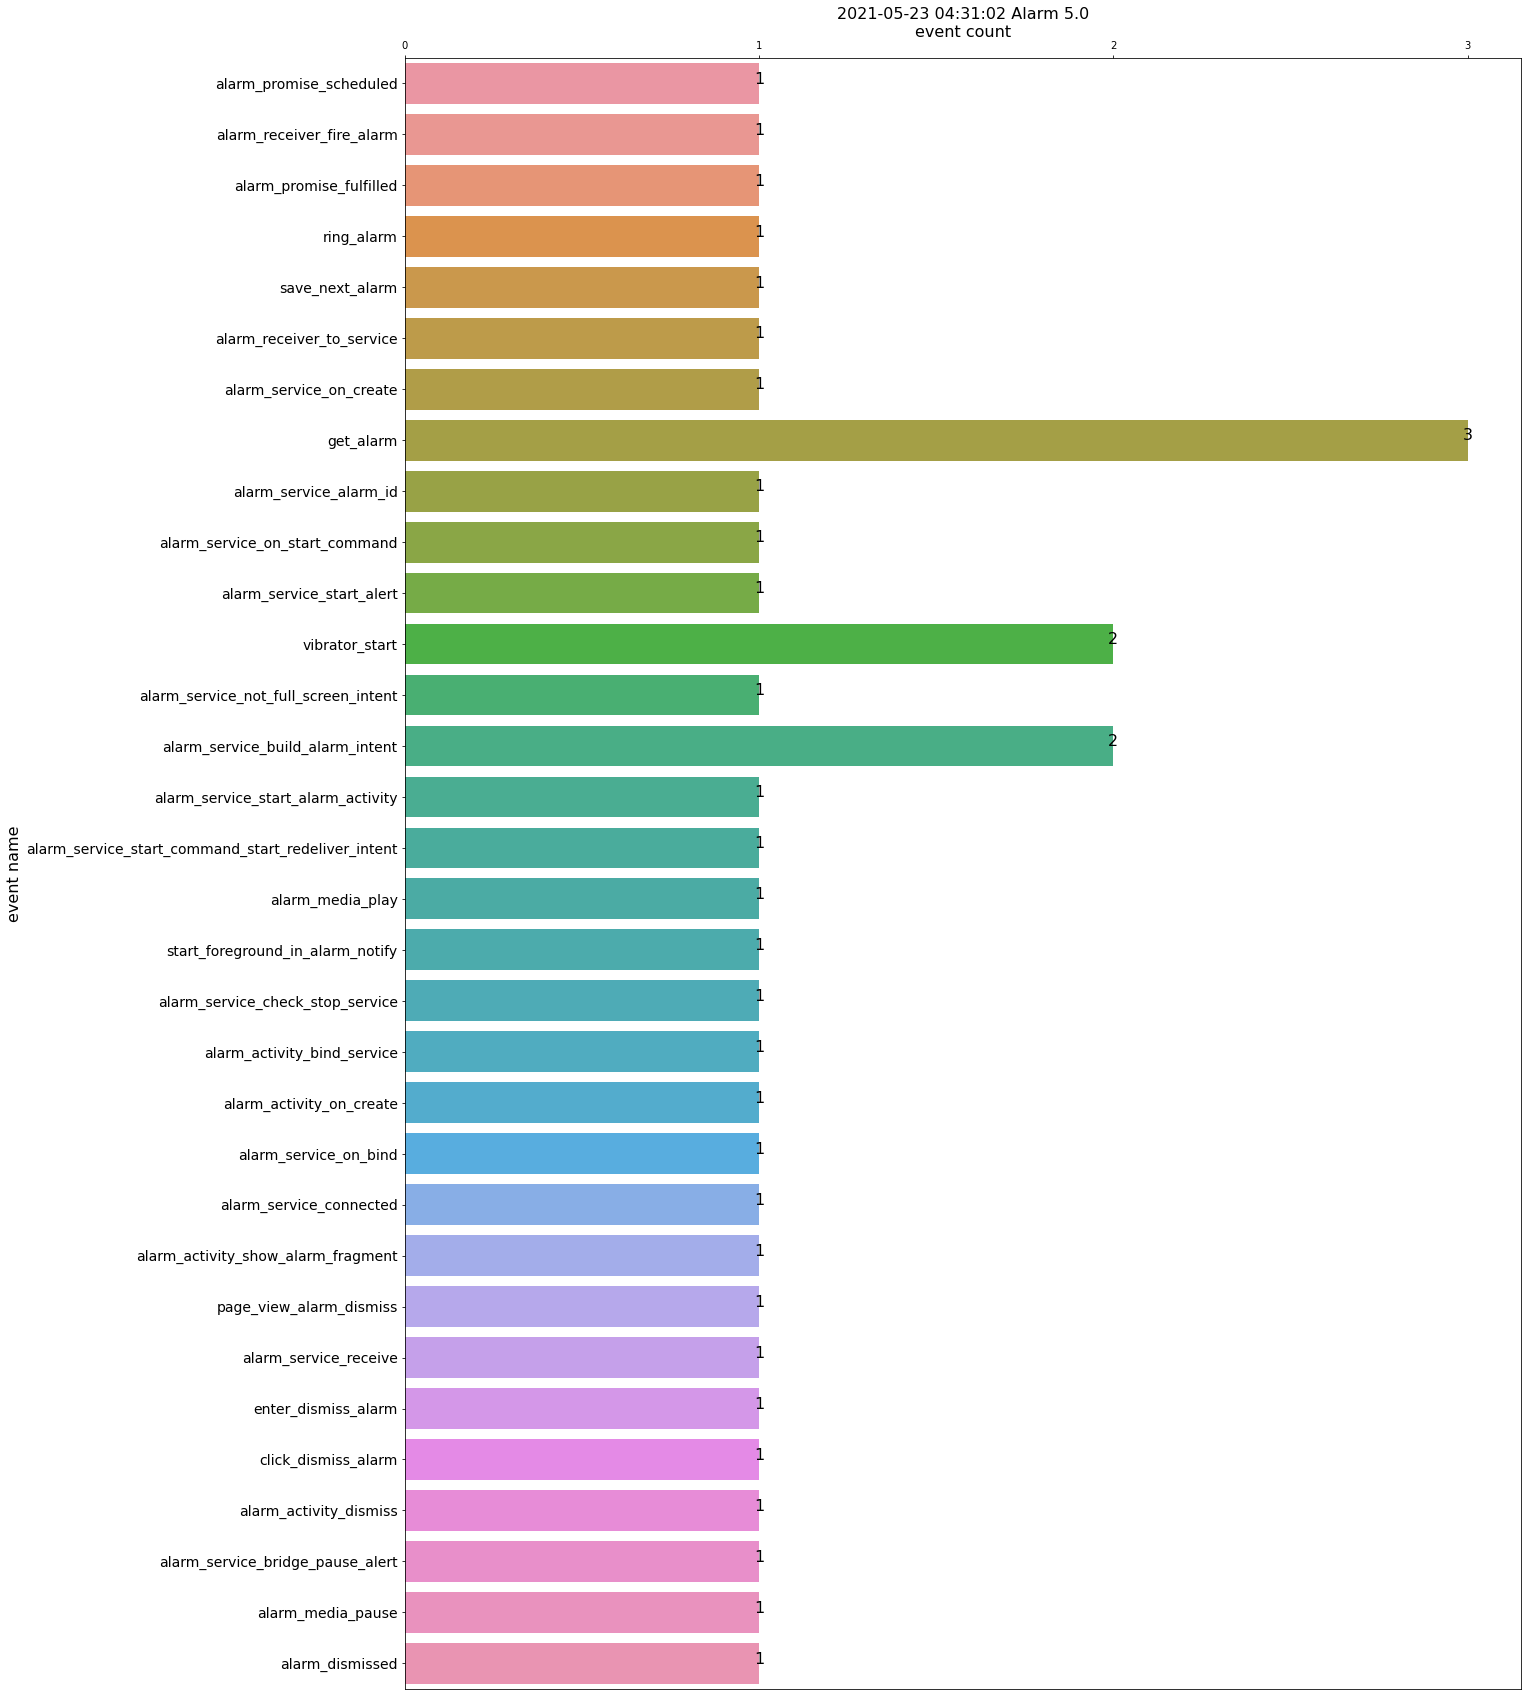

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 4646),
 ('alarm_promise_id', '132cd674-5569-4a4d-a275-b48658080c29'),
 ('alarm_time', 1621843260000),
 ('alarm_time_formatted', '2021-05-24 03:01:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621843279558),
 ('fire_timestamp', 1621929660000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

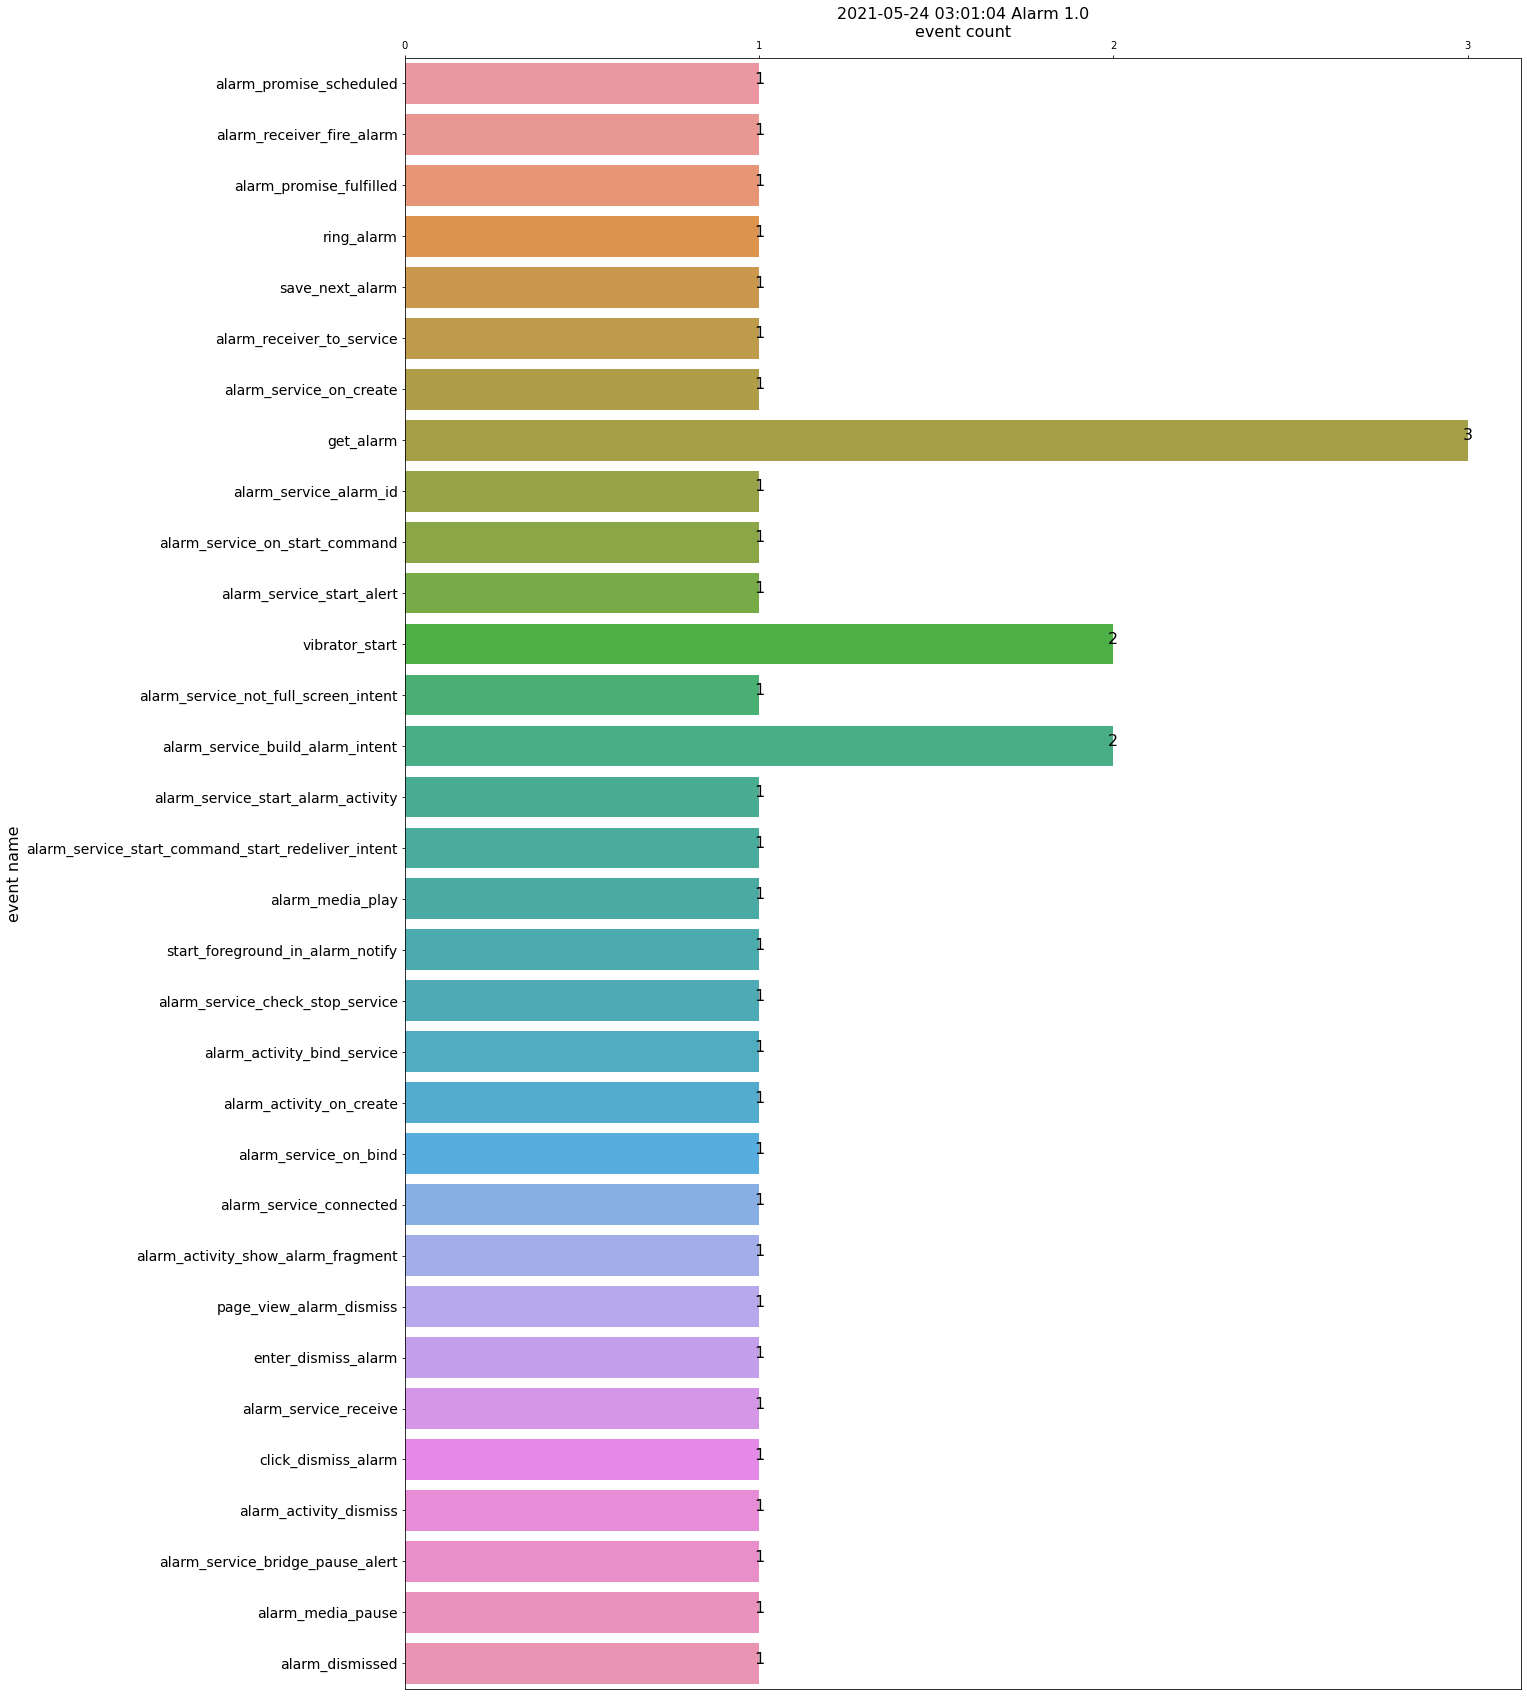

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 3114),
 ('alarm_promise_id', '6a7fe8e5-eeeb-4c26-9513-114452f4c79e'),
 ('alarm_time', 1621845060000),
 ('alarm_time_formatted', '2021-05-24 03:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621845083474),
 ('fire_timestamp', 1621931460000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

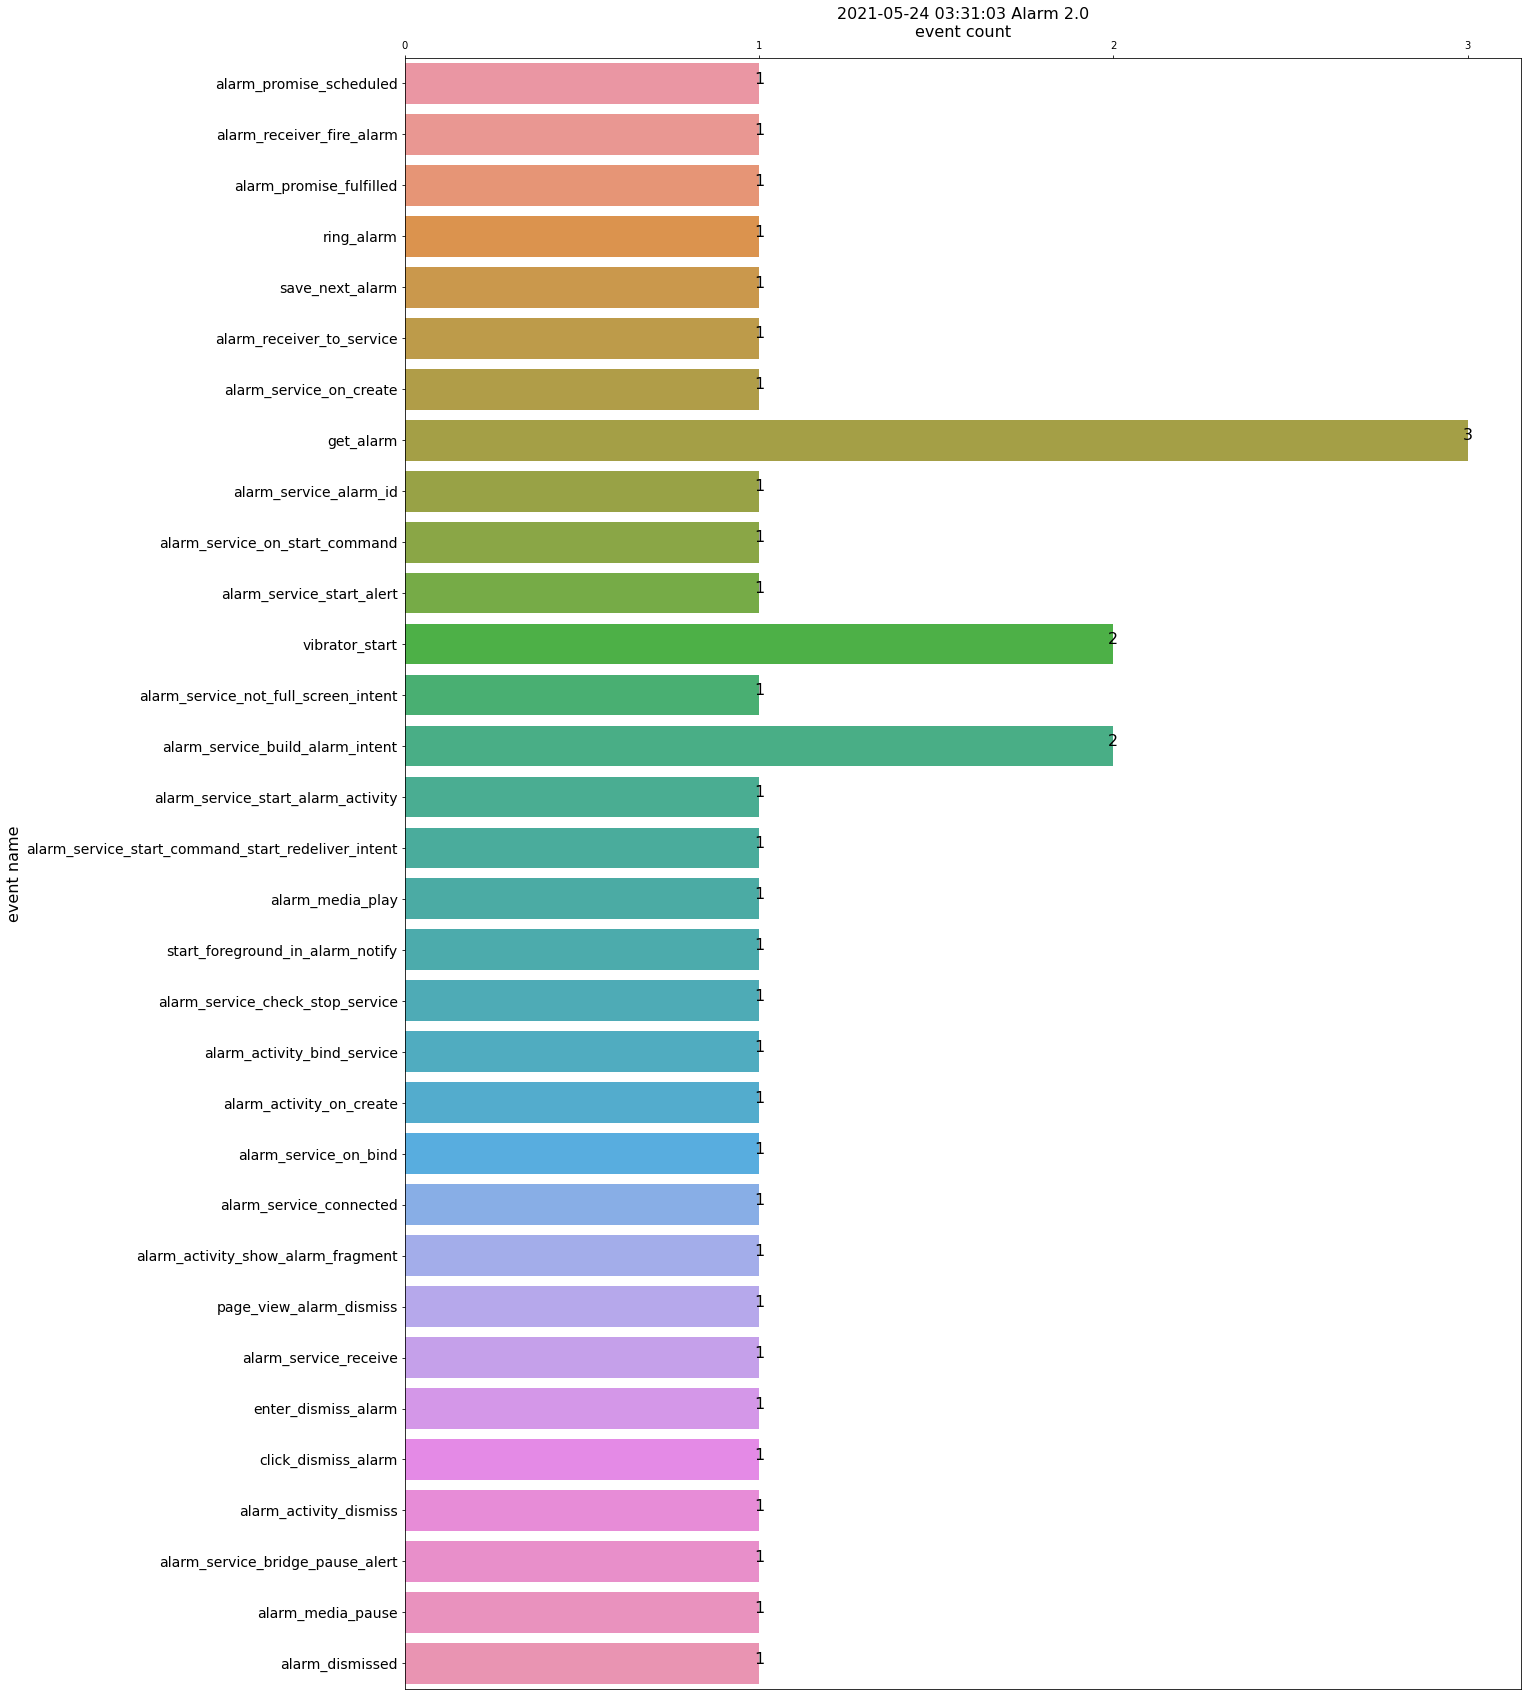

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 2406),
 ('alarm_promise_id', '60f0d8ed-62e5-4fa0-82db-9bb8c56fd7ea'),
 ('alarm_time', 1621933500000),
 ('alarm_time_formatted', '2021-05-25 04:05:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621933509516),
 ('fire_timestamp', 1622019900000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 4),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

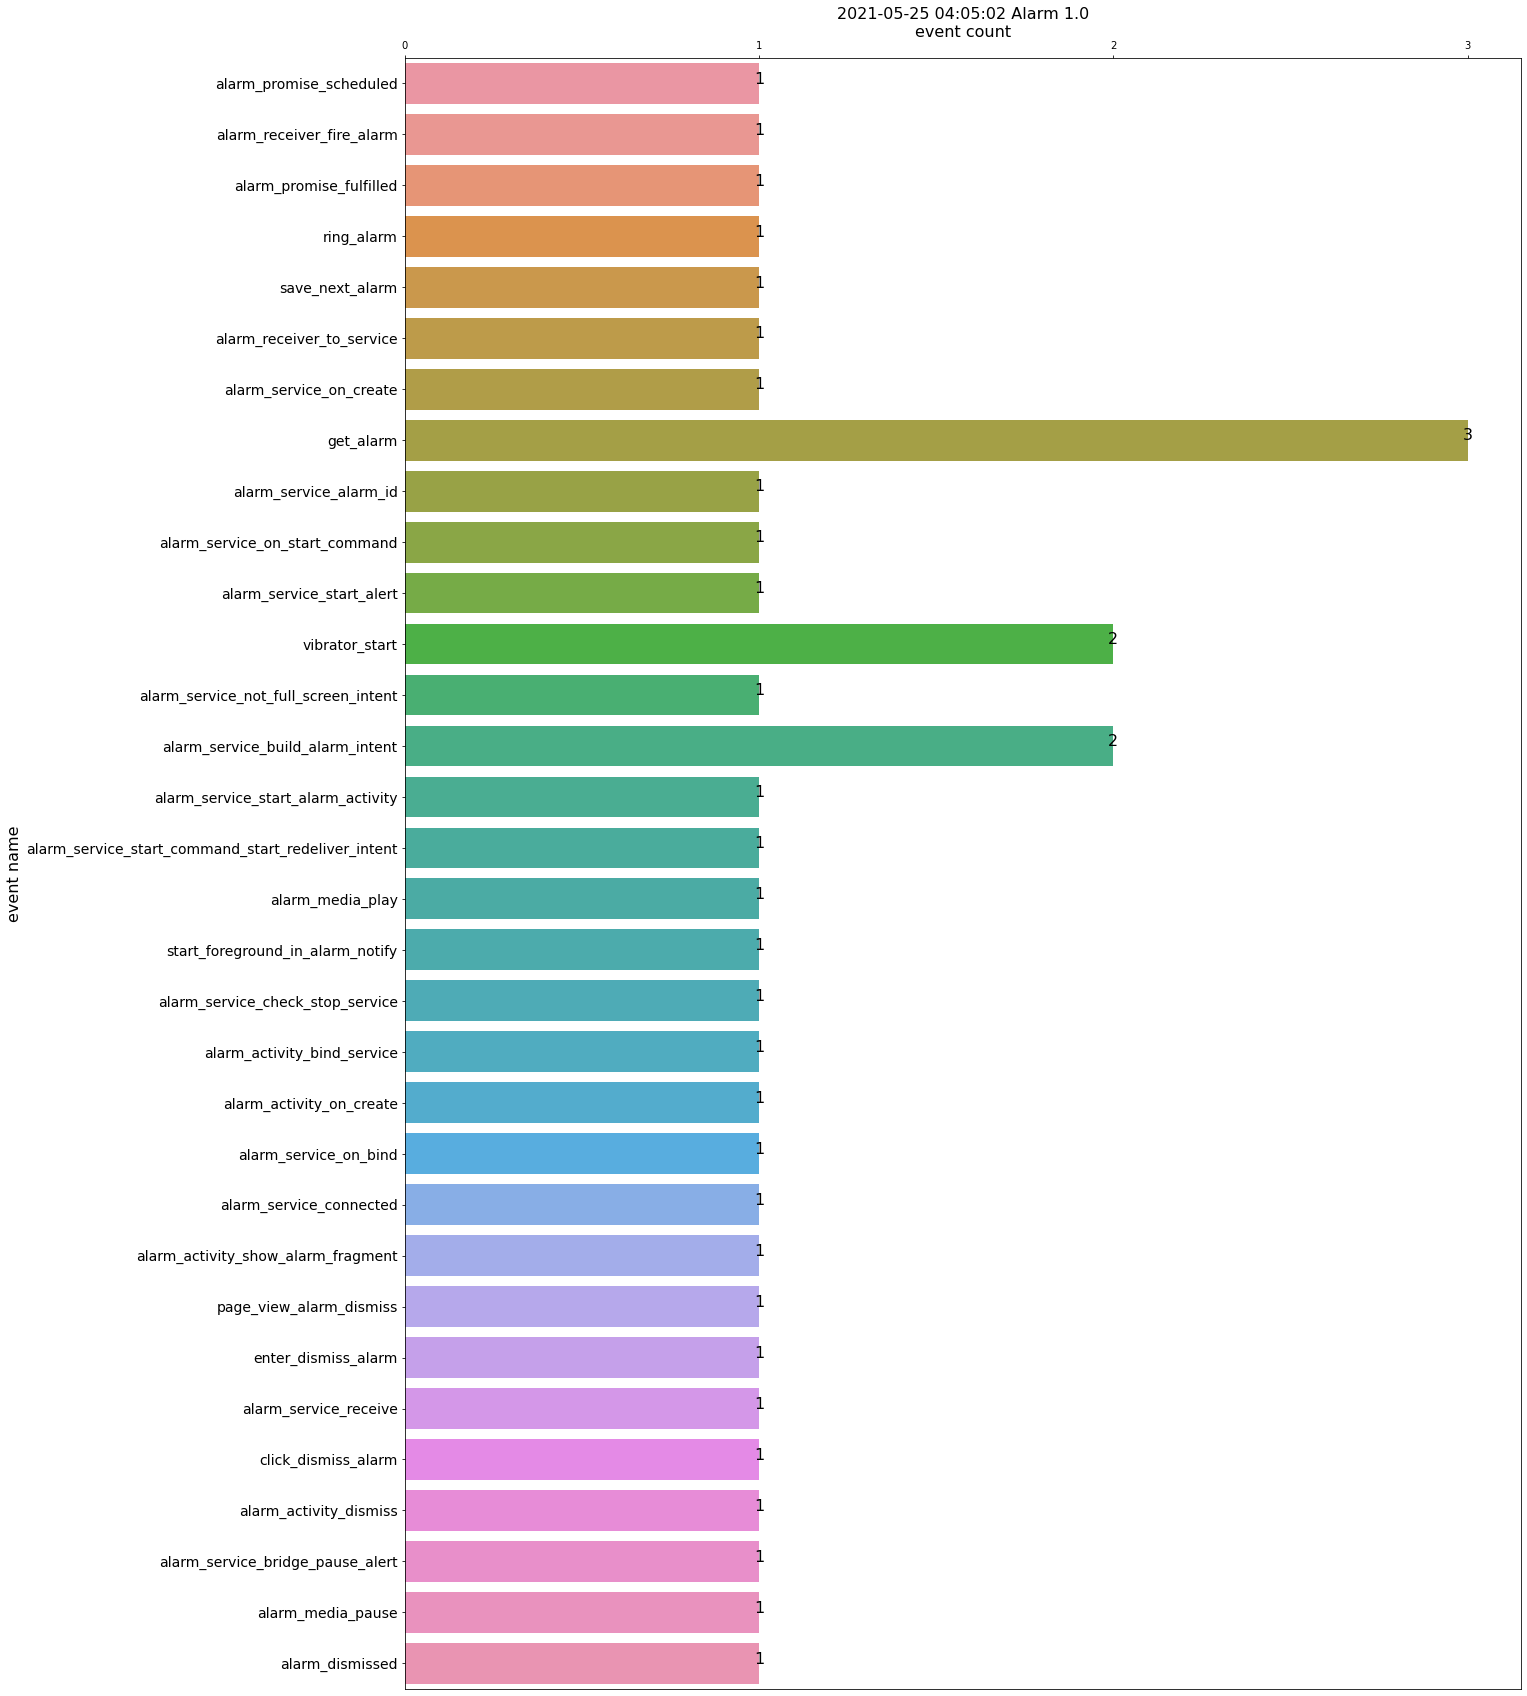

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 2392),
 ('alarm_promise_id', '7293bc9c-defa-47f7-a9cc-4a48f49c897b'),
 ('alarm_time', 1621935060000),
 ('alarm_time_formatted', '2021-05-25 04:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621935070359),
 ('fire_timestamp', 1622021460000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 4),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

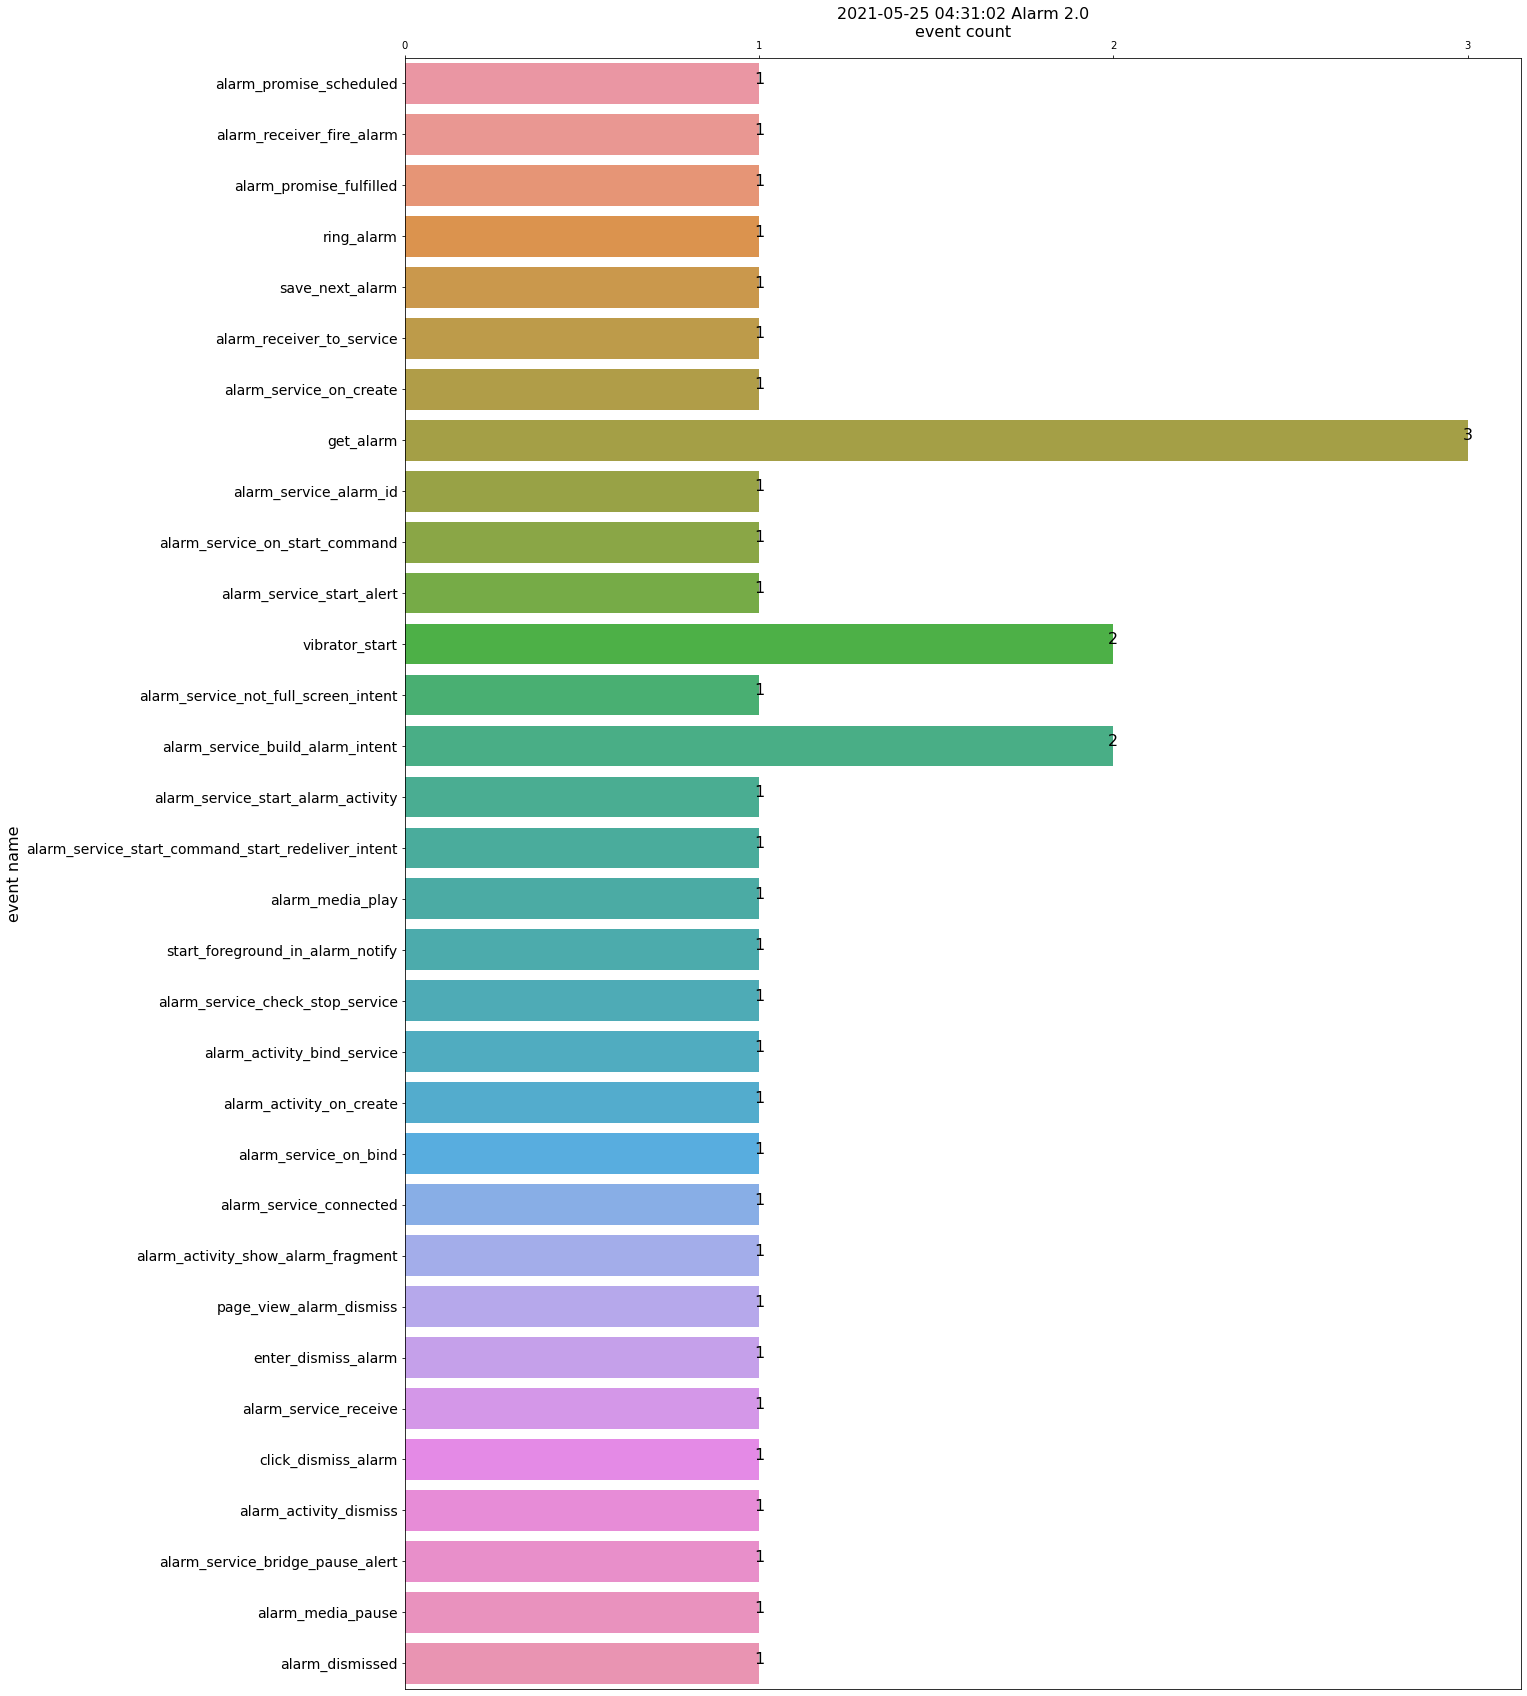

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_6'),
 ('alarm_offset_time', 2621),
 ('alarm_promise_id', 'c4875a5e-9ada-44d4-bb0e-00025c3f2dbc'),
 ('alarm_time', 1621989900000),
 ('alarm_time_formatted', '2021-05-25 19:45:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1621989927463),
 ('fire_timestamp', 1622594700000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 19),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fals

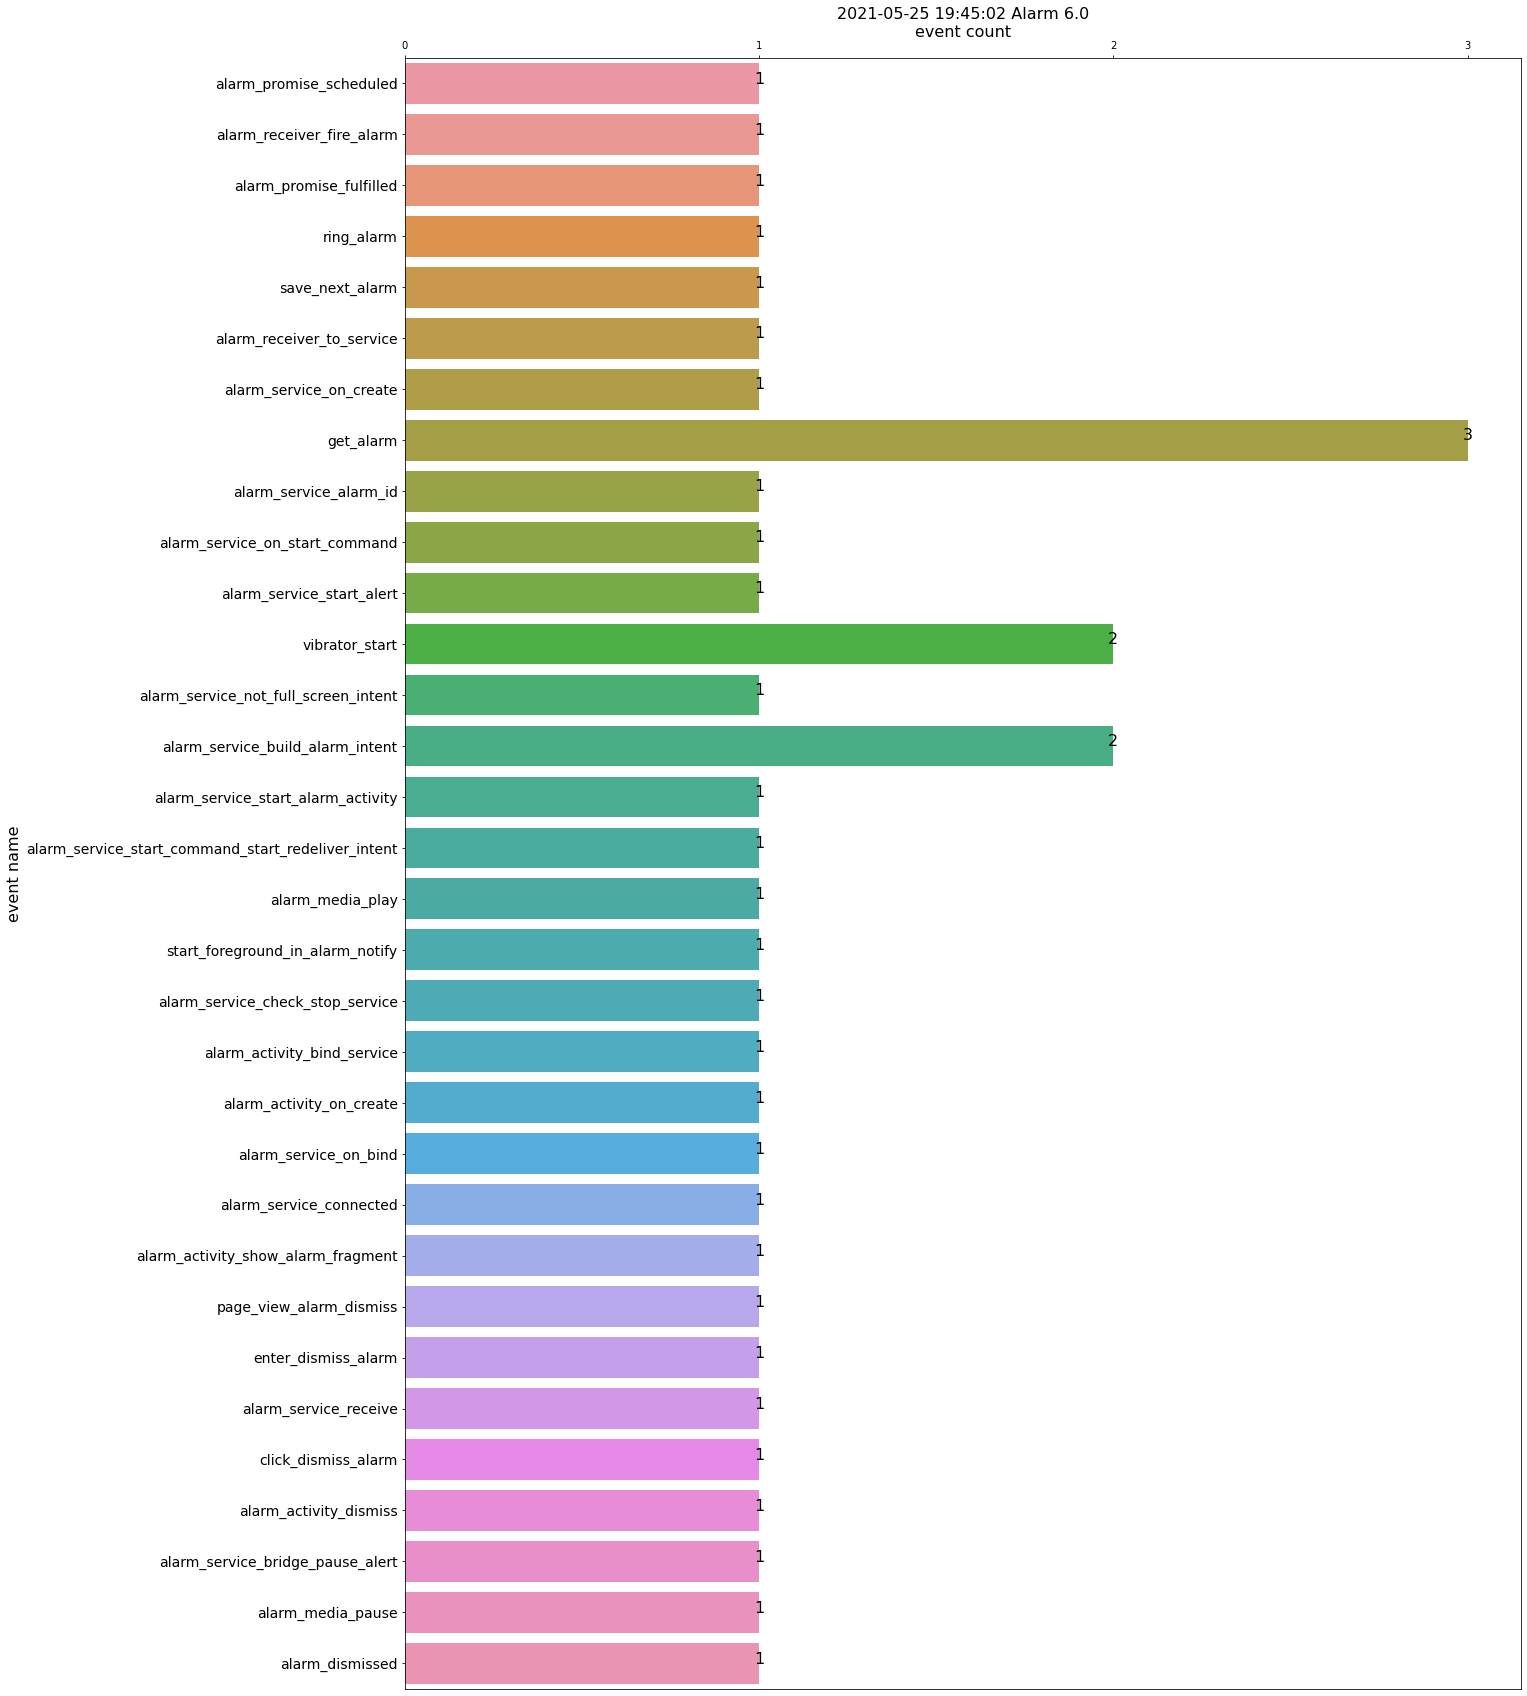

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 3915),
 ('alarm_promise_id', '0425e616-504a-48f2-b7aa-4820ec2fa28b'),
 ('alarm_time', 1622016060000),
 ('alarm_time_formatted', '2021-05-26 03:01:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622016076506),
 ('fire_timestamp', 1622102460000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

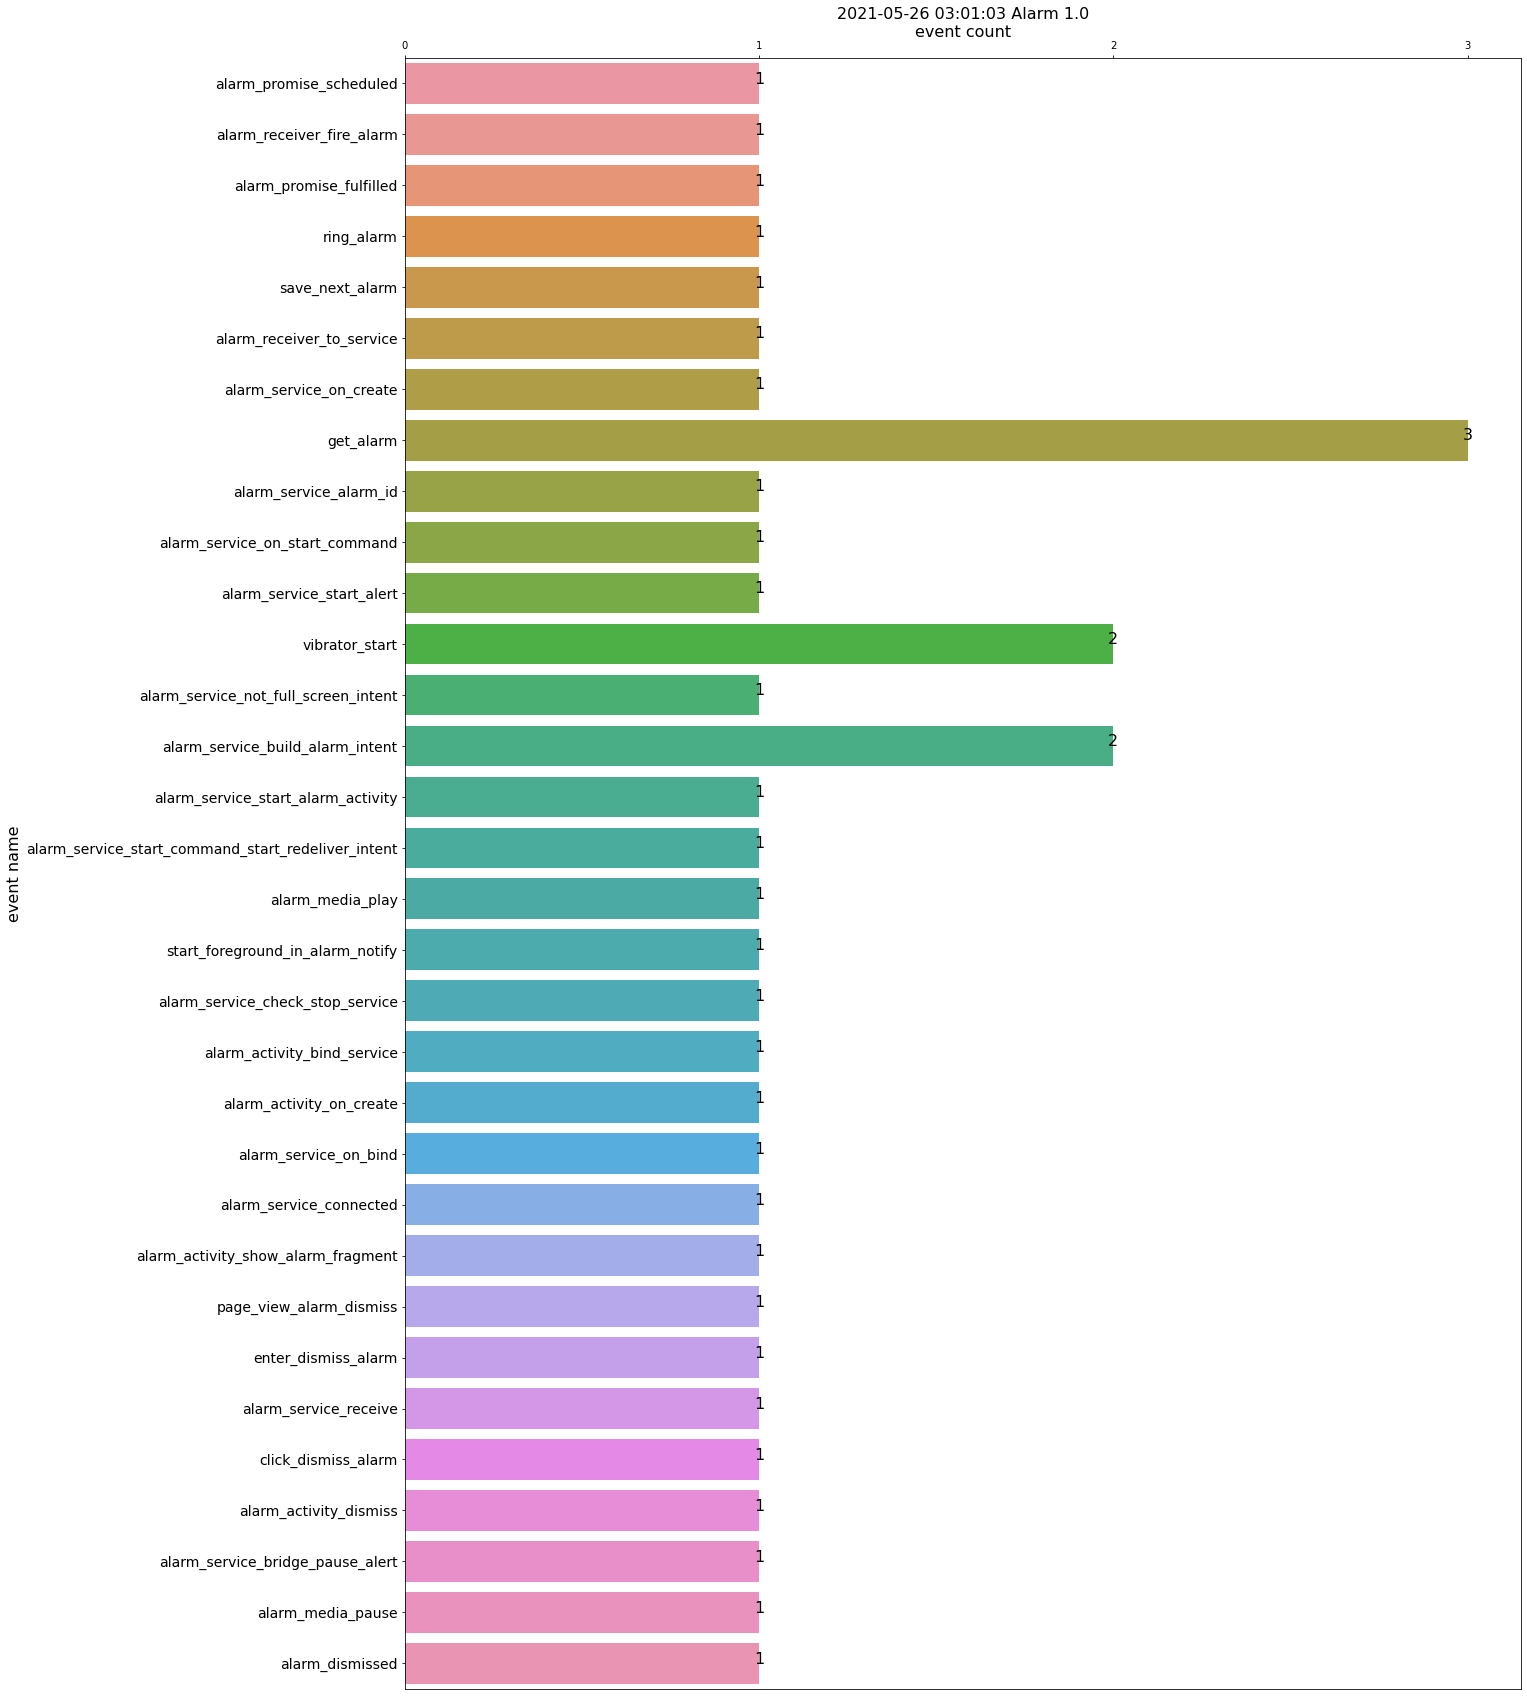

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 2440),
 ('alarm_promise_id', 'a0a3a230-3a26-417d-ae66-1e9ecc603278'),
 ('alarm_time', 1622017860000),
 ('alarm_time_formatted', '2021-05-26 03:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622017869192),
 ('fire_timestamp', 1622104260000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('i

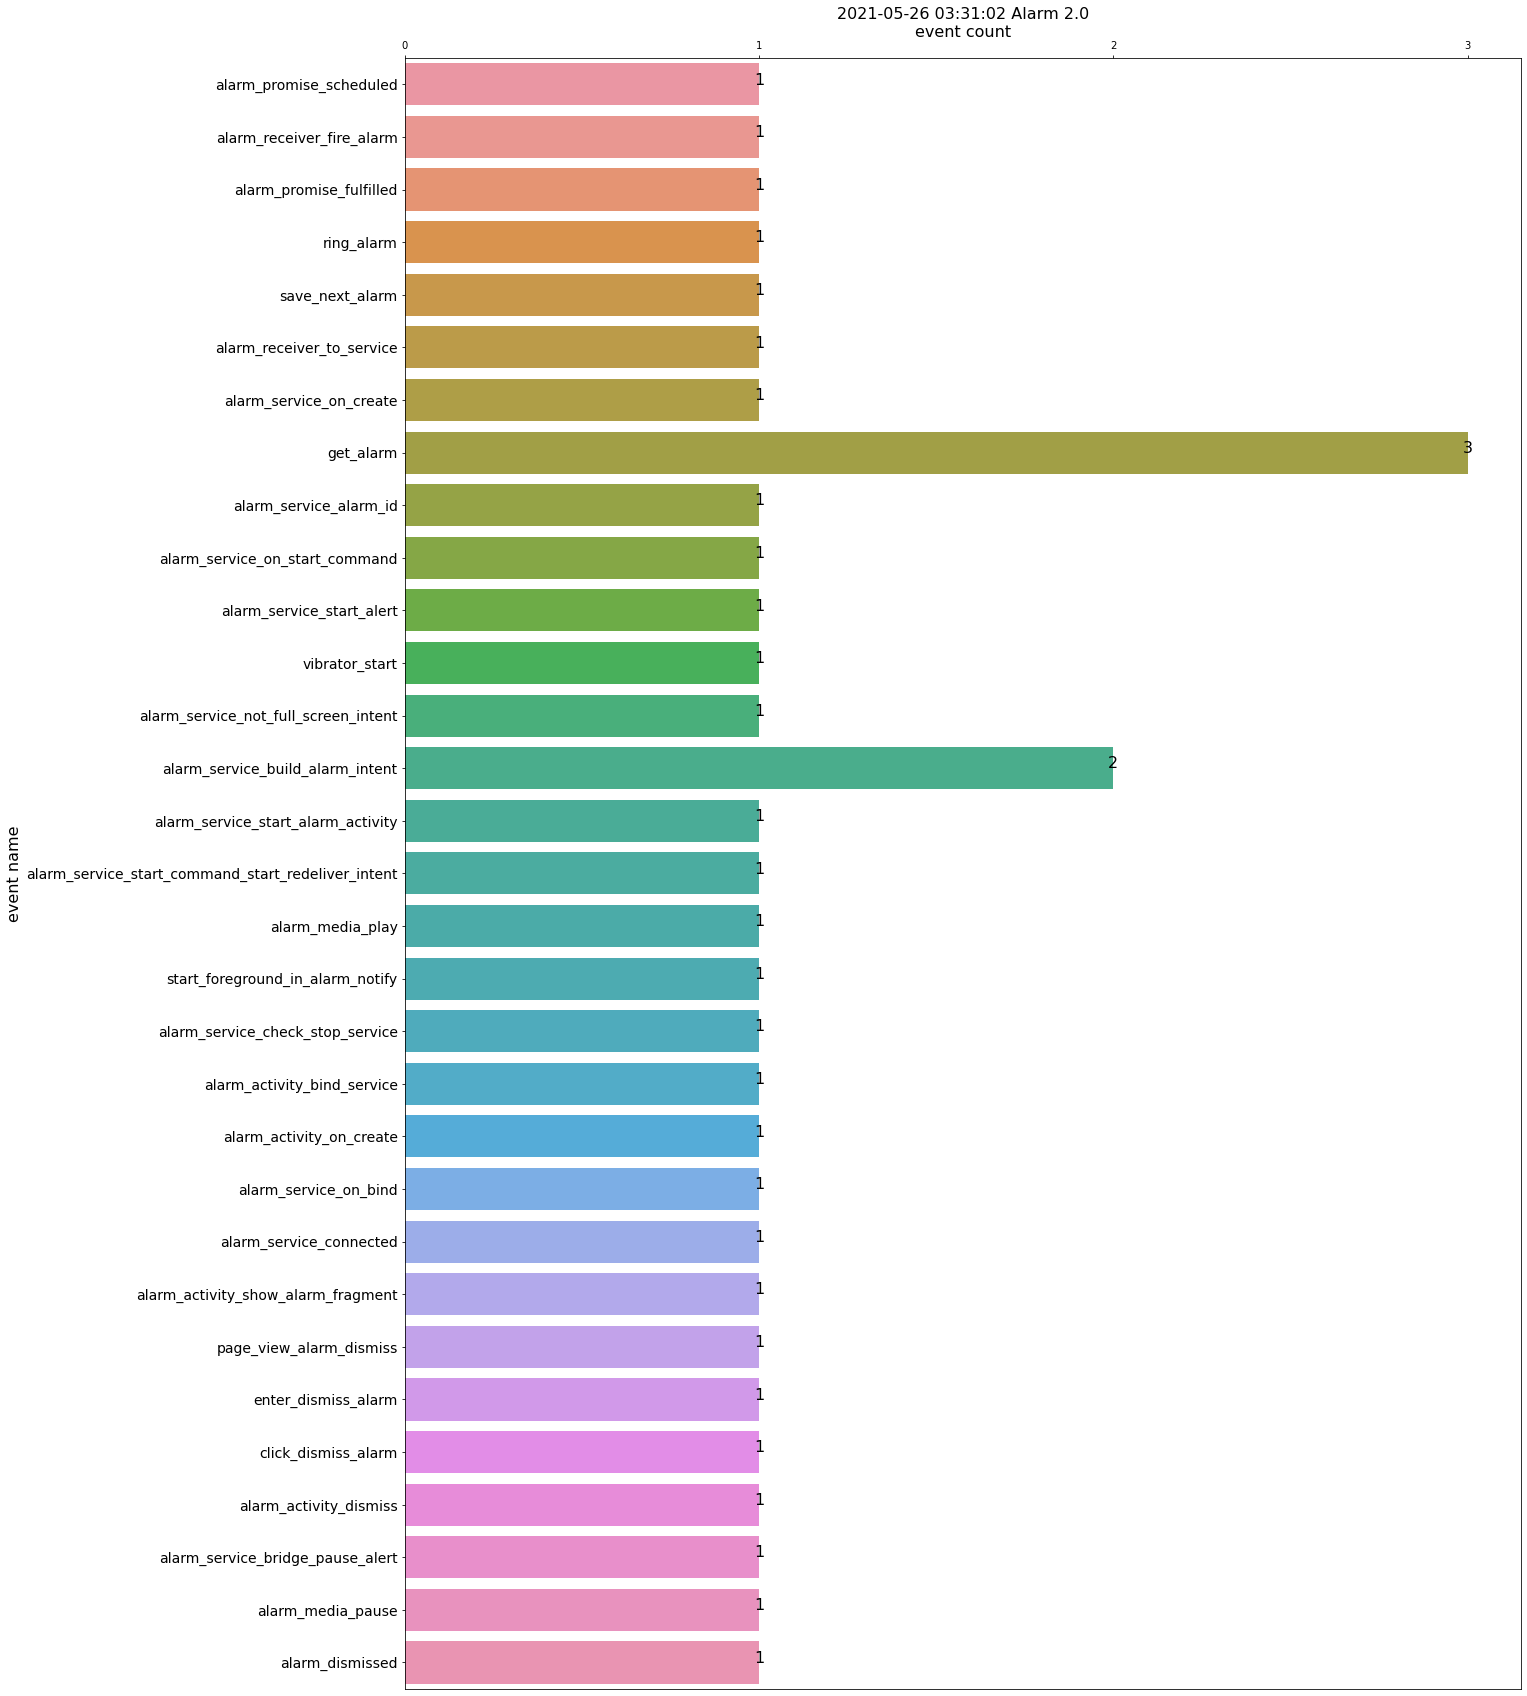

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_11'),
 ('alarm_offset_time', 2581),
 ('alarm_promise_id', '30db411a-11a2-444f-99a1-b7a707c8c6b1'),
 ('alarm_time', 1622032740000),
 ('alarm_time_formatted', '2021-05-26 07:39:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 77),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622032759109),
 ('fire_timestamp', 1622119140000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 7),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', True),
 ('is_random', Fals

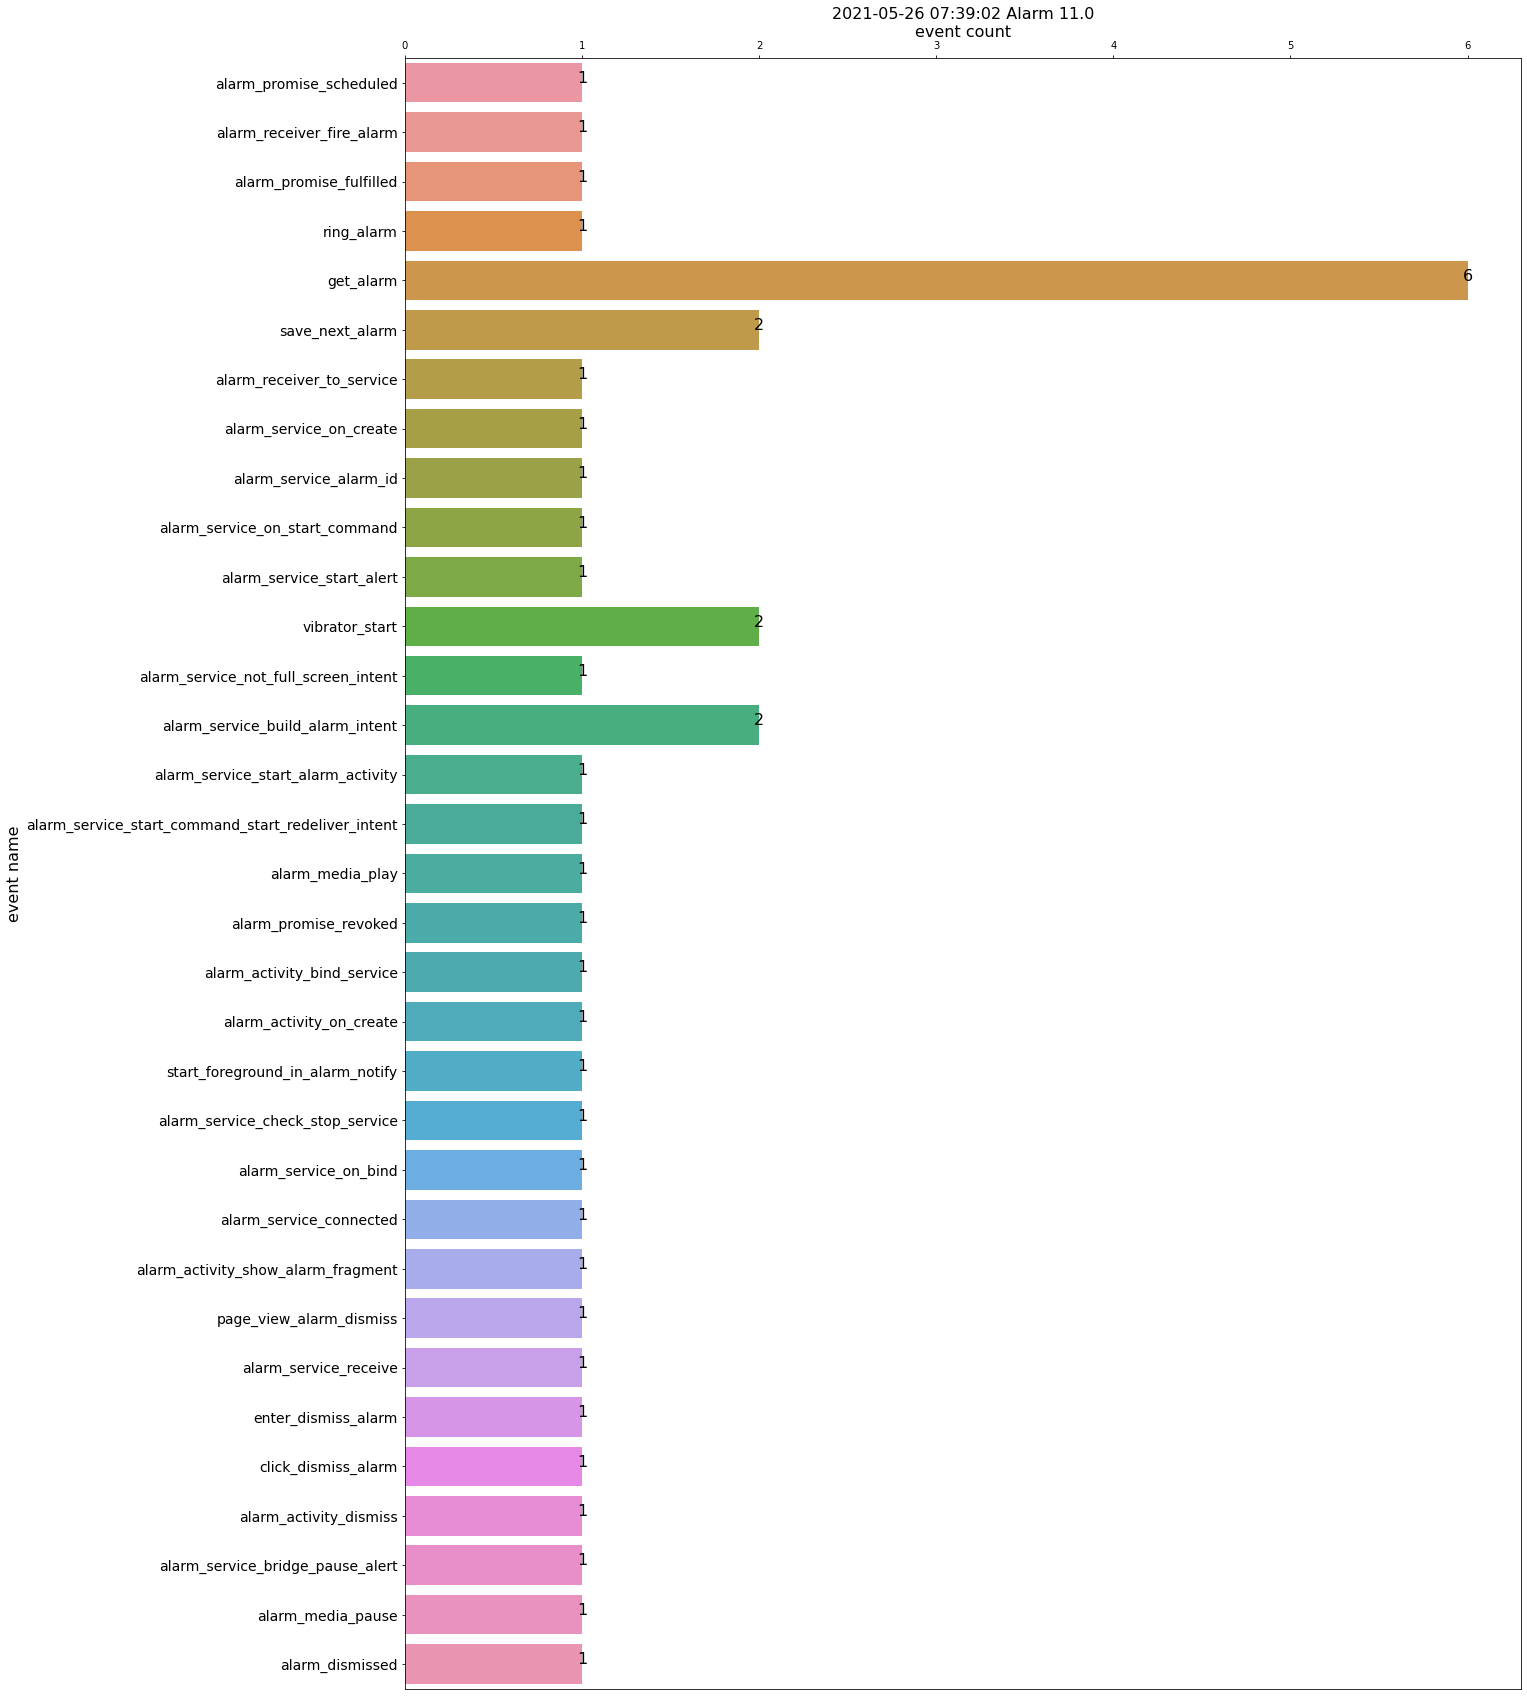

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 2838),
 ('alarm_promise_id', '70885bf7-54a6-4866-af0a-b1058d839a38'),
 ('alarm_time', 1622104260000),
 ('alarm_time_formatted', '2021-05-27 03:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622104279469),
 ('fire_timestamp', 1622190660000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

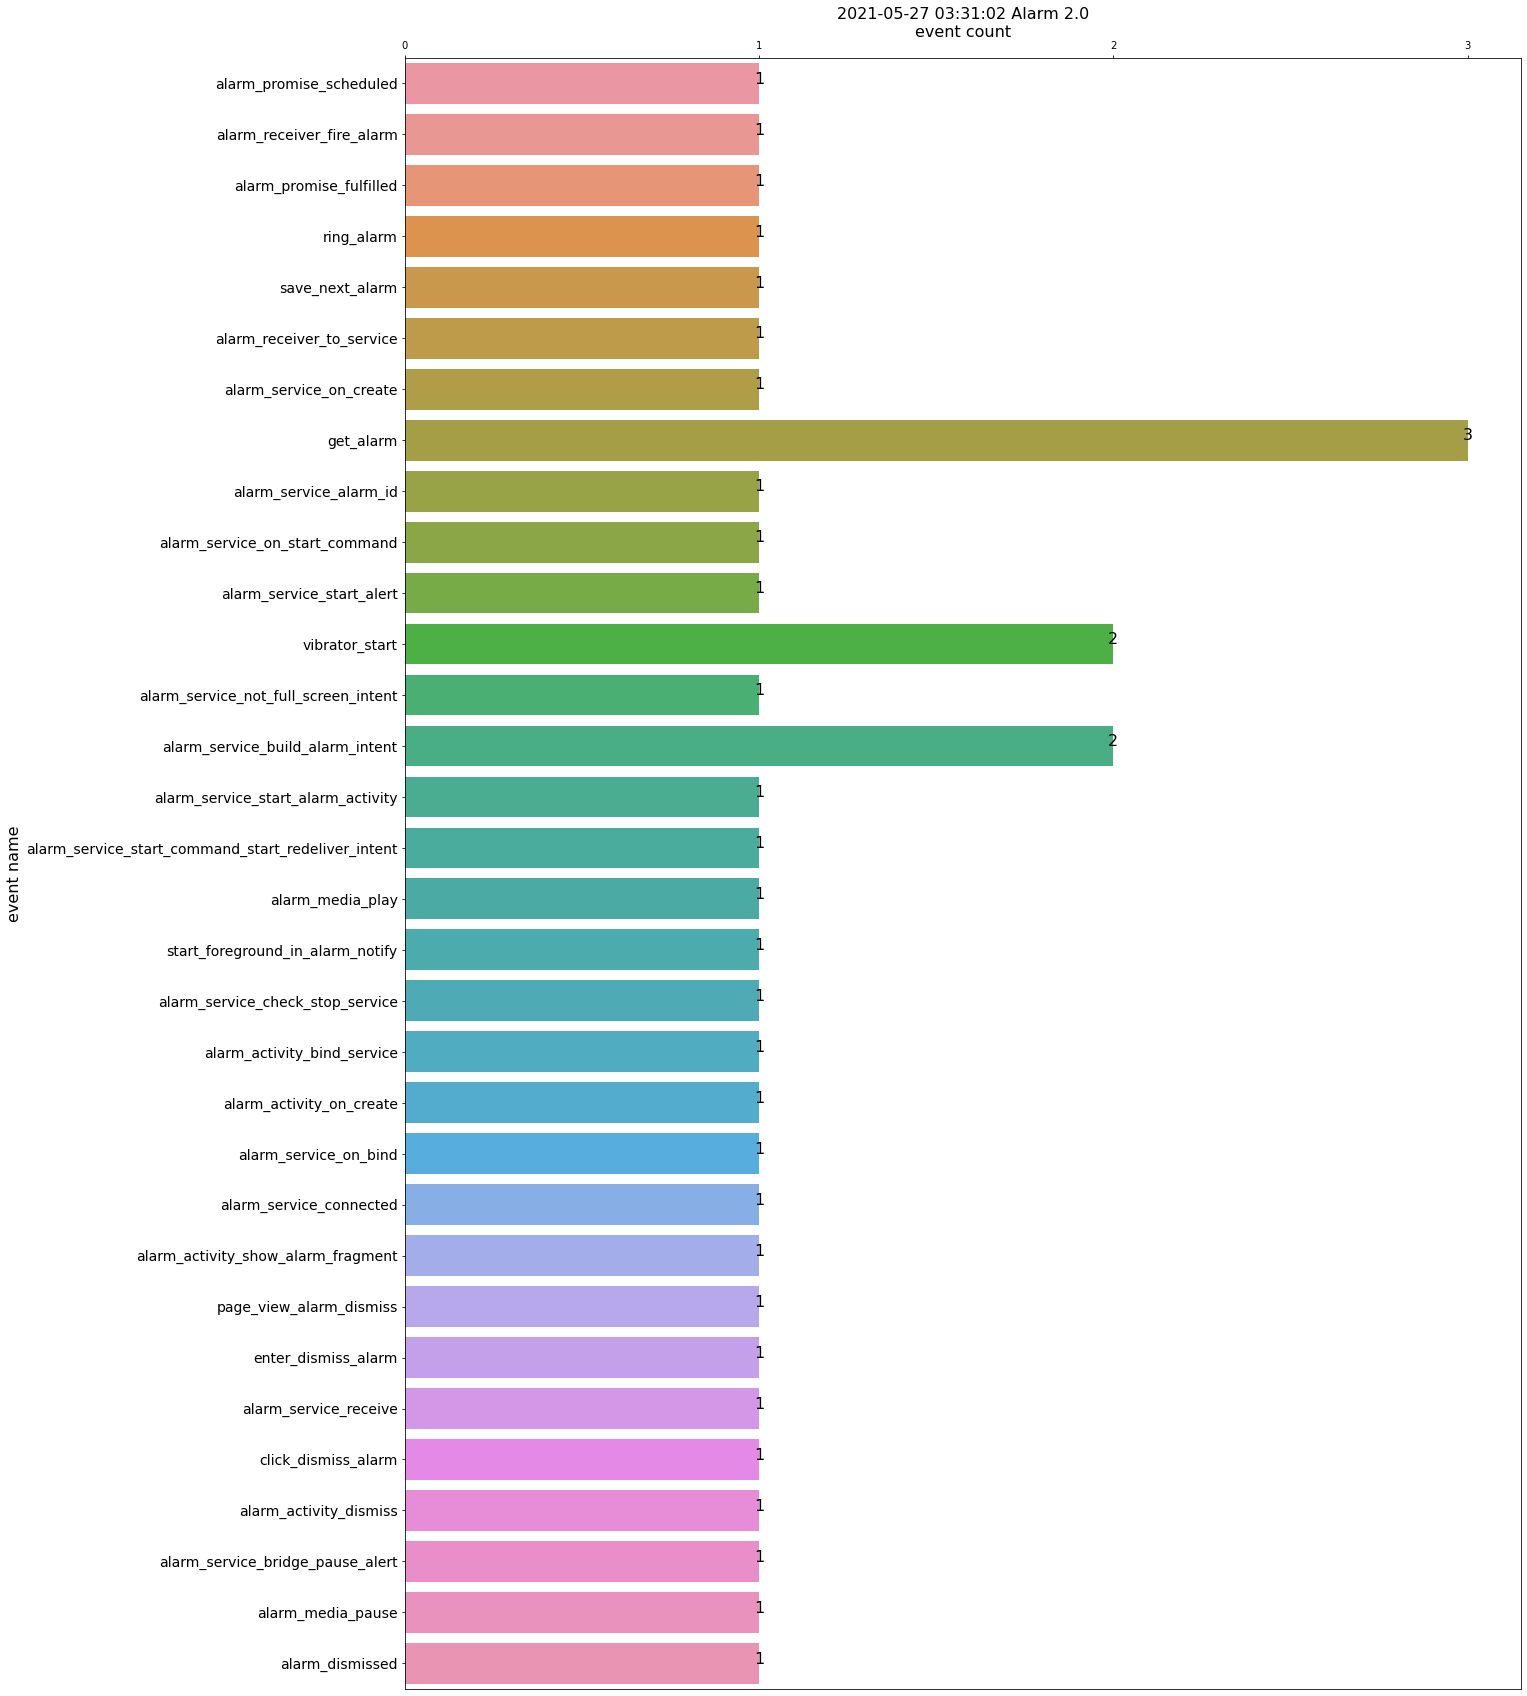

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 2832),
 ('alarm_promise_id', '8fab70d4-0d61-4e46-b3cf-5af7fbc2ce4d'),
 ('alarm_time', 1622116500000),
 ('alarm_time_formatted', '2021-05-27 06:55:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622116509407),
 ('fire_timestamp', 1622202900000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 6),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

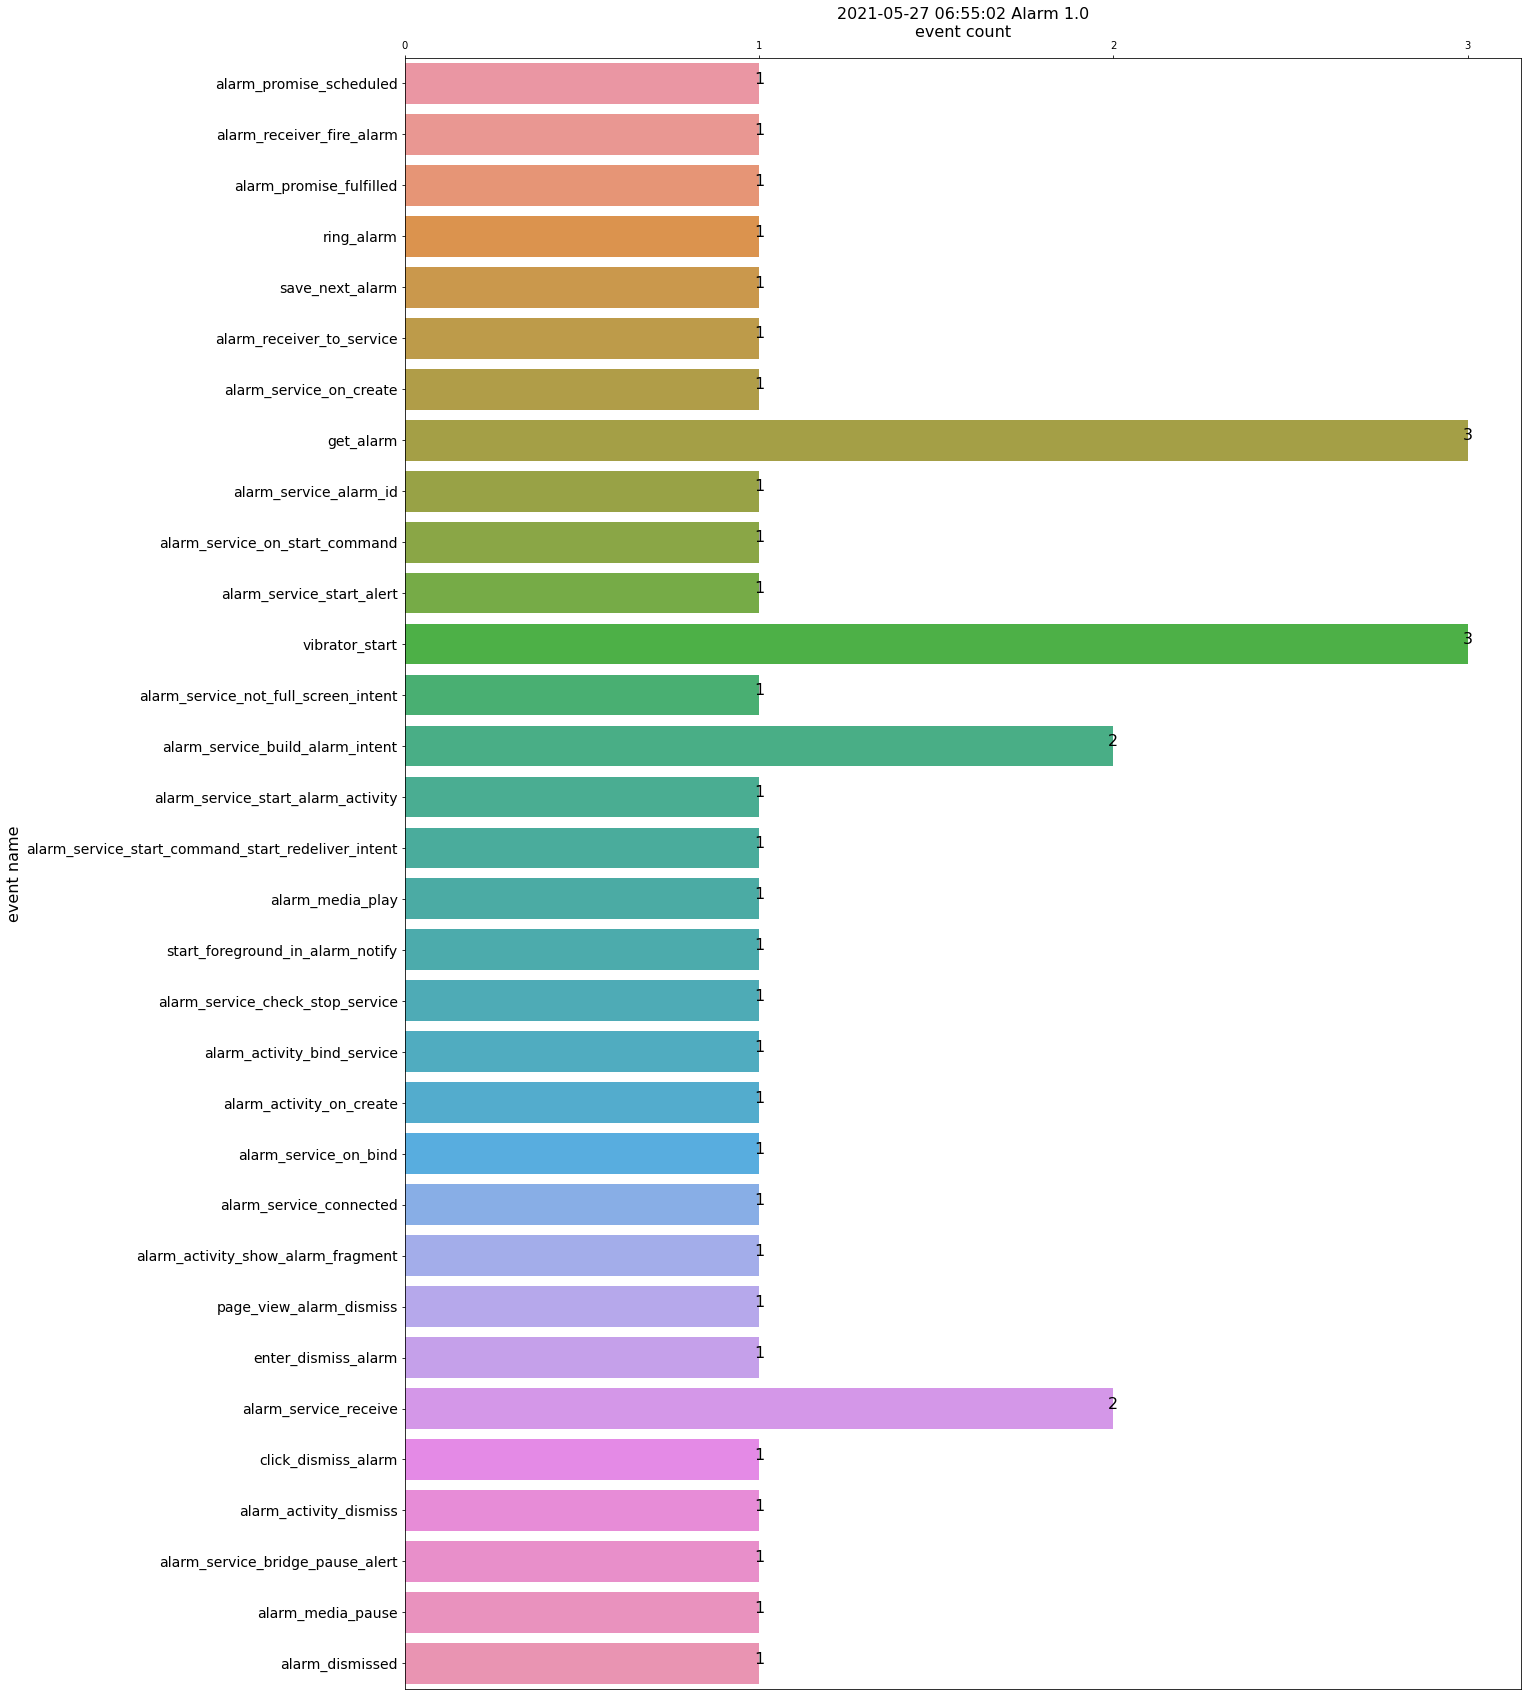

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 3149),
 ('alarm_promise_id', '9b44c470-97da-4f58-bc66-eac87a1dda99'),
 ('alarm_time', 1622190660000),
 ('alarm_time_formatted', '2021-05-28 03:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622190672422),
 ('fire_timestamp', 1622449860000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

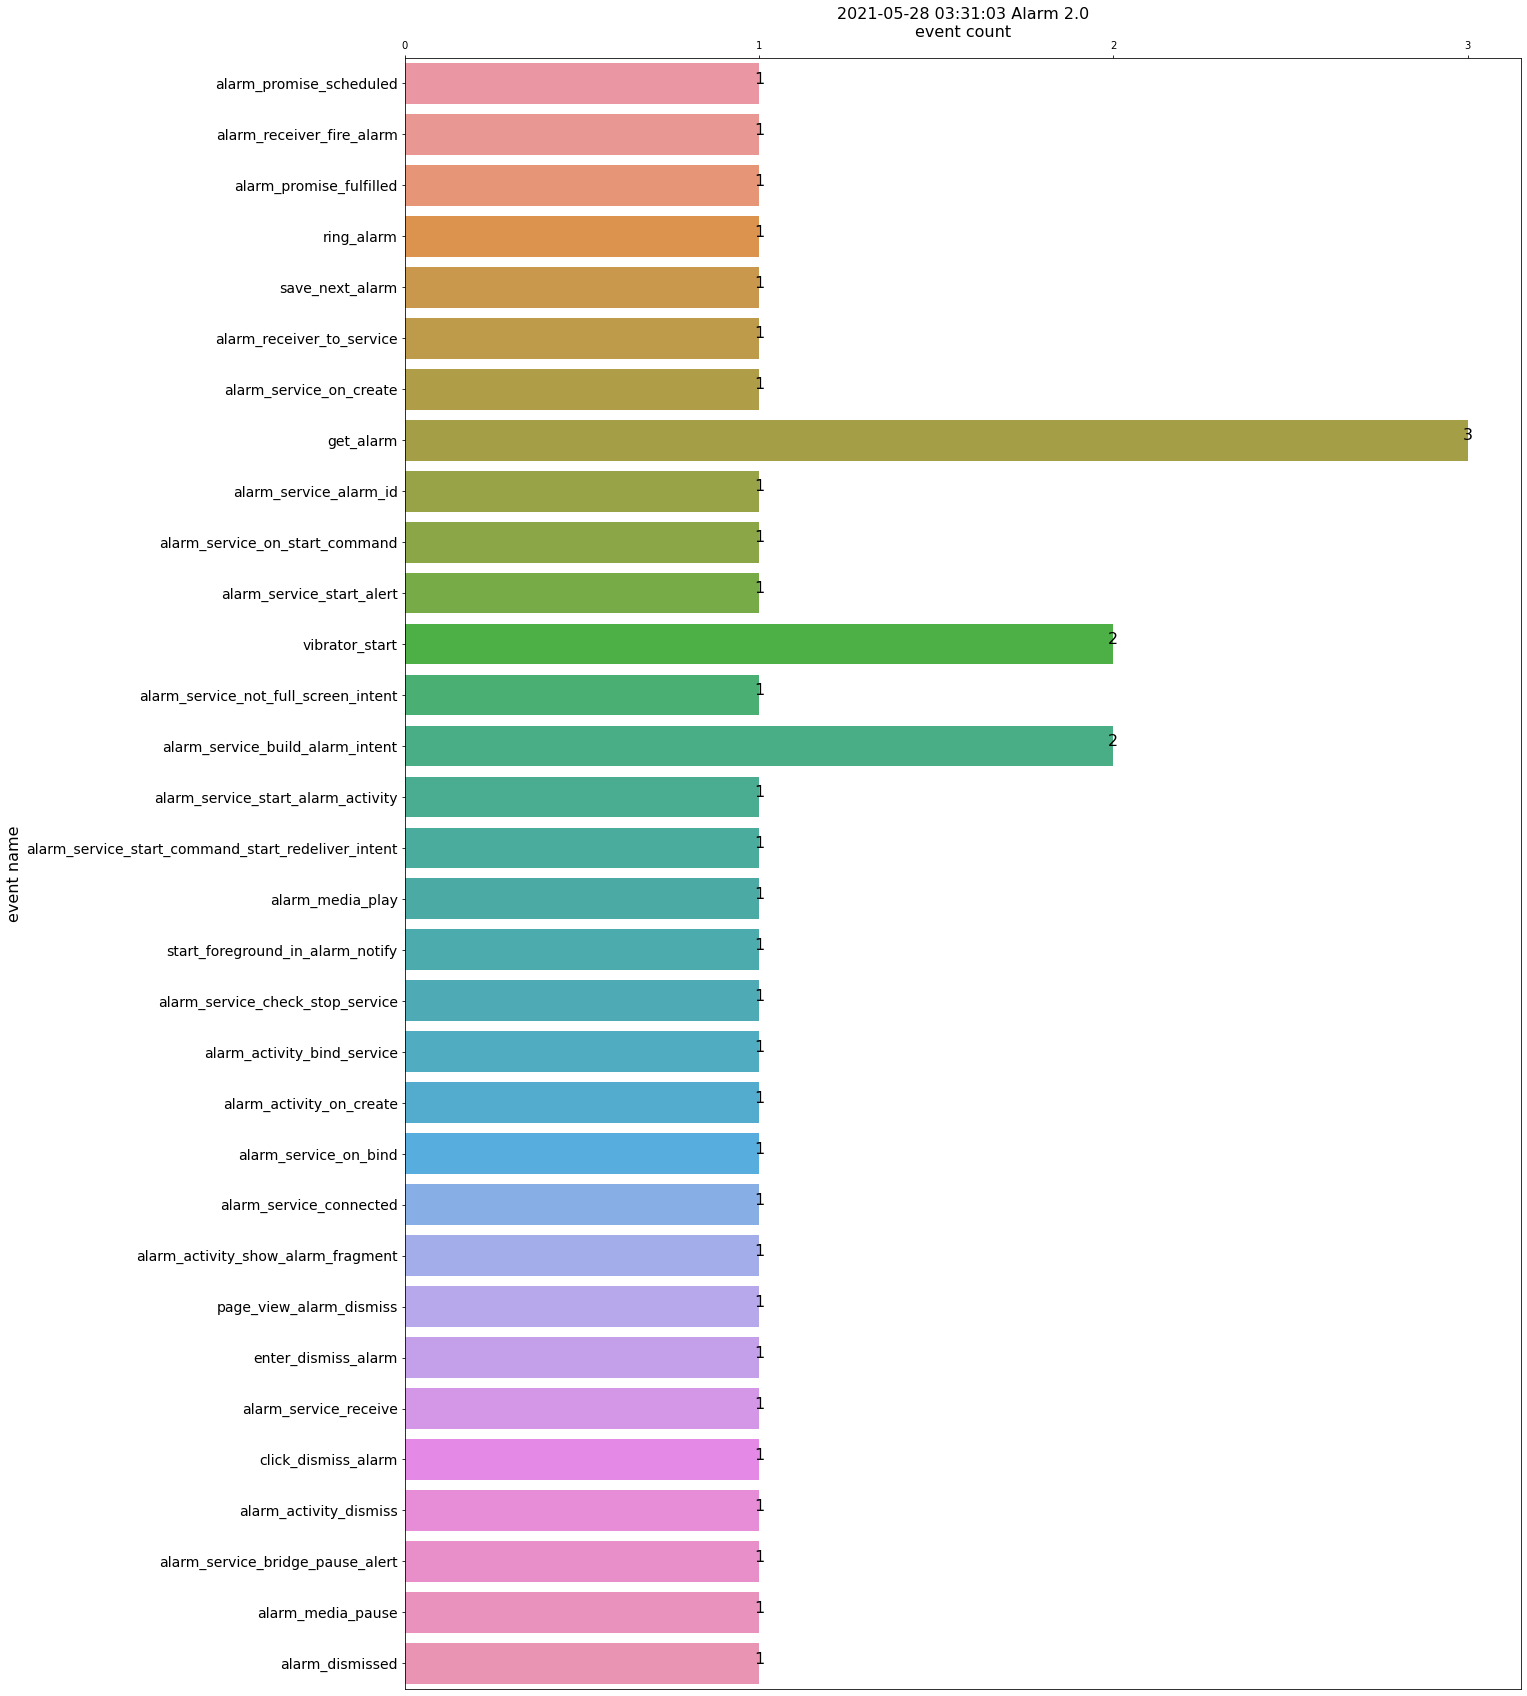

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 3348),
 ('alarm_promise_id', '5989d7c0-3c60-4dc1-9f79-477444f54215'),
 ('alarm_time', 1622202900000),
 ('alarm_time_formatted', '2021-05-28 06:55:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622202917164),
 ('fire_timestamp', 1622462100000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 6),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

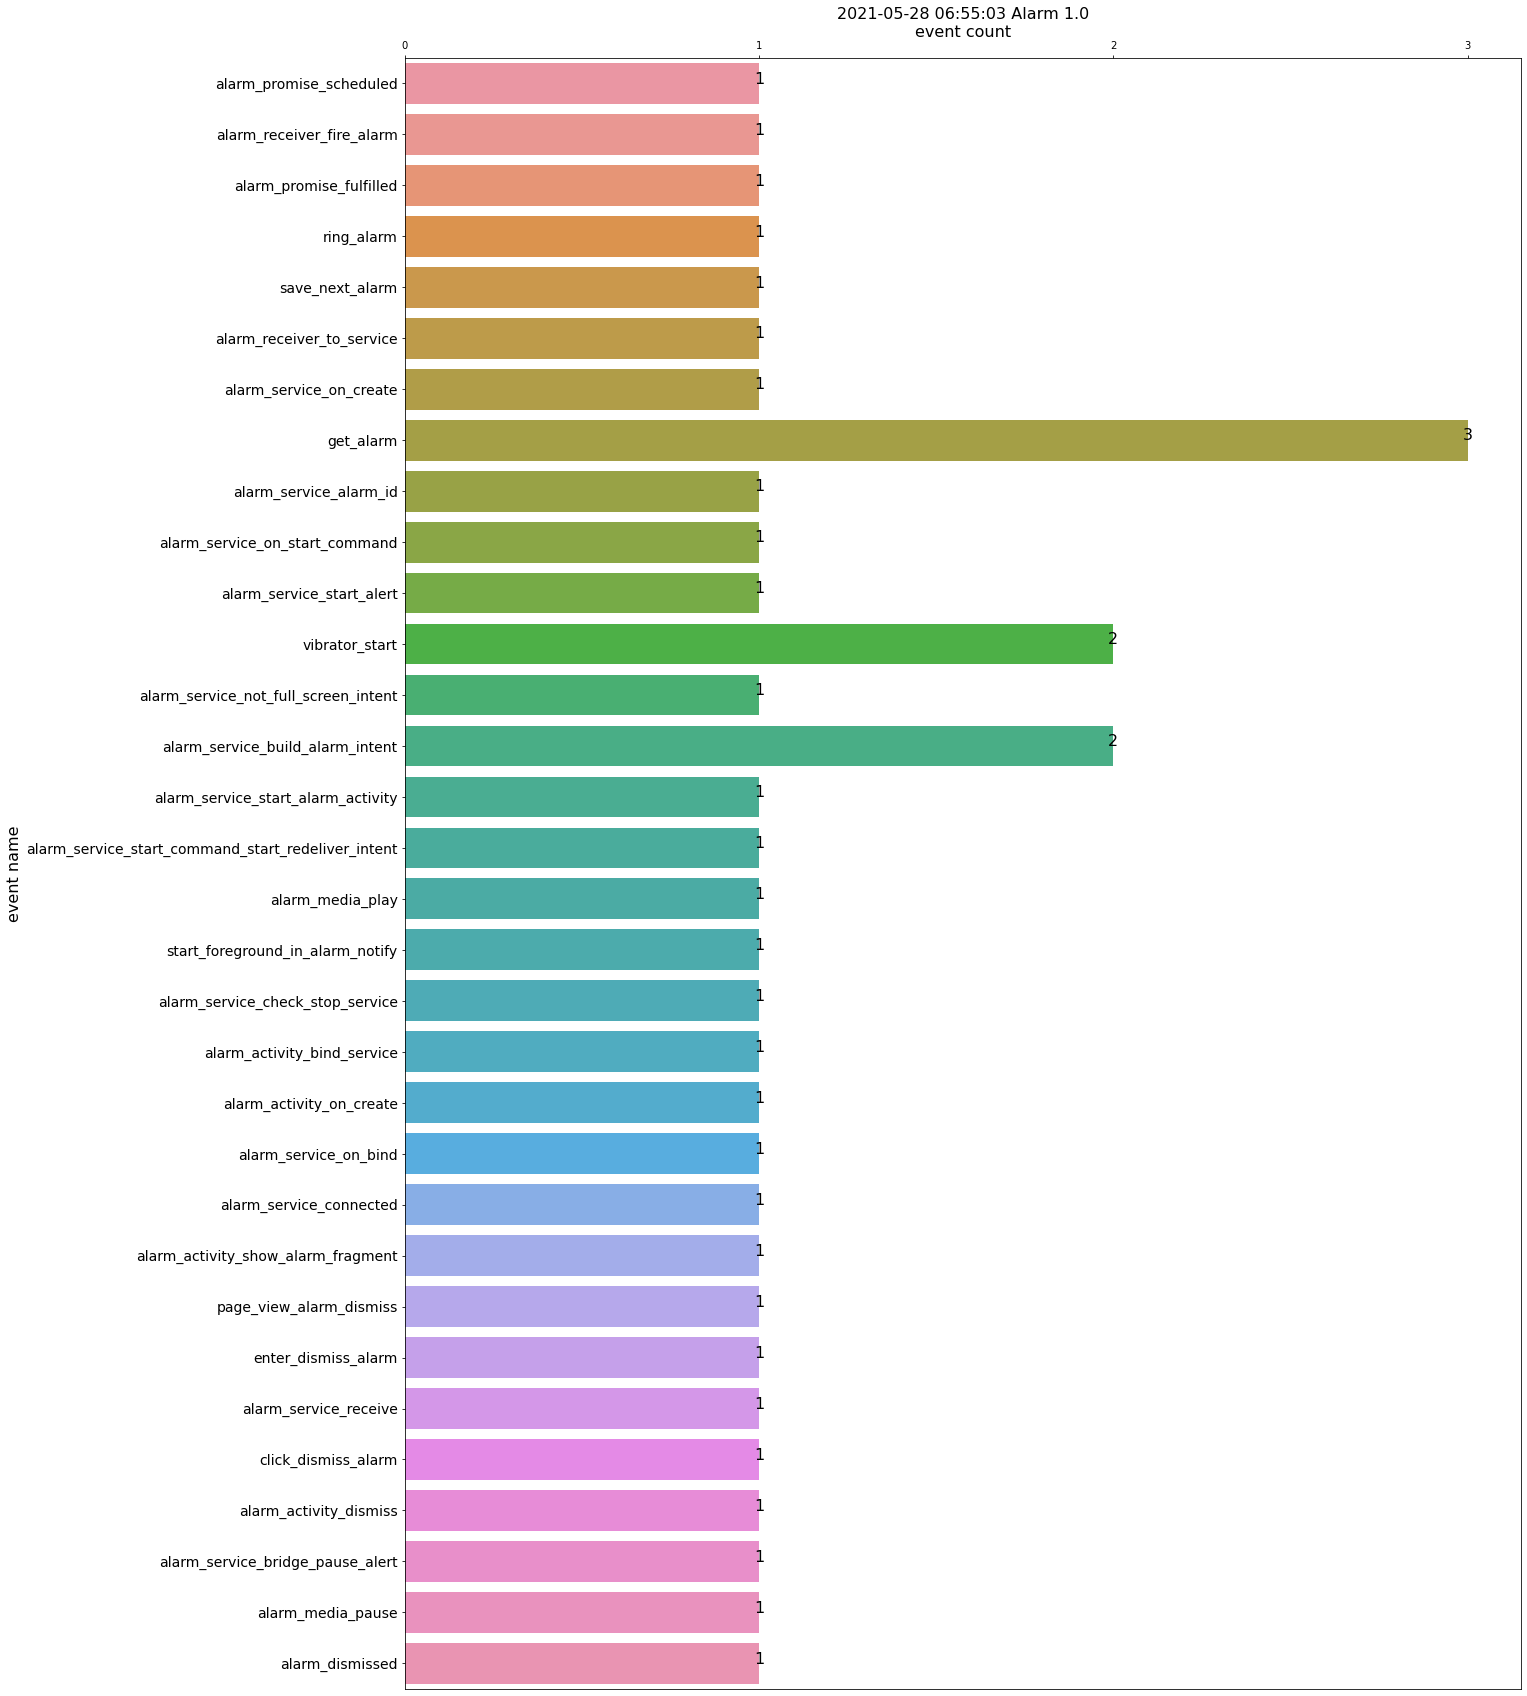

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_7'),
 ('alarm_offset_time', 2932),
 ('alarm_promise_id', '83d6b519-e07e-49f2-9ef4-fd6d4f28821e'),
 ('alarm_time', 1622245260000),
 ('alarm_time_formatted', '2021-05-28 18:41:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622245268079),
 ('fire_timestamp', 1622850060000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 18),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('

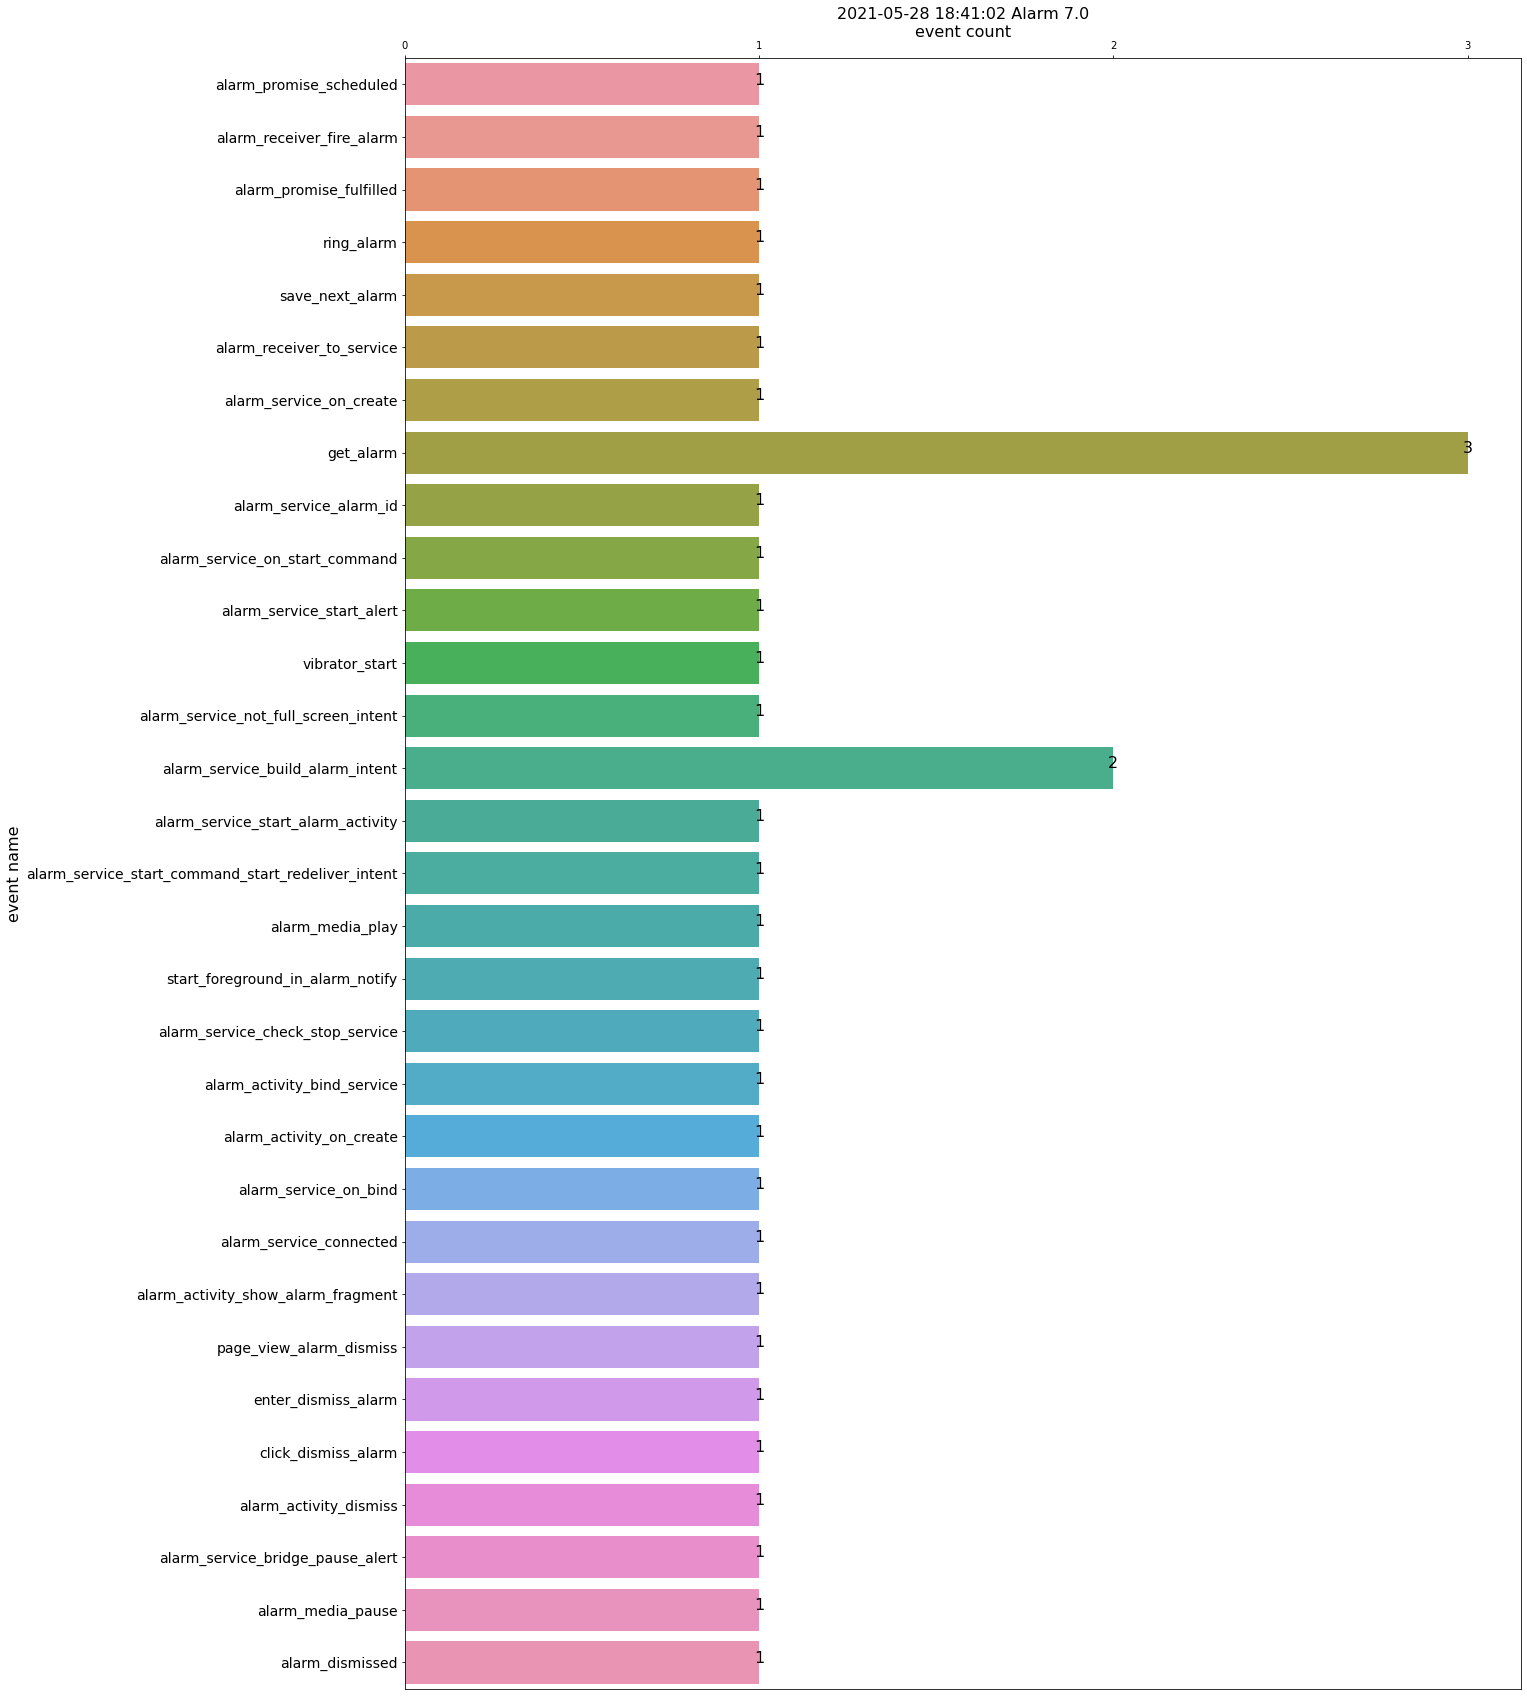

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_8'),
 ('alarm_offset_time', 2514),
 ('alarm_promise_id', '7624189c-168b-435a-b642-4885ca771e51'),
 ('alarm_time', 1622278860000),
 ('alarm_time_formatted', '2021-05-29 04:01:00'),
 ('alarm_volume', 10),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622278873246),
 ('fire_timestamp', 1622883660000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 4),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

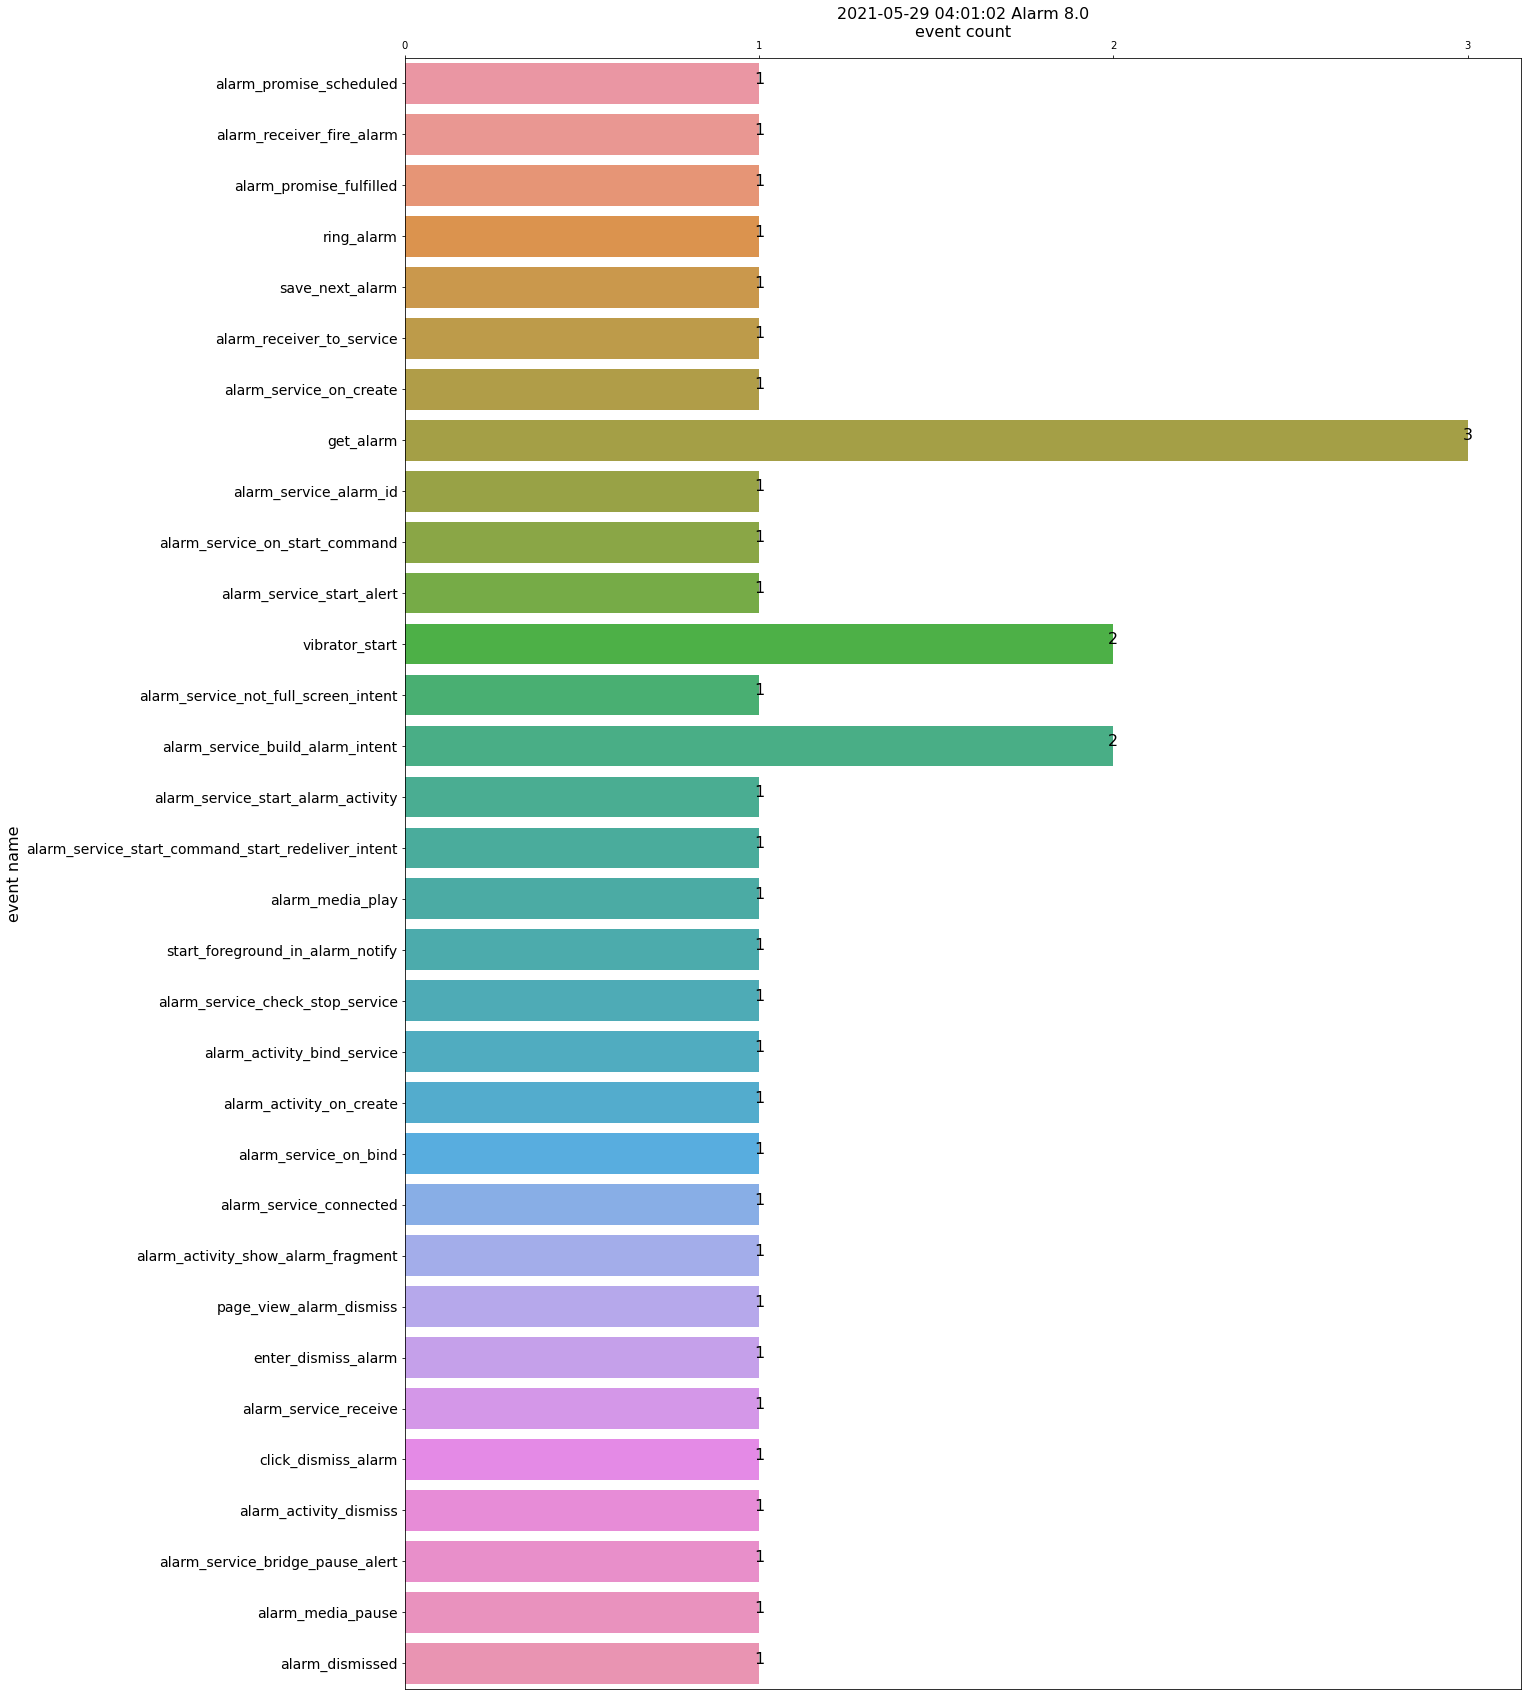

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_9'),
 ('alarm_offset_time', 1966),
 ('alarm_promise_id', '6328382c-038b-4416-a08b-c3f31fd9af06'),
 ('alarm_time', 1622280660000),
 ('alarm_time_formatted', '2021-05-29 04:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622280666397),
 ('fire_timestamp', 1622885460000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 4),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

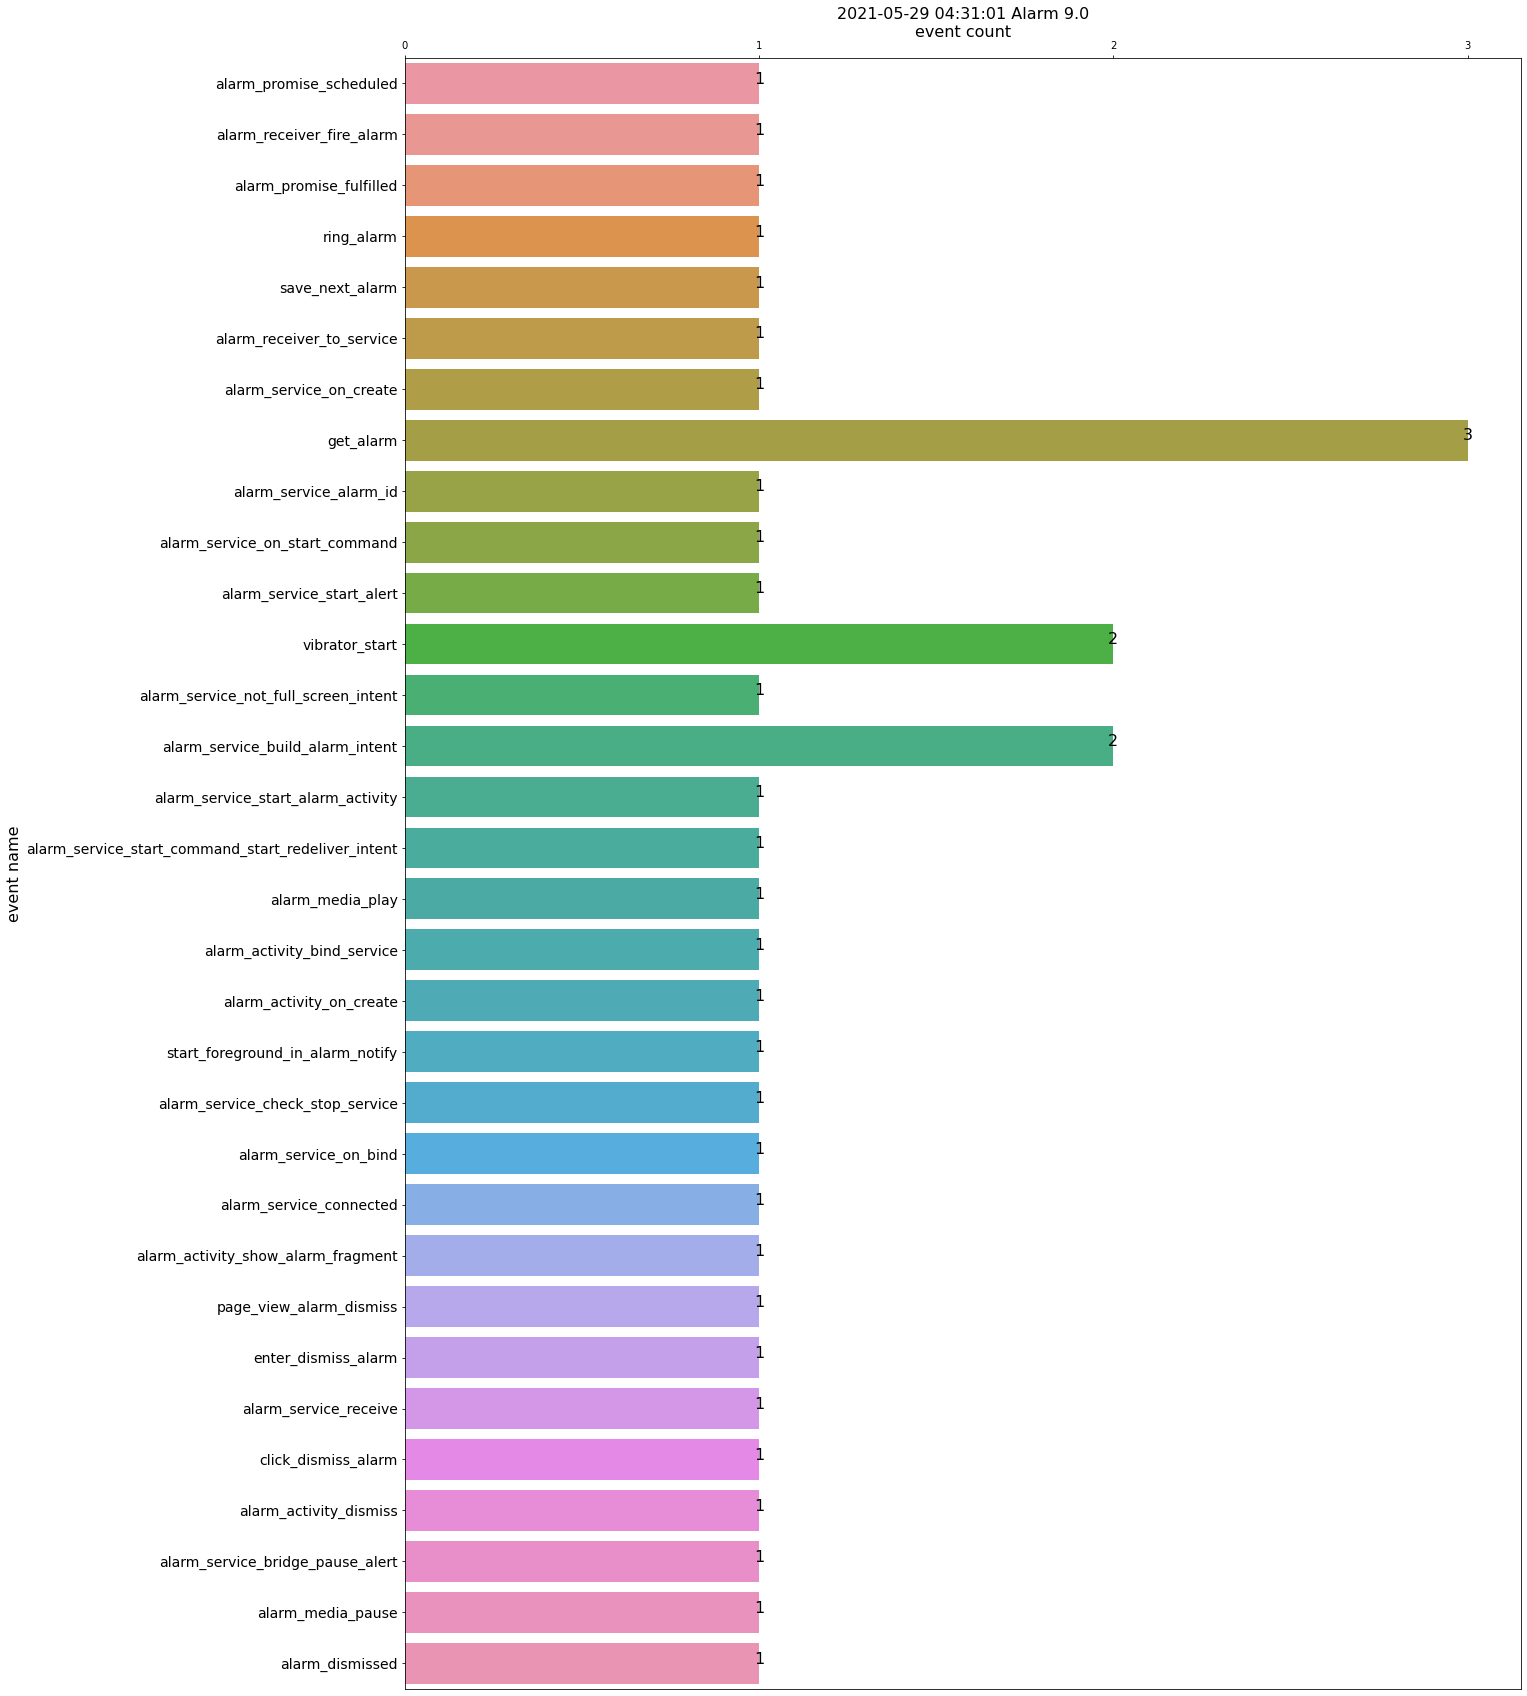

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_3'),
 ('alarm_offset_time', 2843),
 ('alarm_promise_id', '811894c0-aaae-472b-9c59-2e9e51b91e3f'),
 ('alarm_time', 1622383260000),
 ('alarm_time_formatted', '2021-05-30 09:01:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622383268292),
 ('fire_timestamp', 1622988060000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 9),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

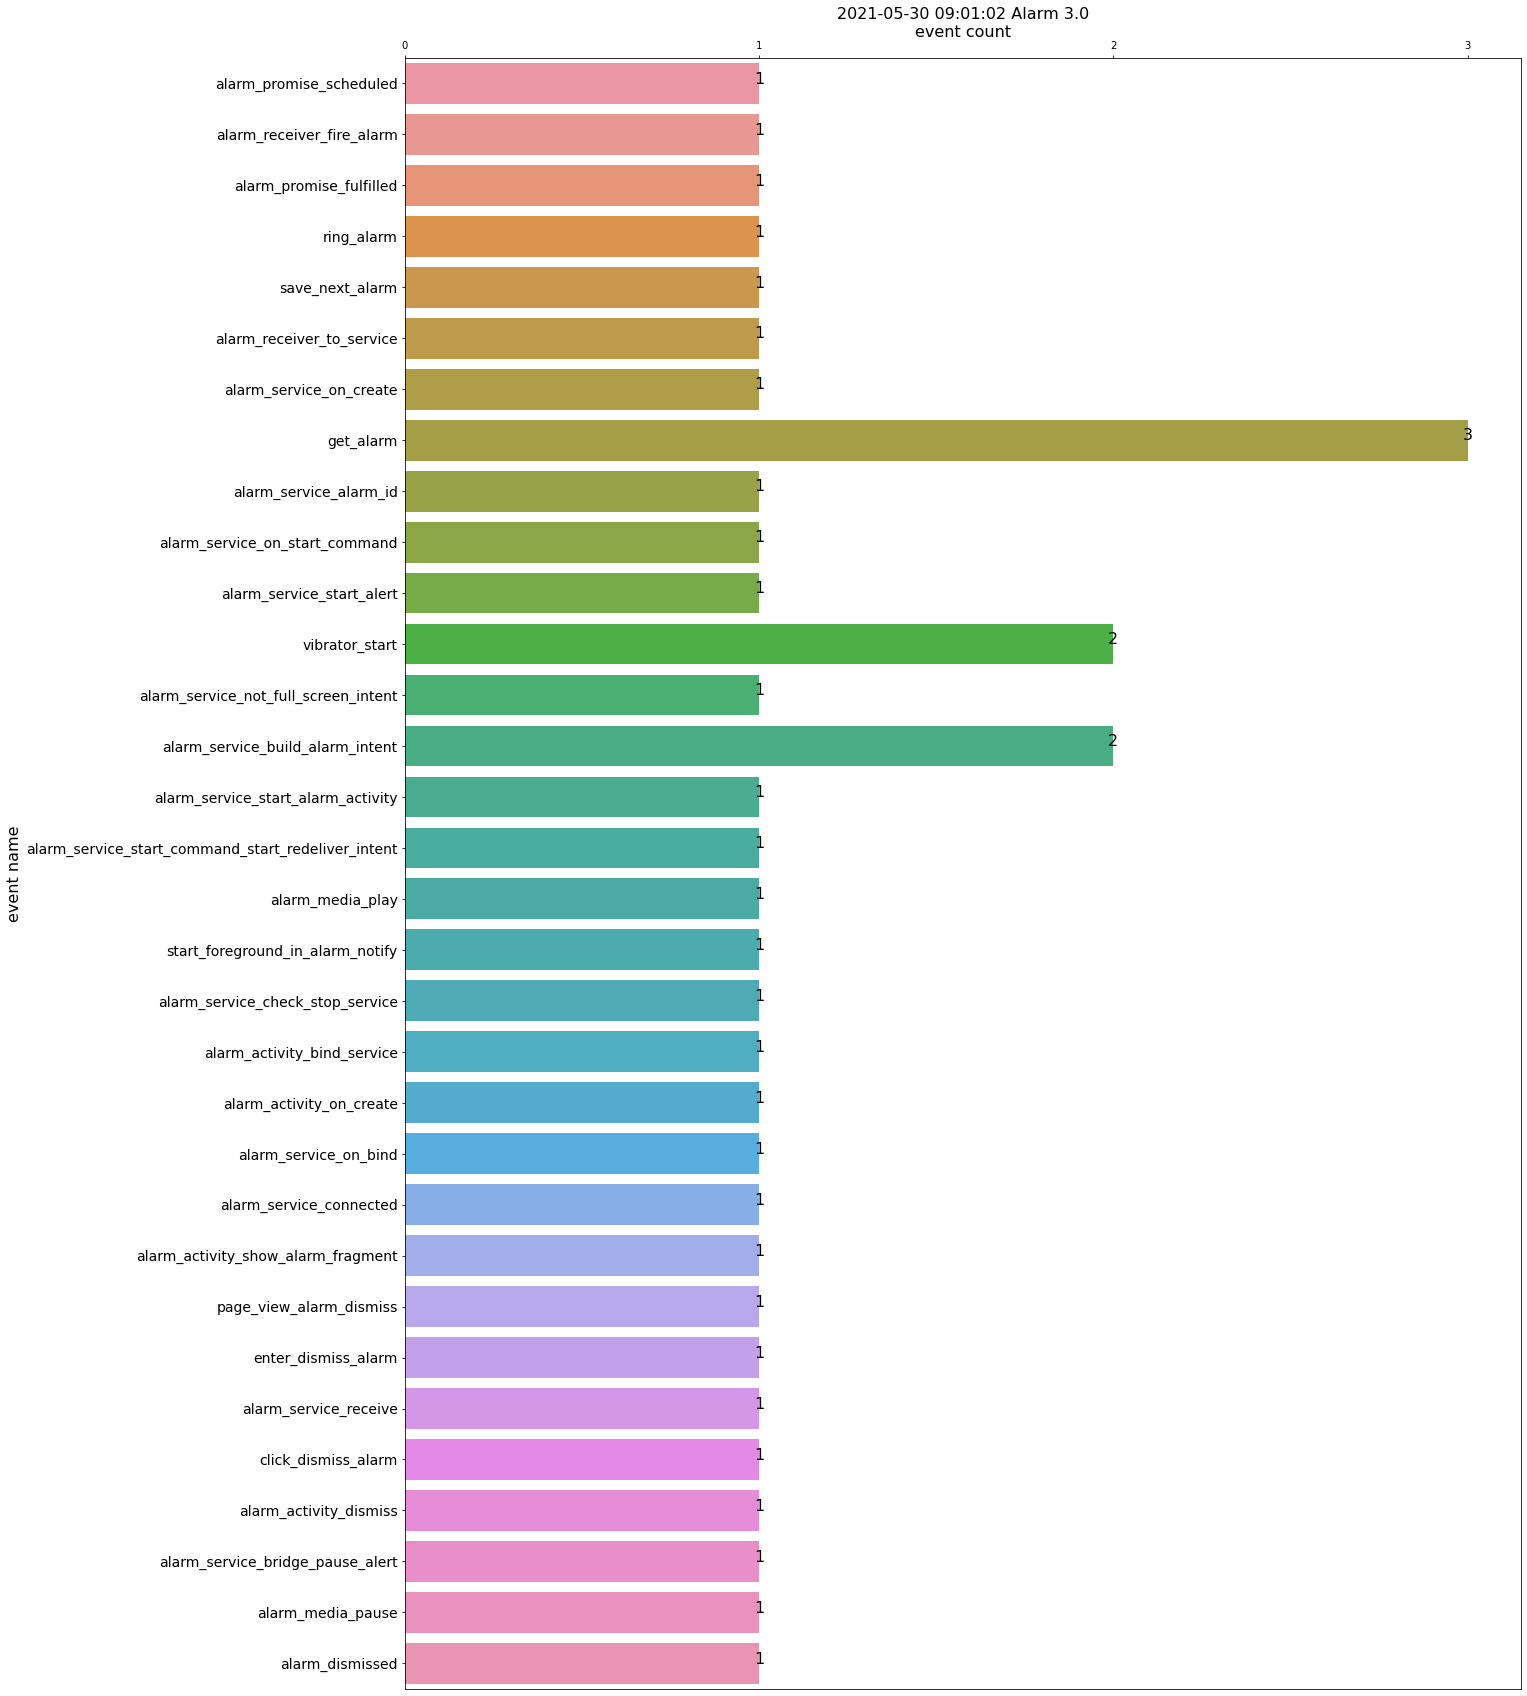

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_5'),
 ('alarm_offset_time', 3459),
 ('alarm_promise_id', '74de0594-bbed-4ae7-8f70-72761a66fca2'),
 ('alarm_time', 1622385060000),
 ('alarm_time_formatted', '2021-05-30 09:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622385070091),
 ('fire_timestamp', 1622989860000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 9),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

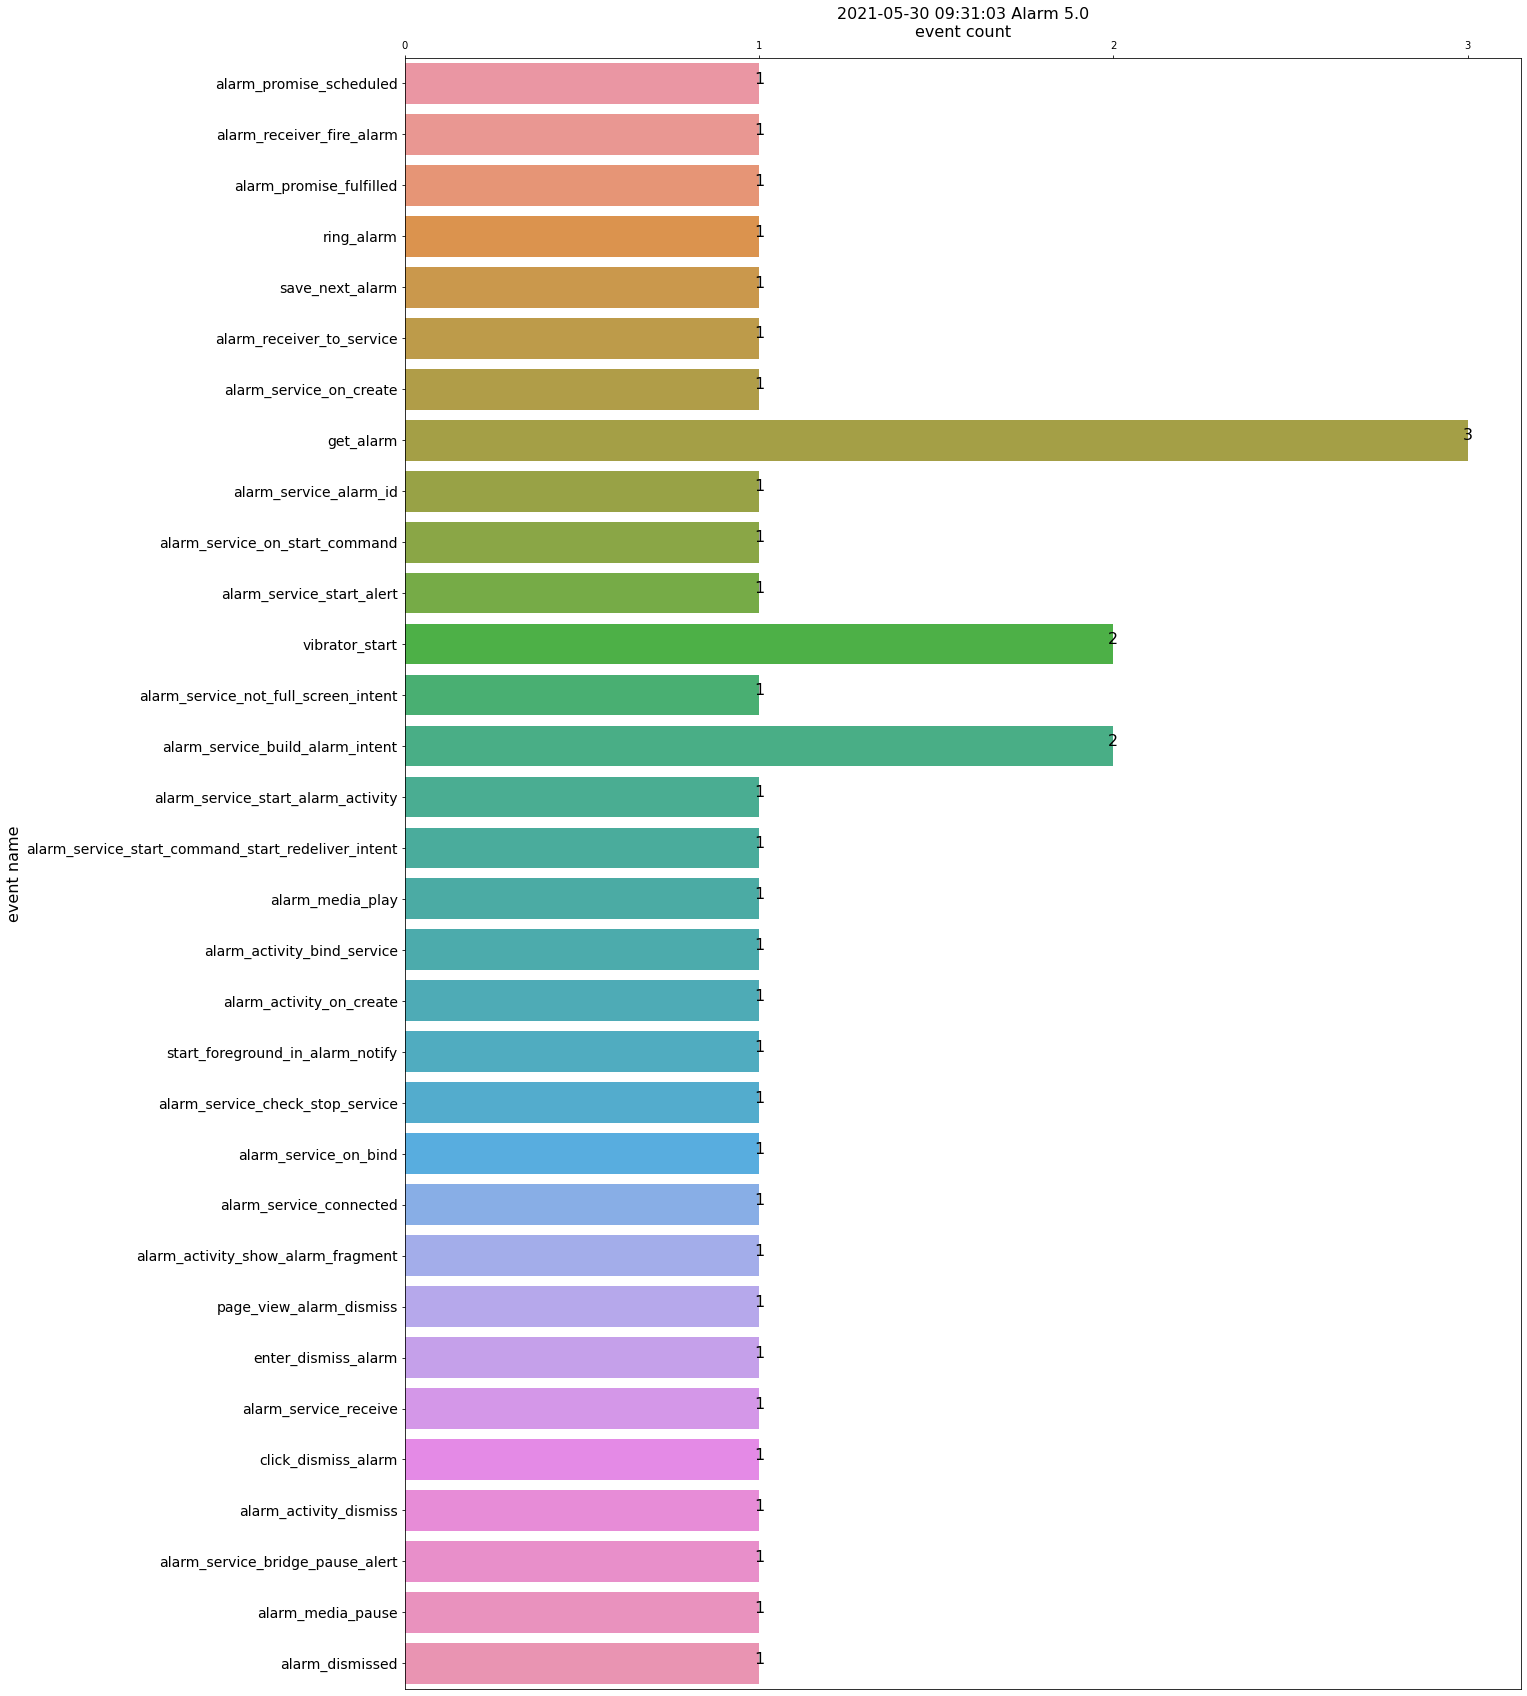

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('adunit', 'AN_Banner_Dismiss'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 2406),
 ('alarm_promise_id', '45c60180-ffa2-4f06-ad84-9637394b3c9c'),
 ('alarm_time', 1622448060000),
 ('alarm_time_formatted', '2021-05-31 03:01:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('error', 'Unspecified error.'),
 ('event_time', 1622448073357),
 ('fire_timestamp', 1622534460000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('i

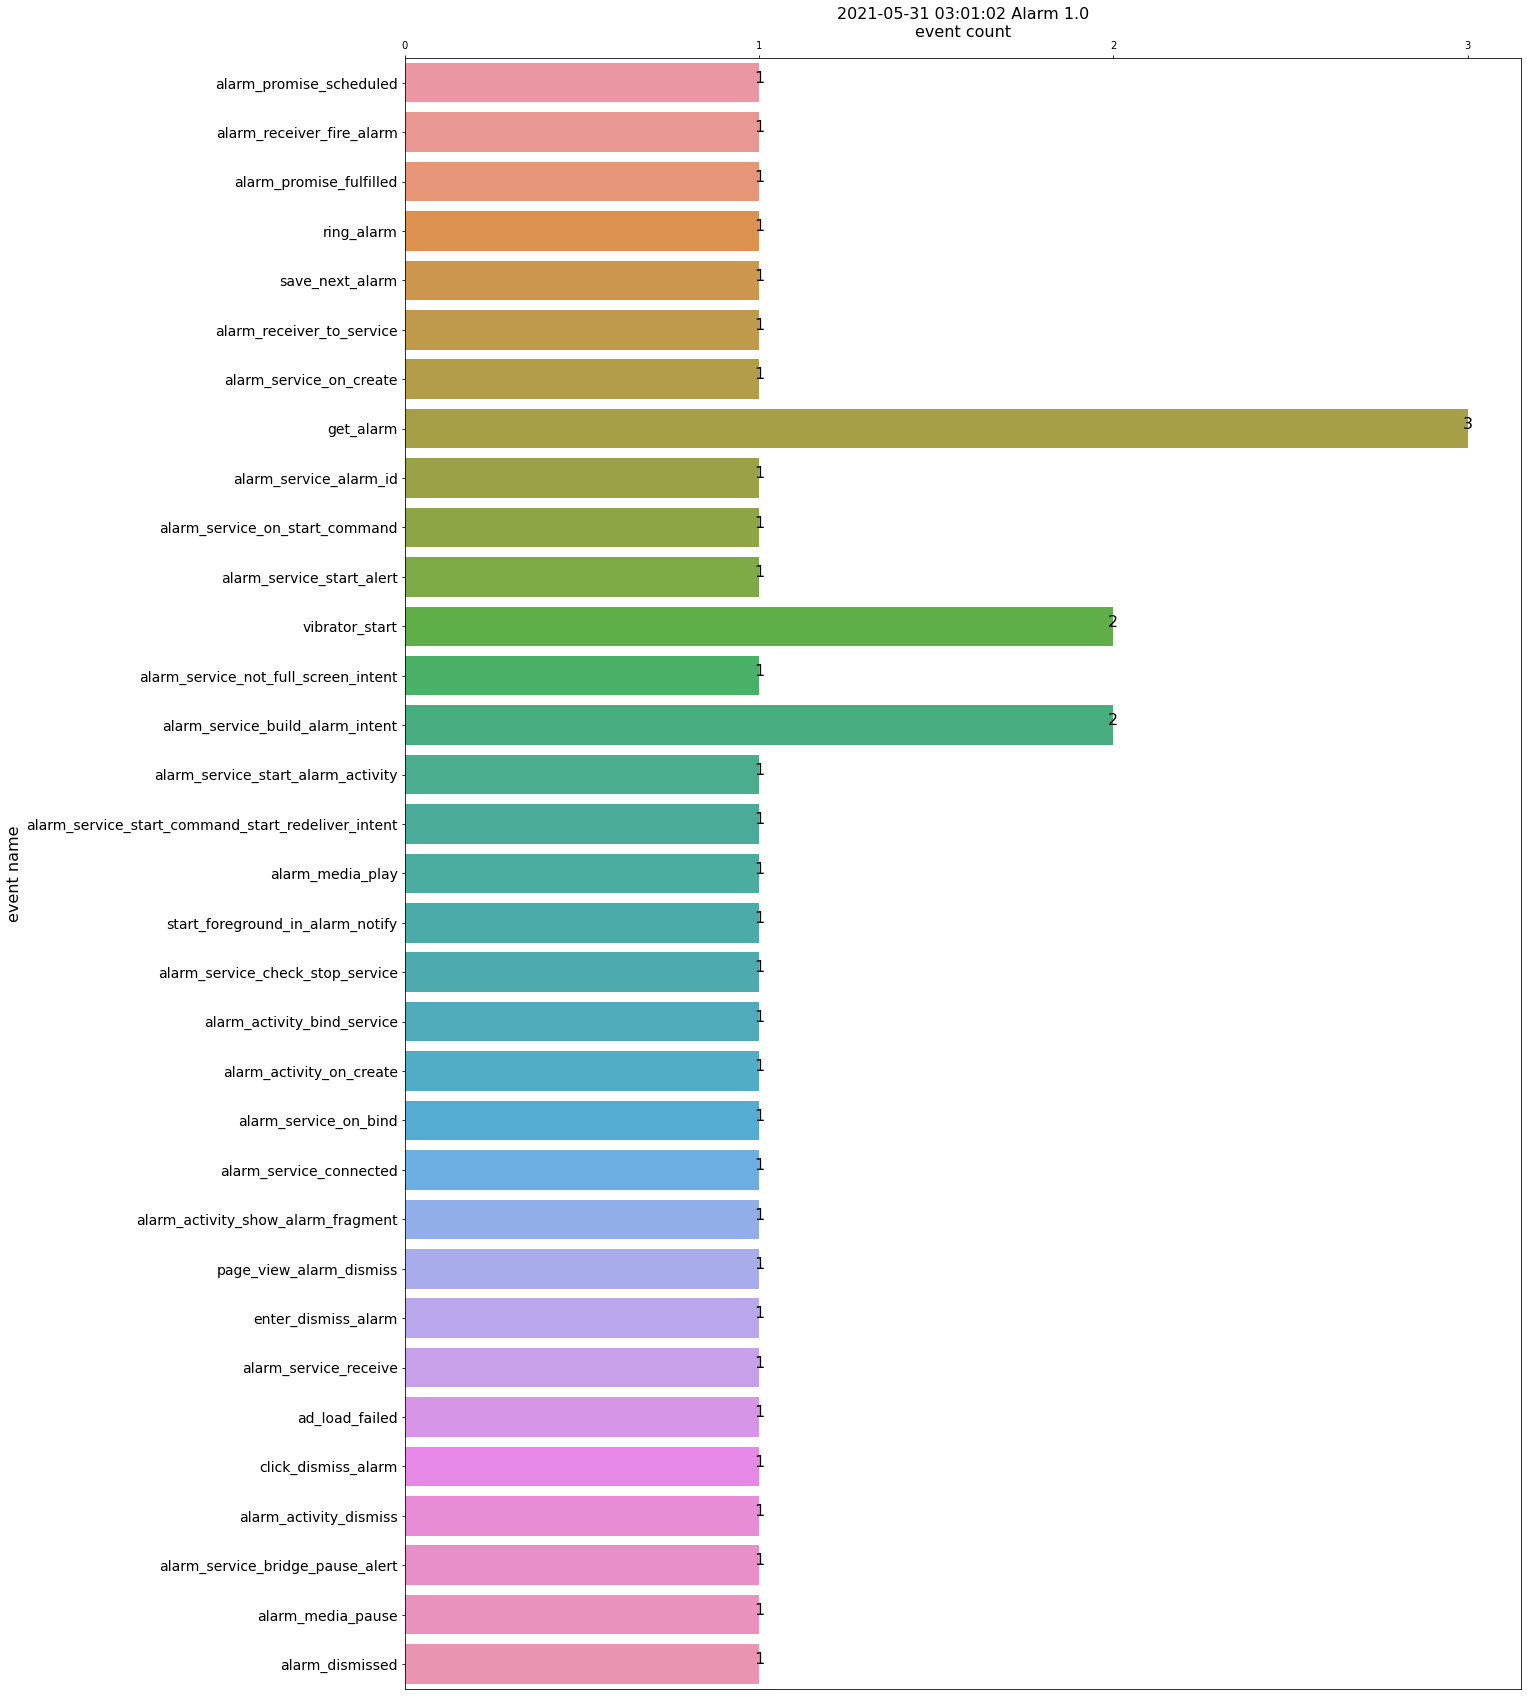

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 3908),
 ('alarm_promise_id', 'b2025b2d-7c6e-4d84-b79a-64ee2c98cd82'),
 ('alarm_time', 1622449860000),
 ('alarm_time_formatted', '2021-05-31 03:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622449868300),
 ('fire_timestamp', 1622536260000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

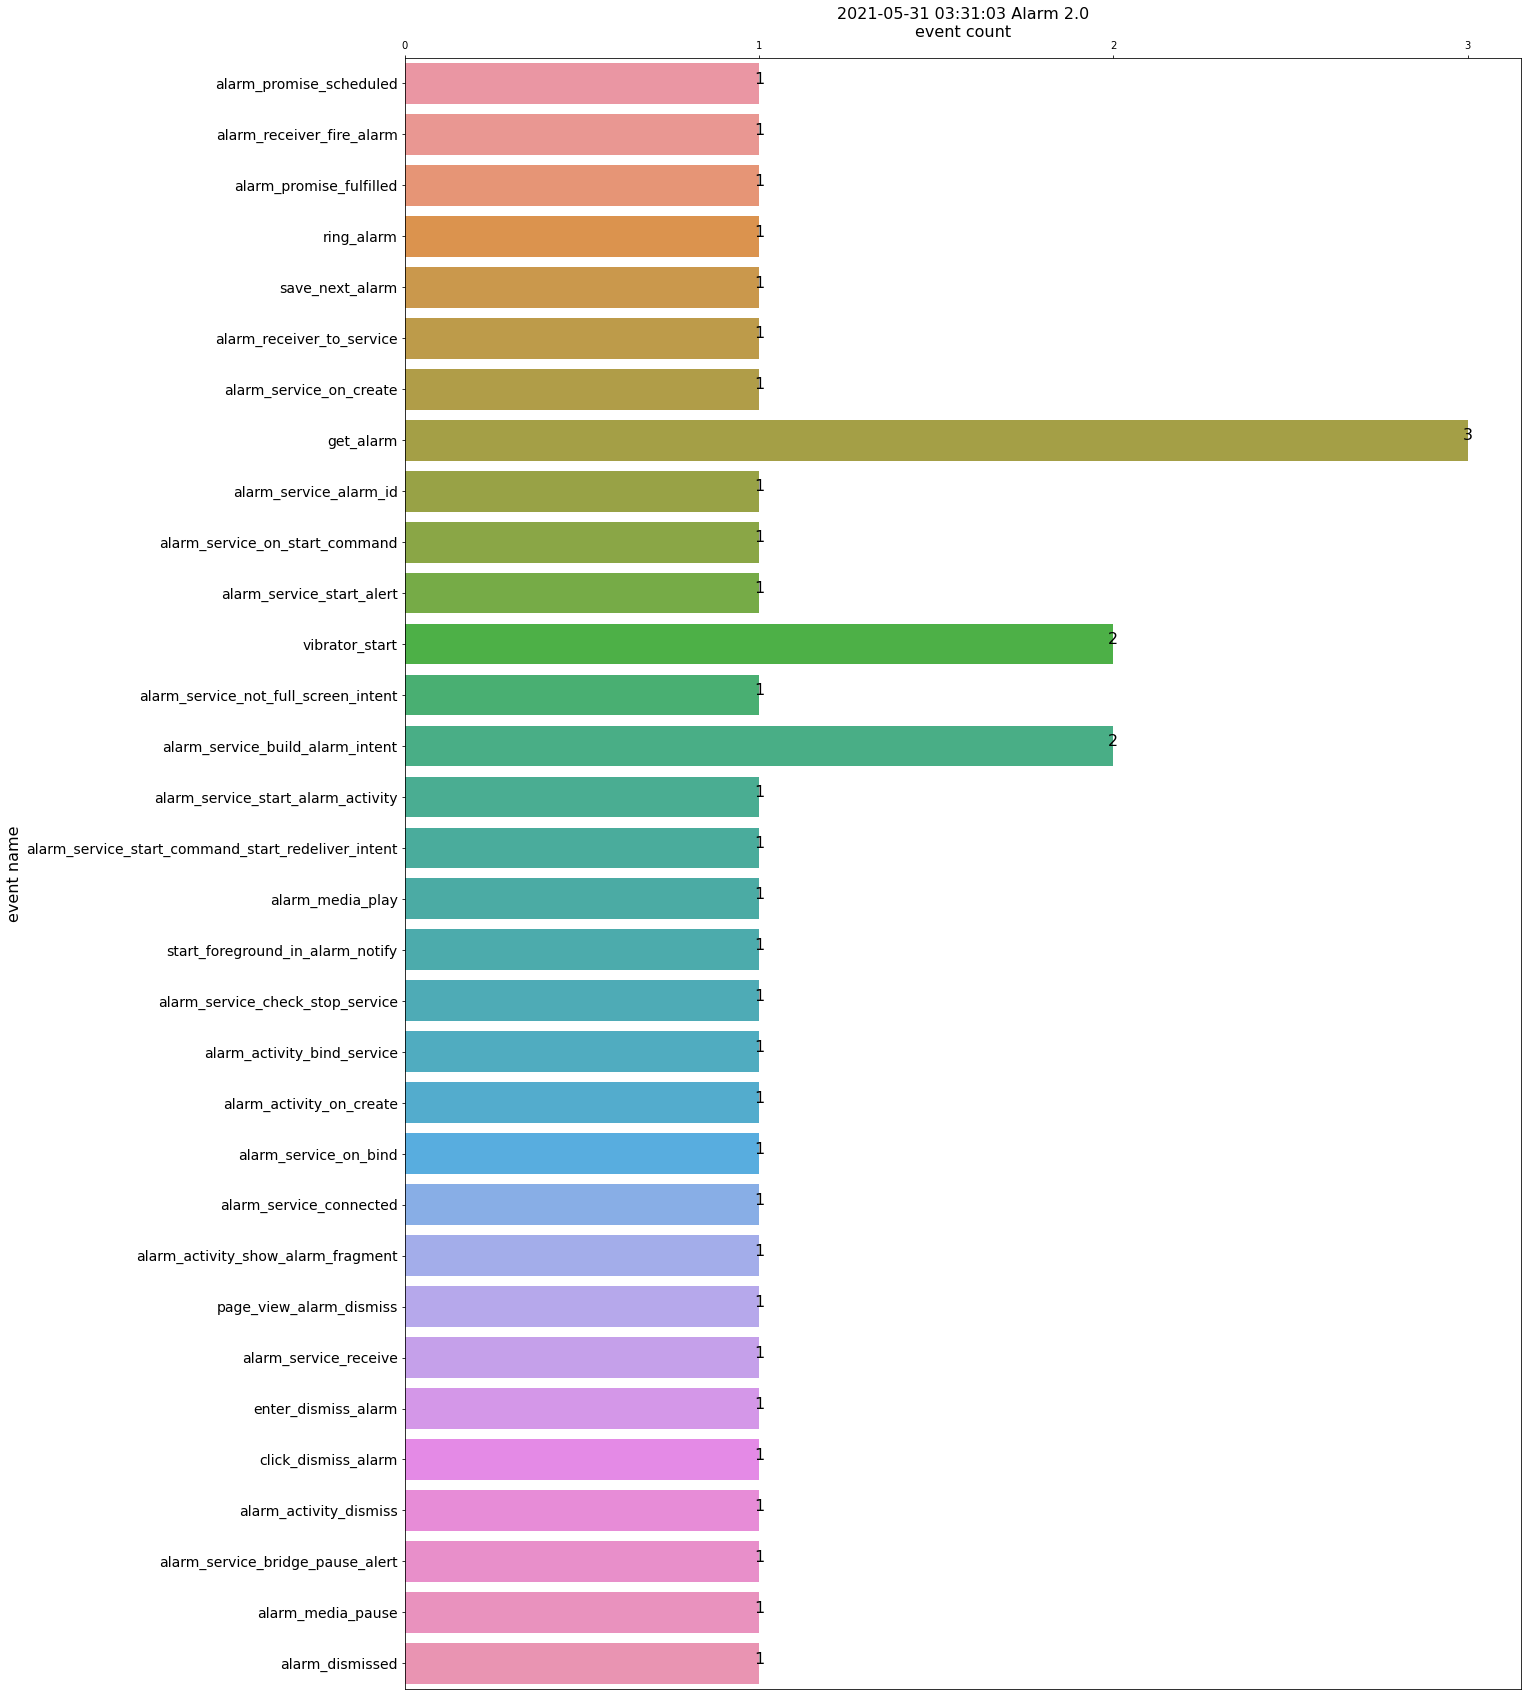

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_11'),
 ('alarm_offset_time', 2273),
 ('alarm_promise_id', '29689f88-5532-42b4-ba78-d81dc8b4b216'),
 ('alarm_time', 1622489280000),
 ('alarm_time_formatted', '2021-05-31 14:28:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 77),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622489288056),
 ('fire_timestamp', 1622575680000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 14),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', True),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 (

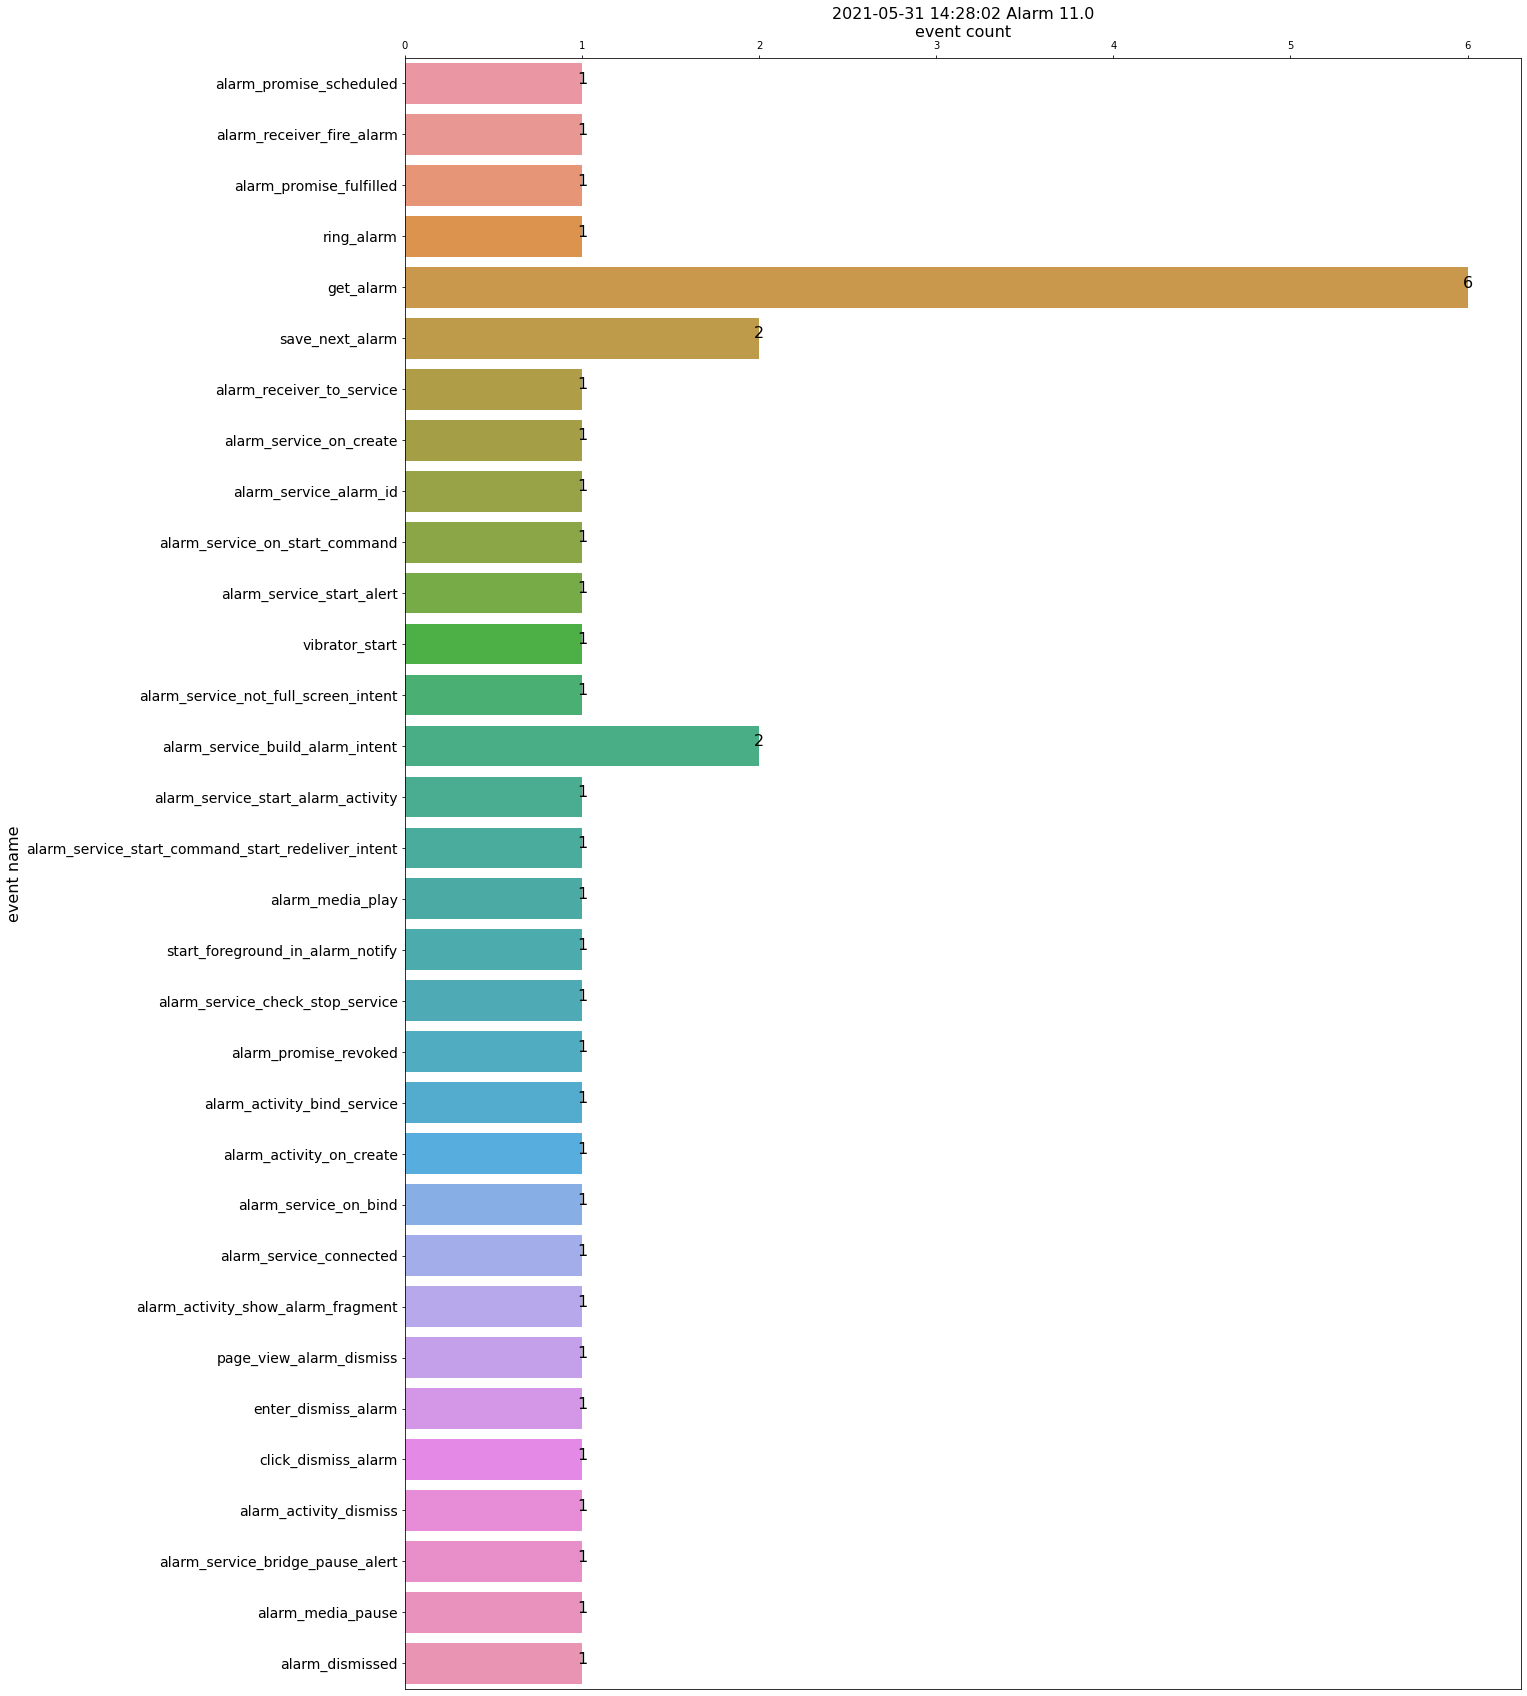

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_11'),
 ('alarm_offset_time', 2618),
 ('alarm_promise_id', 'f5a1dc3f-94c6-4acc-86b5-f15265efed92'),
 ('alarm_time', 1622489640000),
 ('alarm_time_formatted', '2021-05-31 14:34:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 77),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622489646775),
 ('fire_timestamp', 1622576040000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 14),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', True),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 (

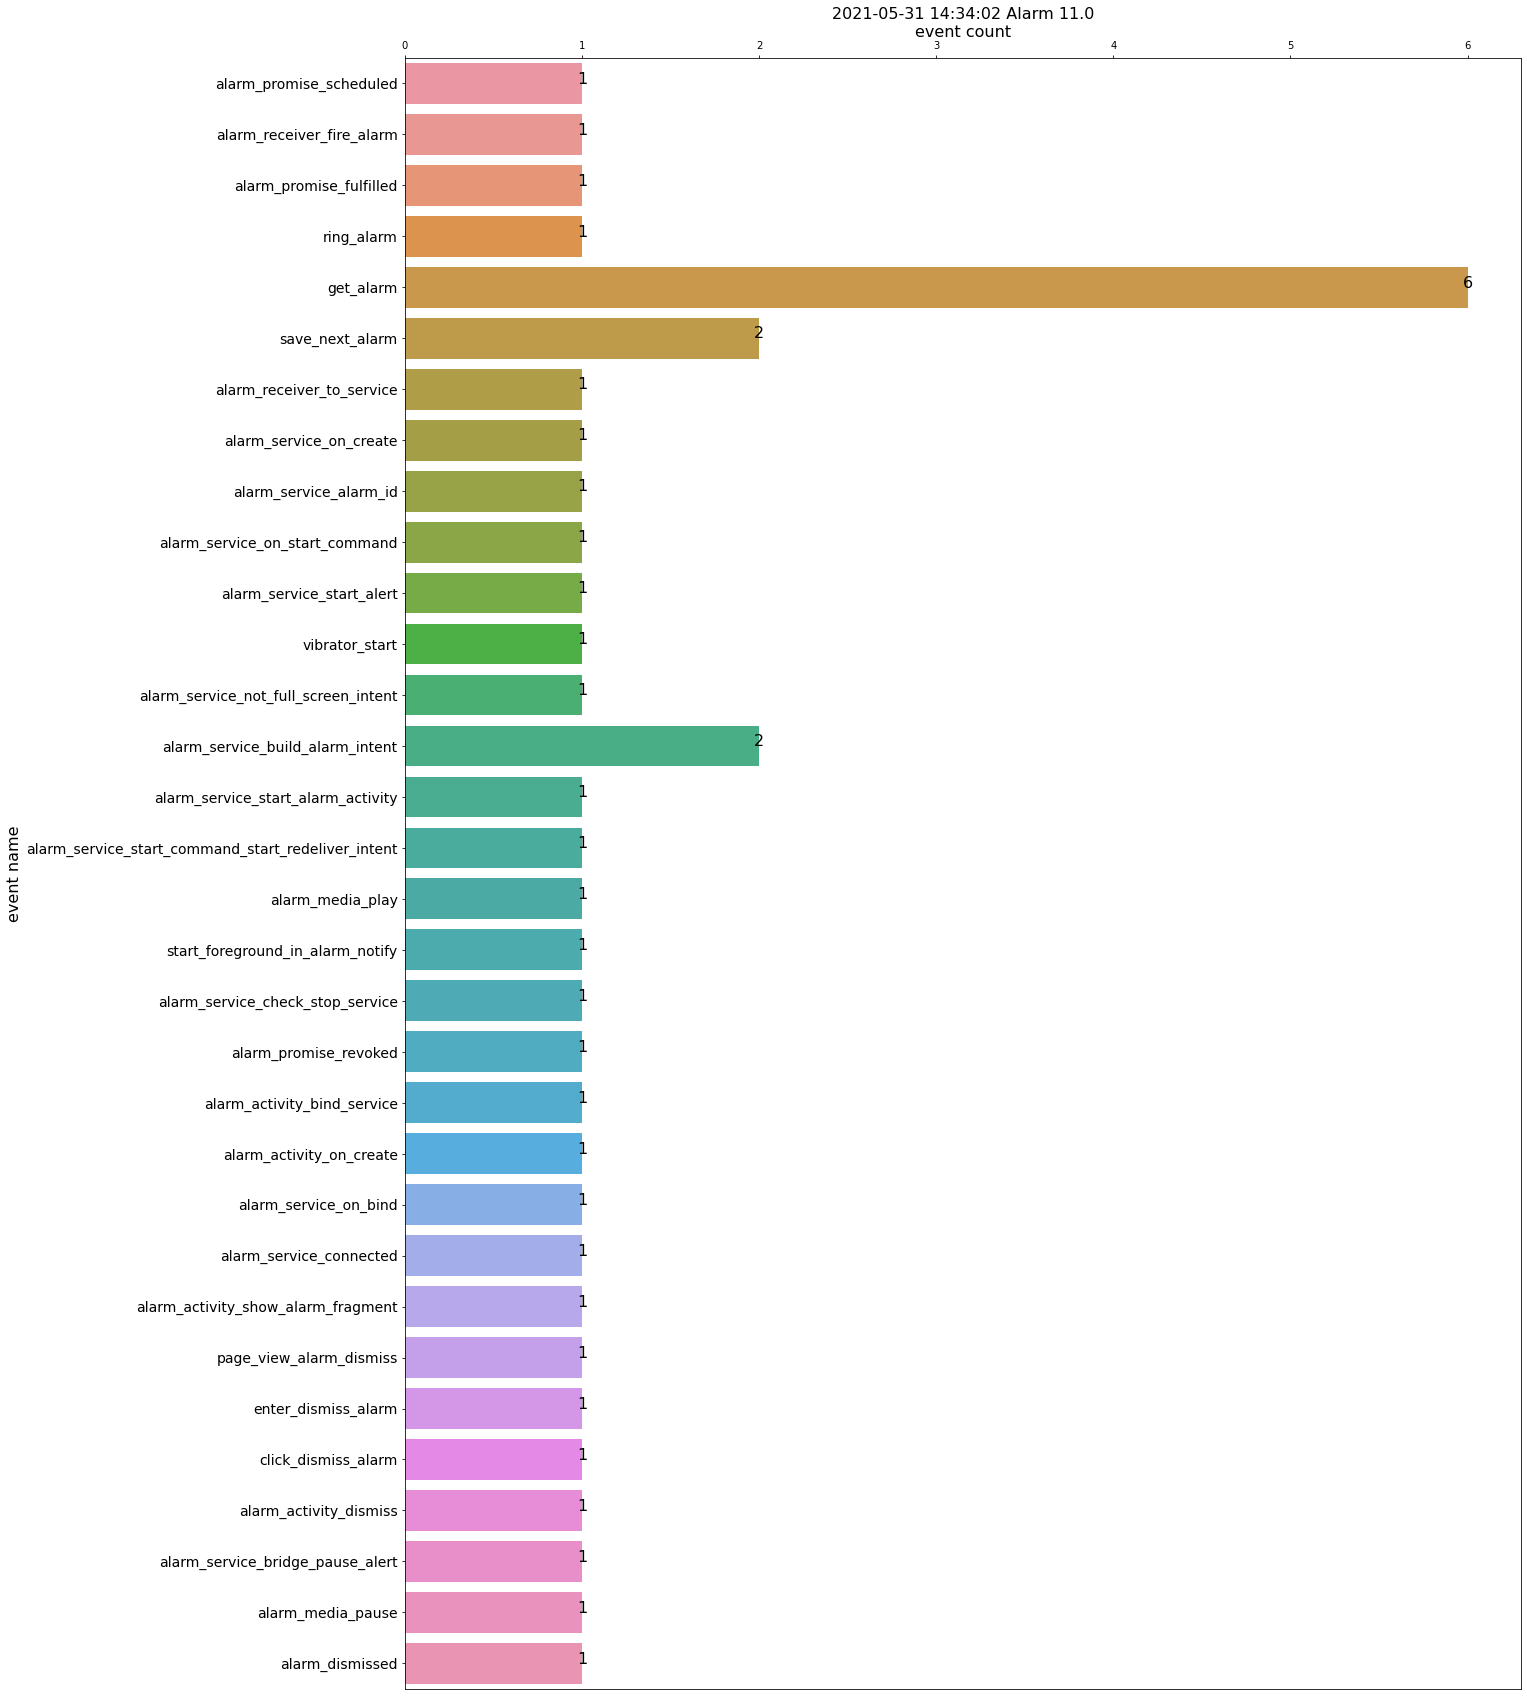

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 2069),
 ('alarm_promise_id', '9ea65584-c620-4bbb-9b99-03c0ae729fdf'),
 ('alarm_time', 1622548860000),
 ('alarm_time_formatted', '2021-06-01 07:01:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622548872522),
 ('fire_timestamp', 1622635260000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 7),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

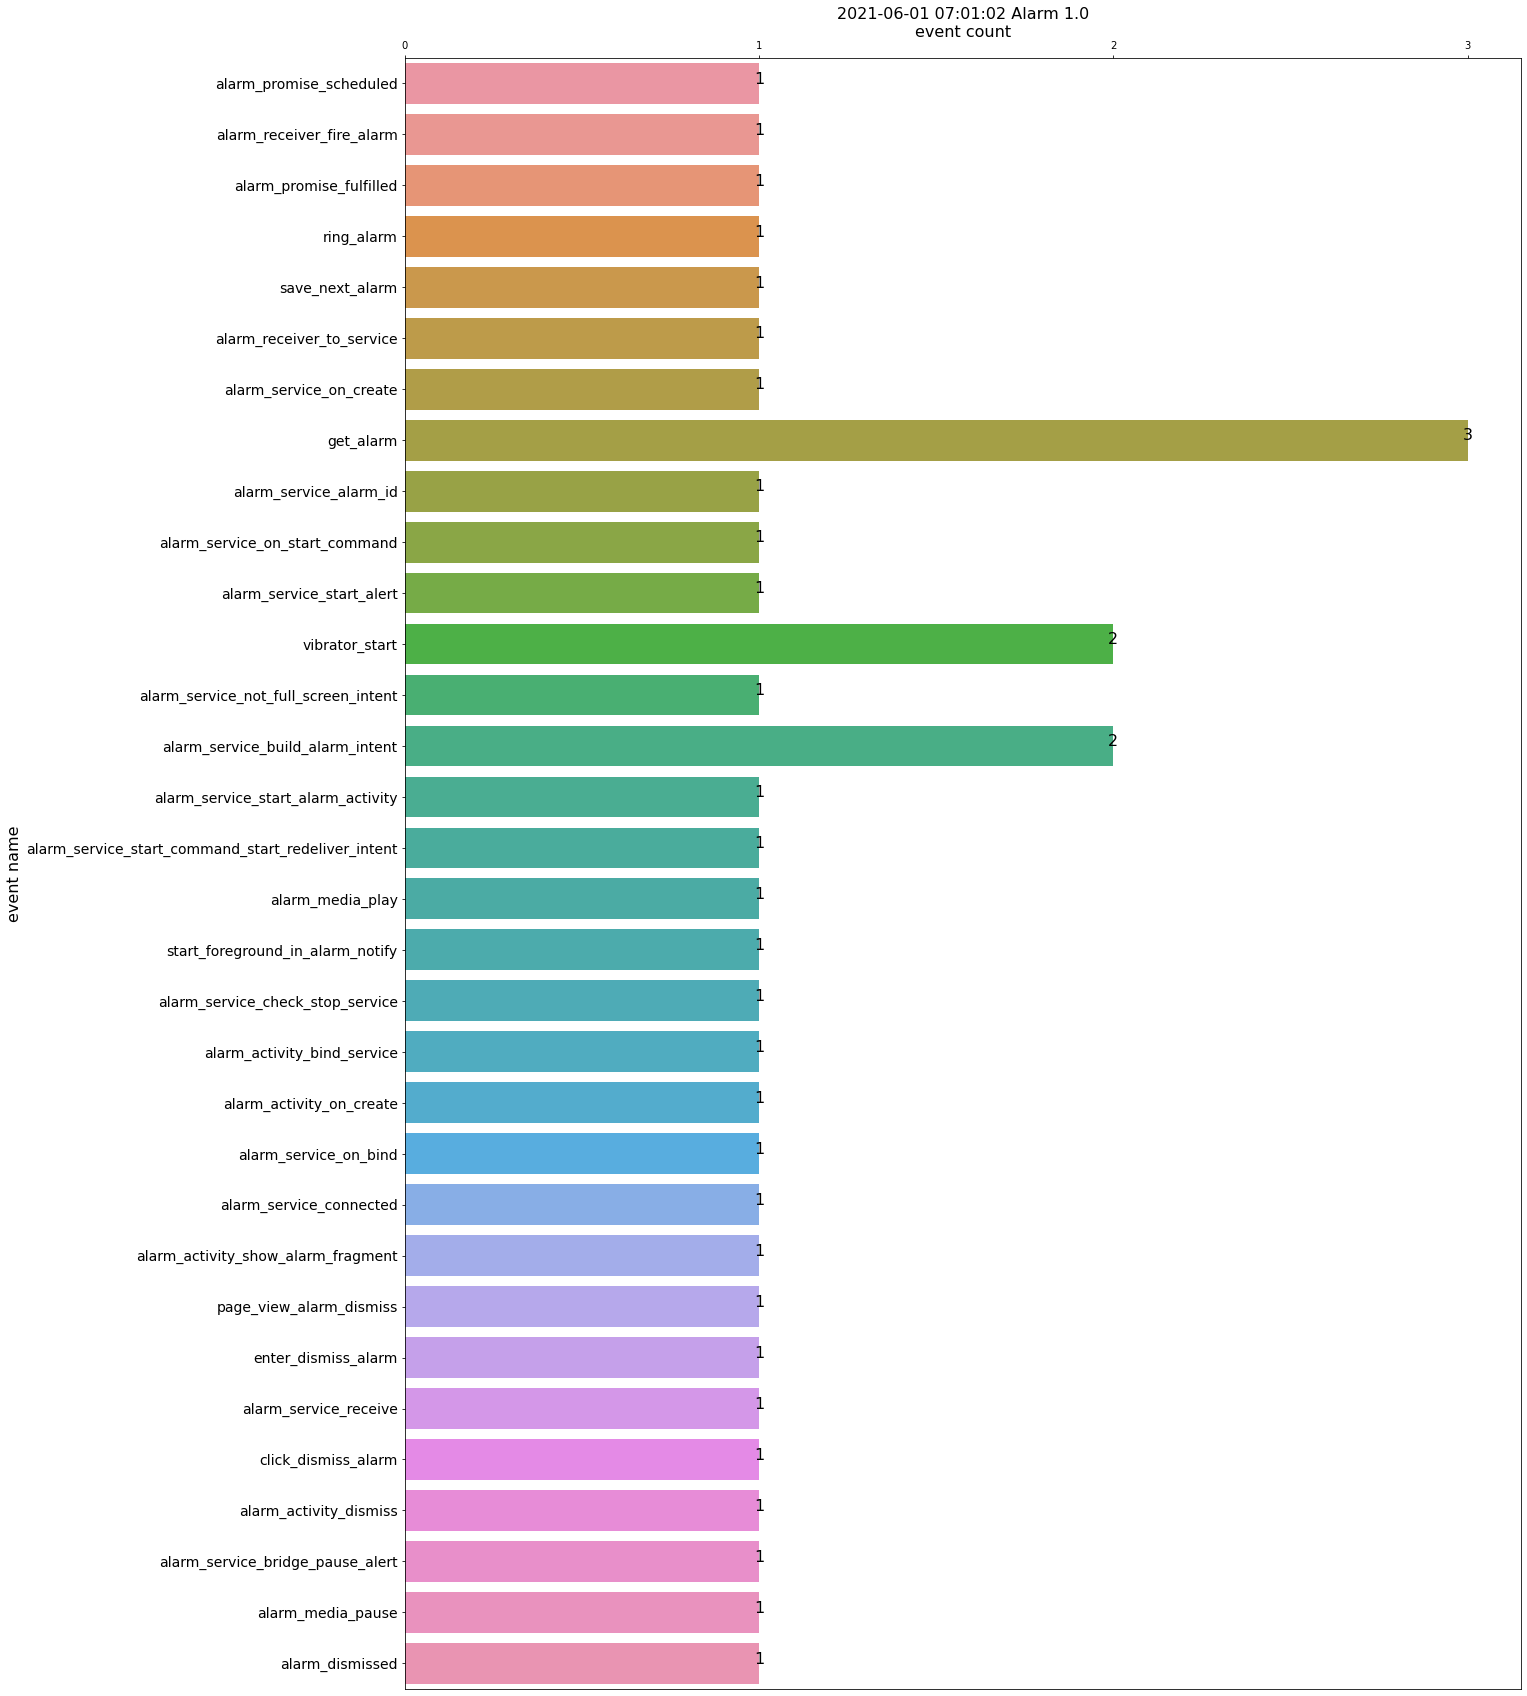

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 2558),
 ('alarm_promise_id', 'eb2bde61-79fe-4c8c-b8d8-e3183d8df0be'),
 ('alarm_time', 1622550660000),
 ('alarm_time_formatted', '2021-06-01 07:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622550722090),
 ('fire_timestamp', 1622637060000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 7),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('i

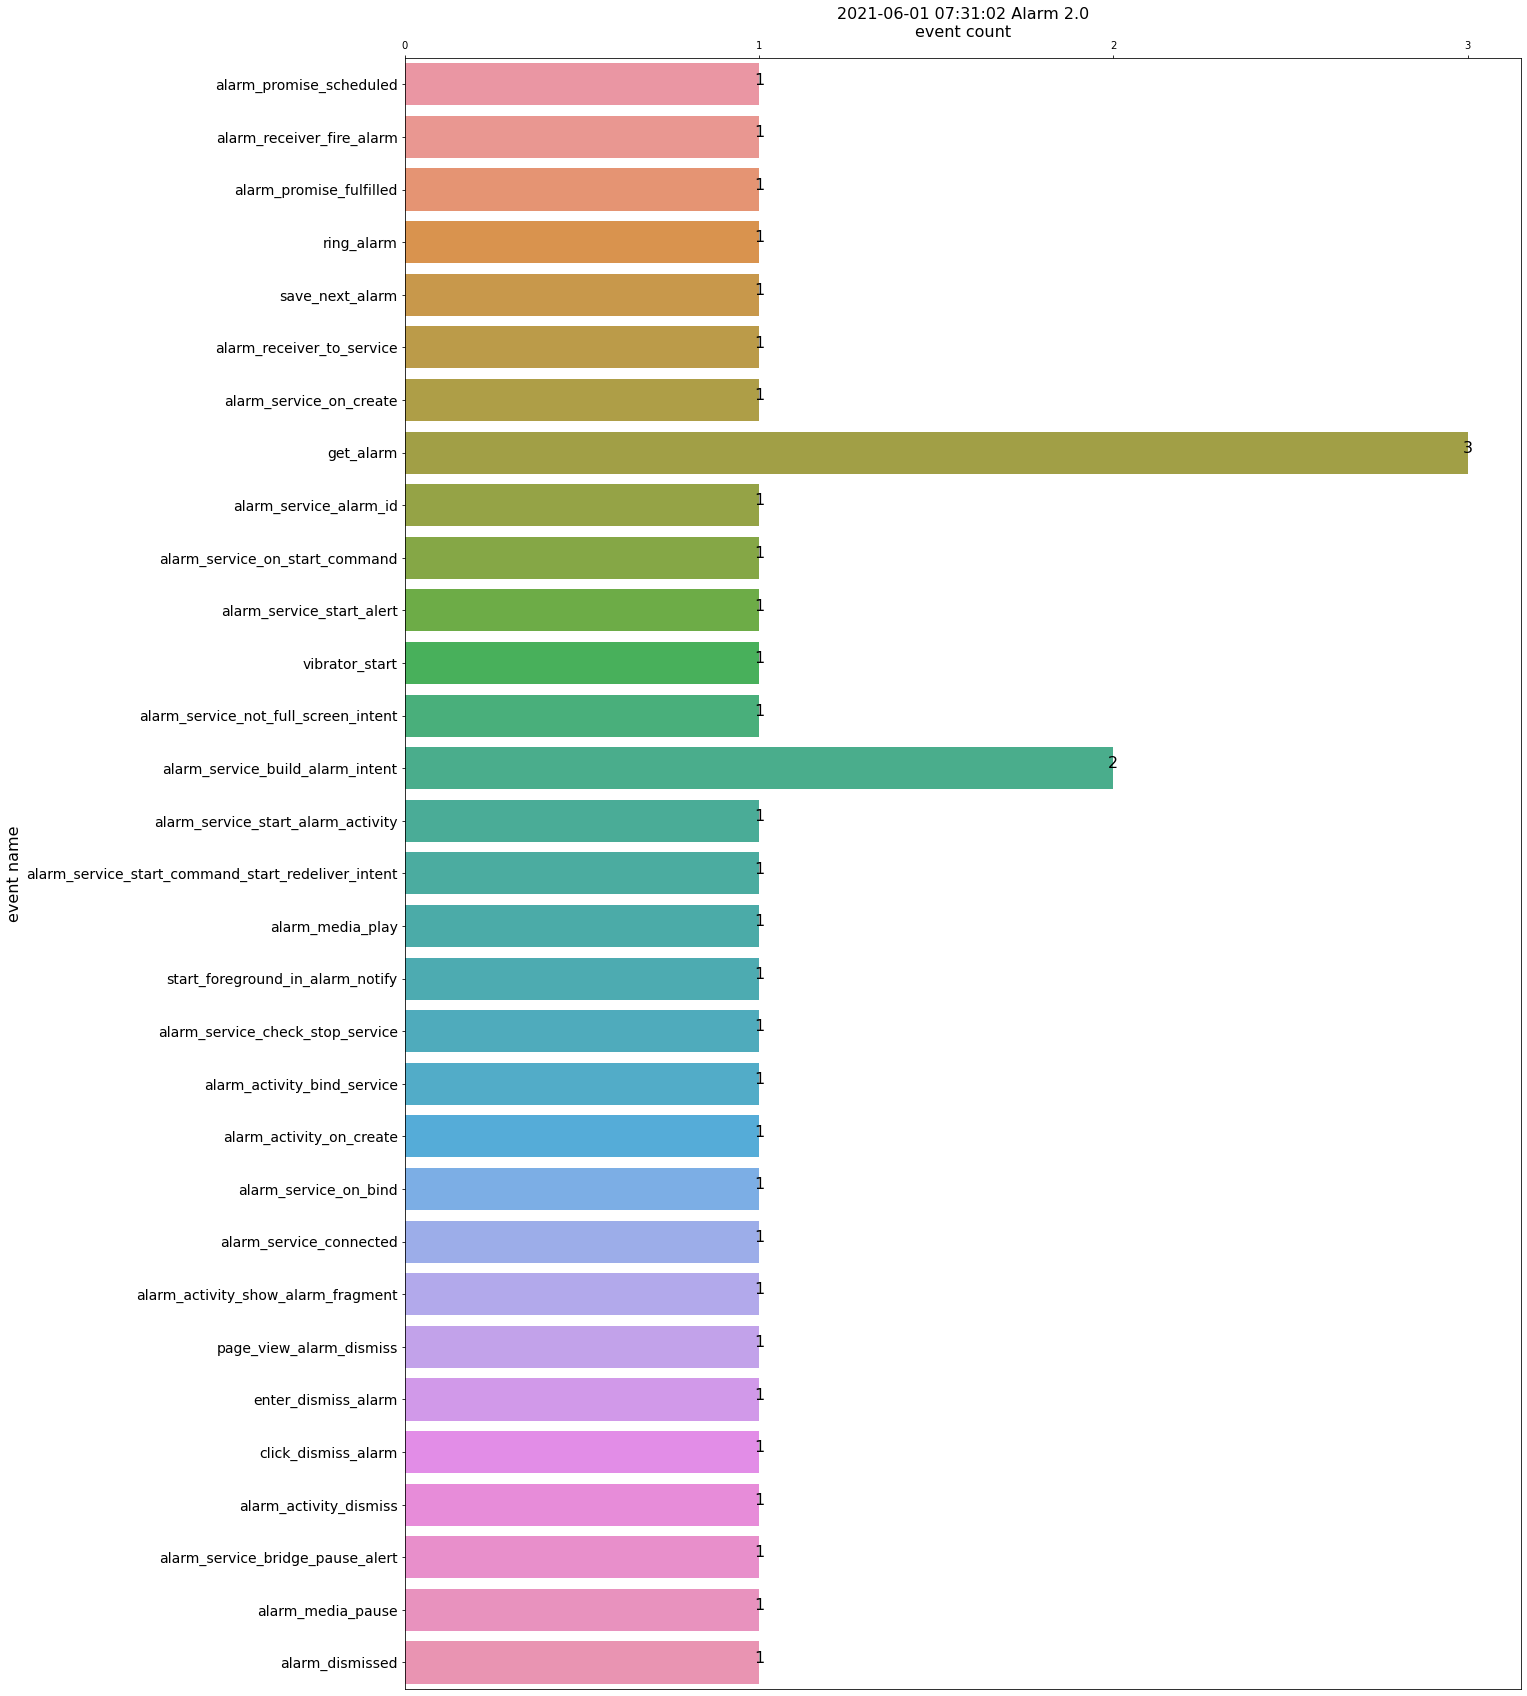

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_11'),
 ('alarm_offset_time', 2602),
 ('alarm_promise_id', '4e02f025-55f4-4ef2-a5bf-a6cf7dbe60a7'),
 ('alarm_time', 1622588040000),
 ('alarm_time_formatted', '2021-06-01 17:54:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 77),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622588049097),
 ('fire_timestamp', 1622674440000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 17),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', True),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 (

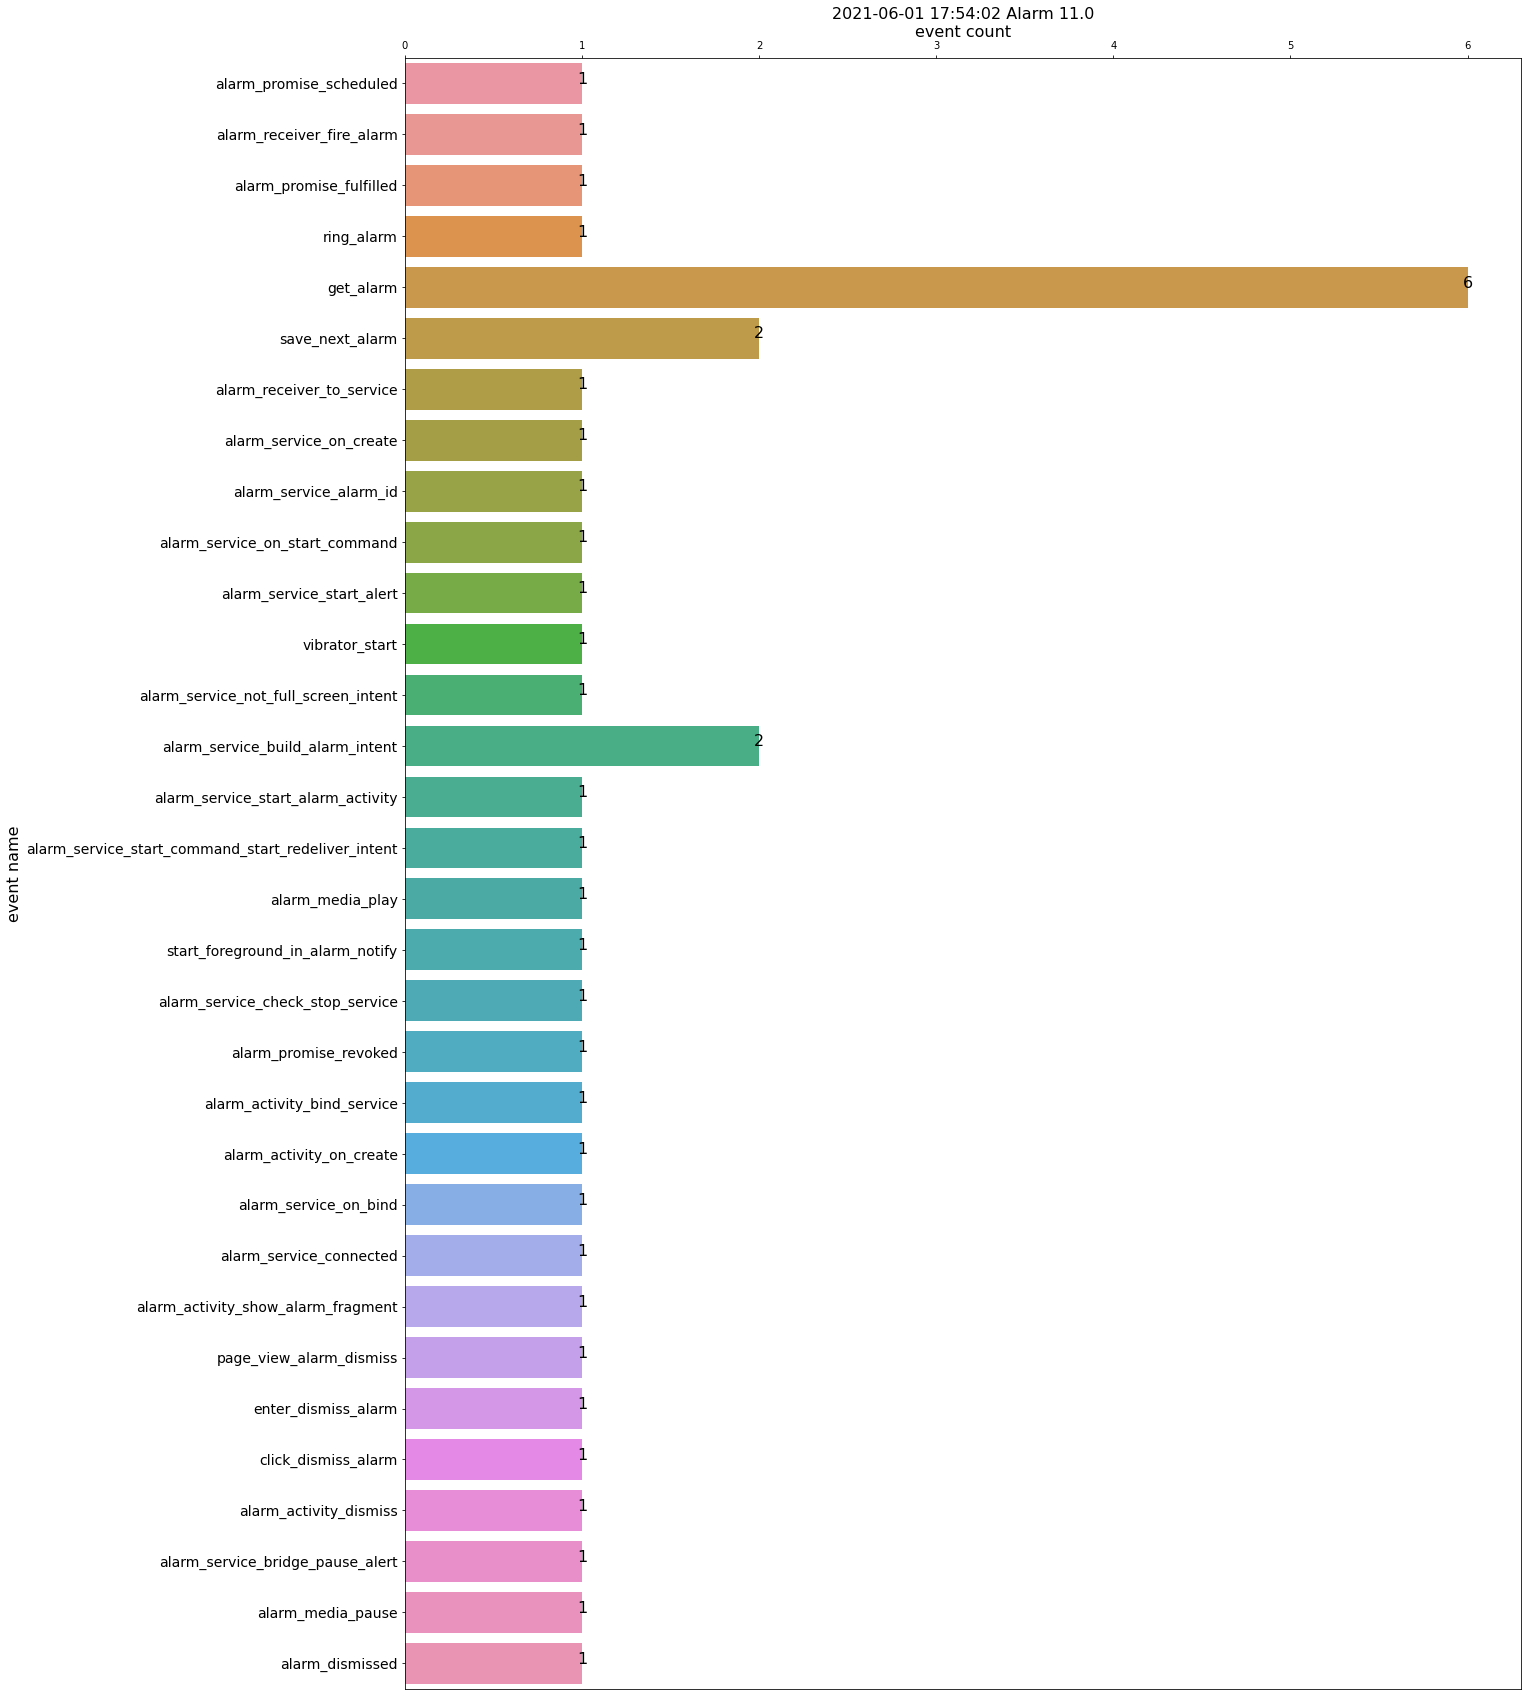

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_6'),
 ('alarm_offset_time', 4800),
 ('alarm_promise_id', 'b2349c43-340c-4173-963c-2035623c1ddc'),
 ('alarm_time', 1622594700000),
 ('alarm_time_formatted', '2021-06-01 19:45:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622594709420),
 ('fire_timestamp', 1623199500000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 19),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('

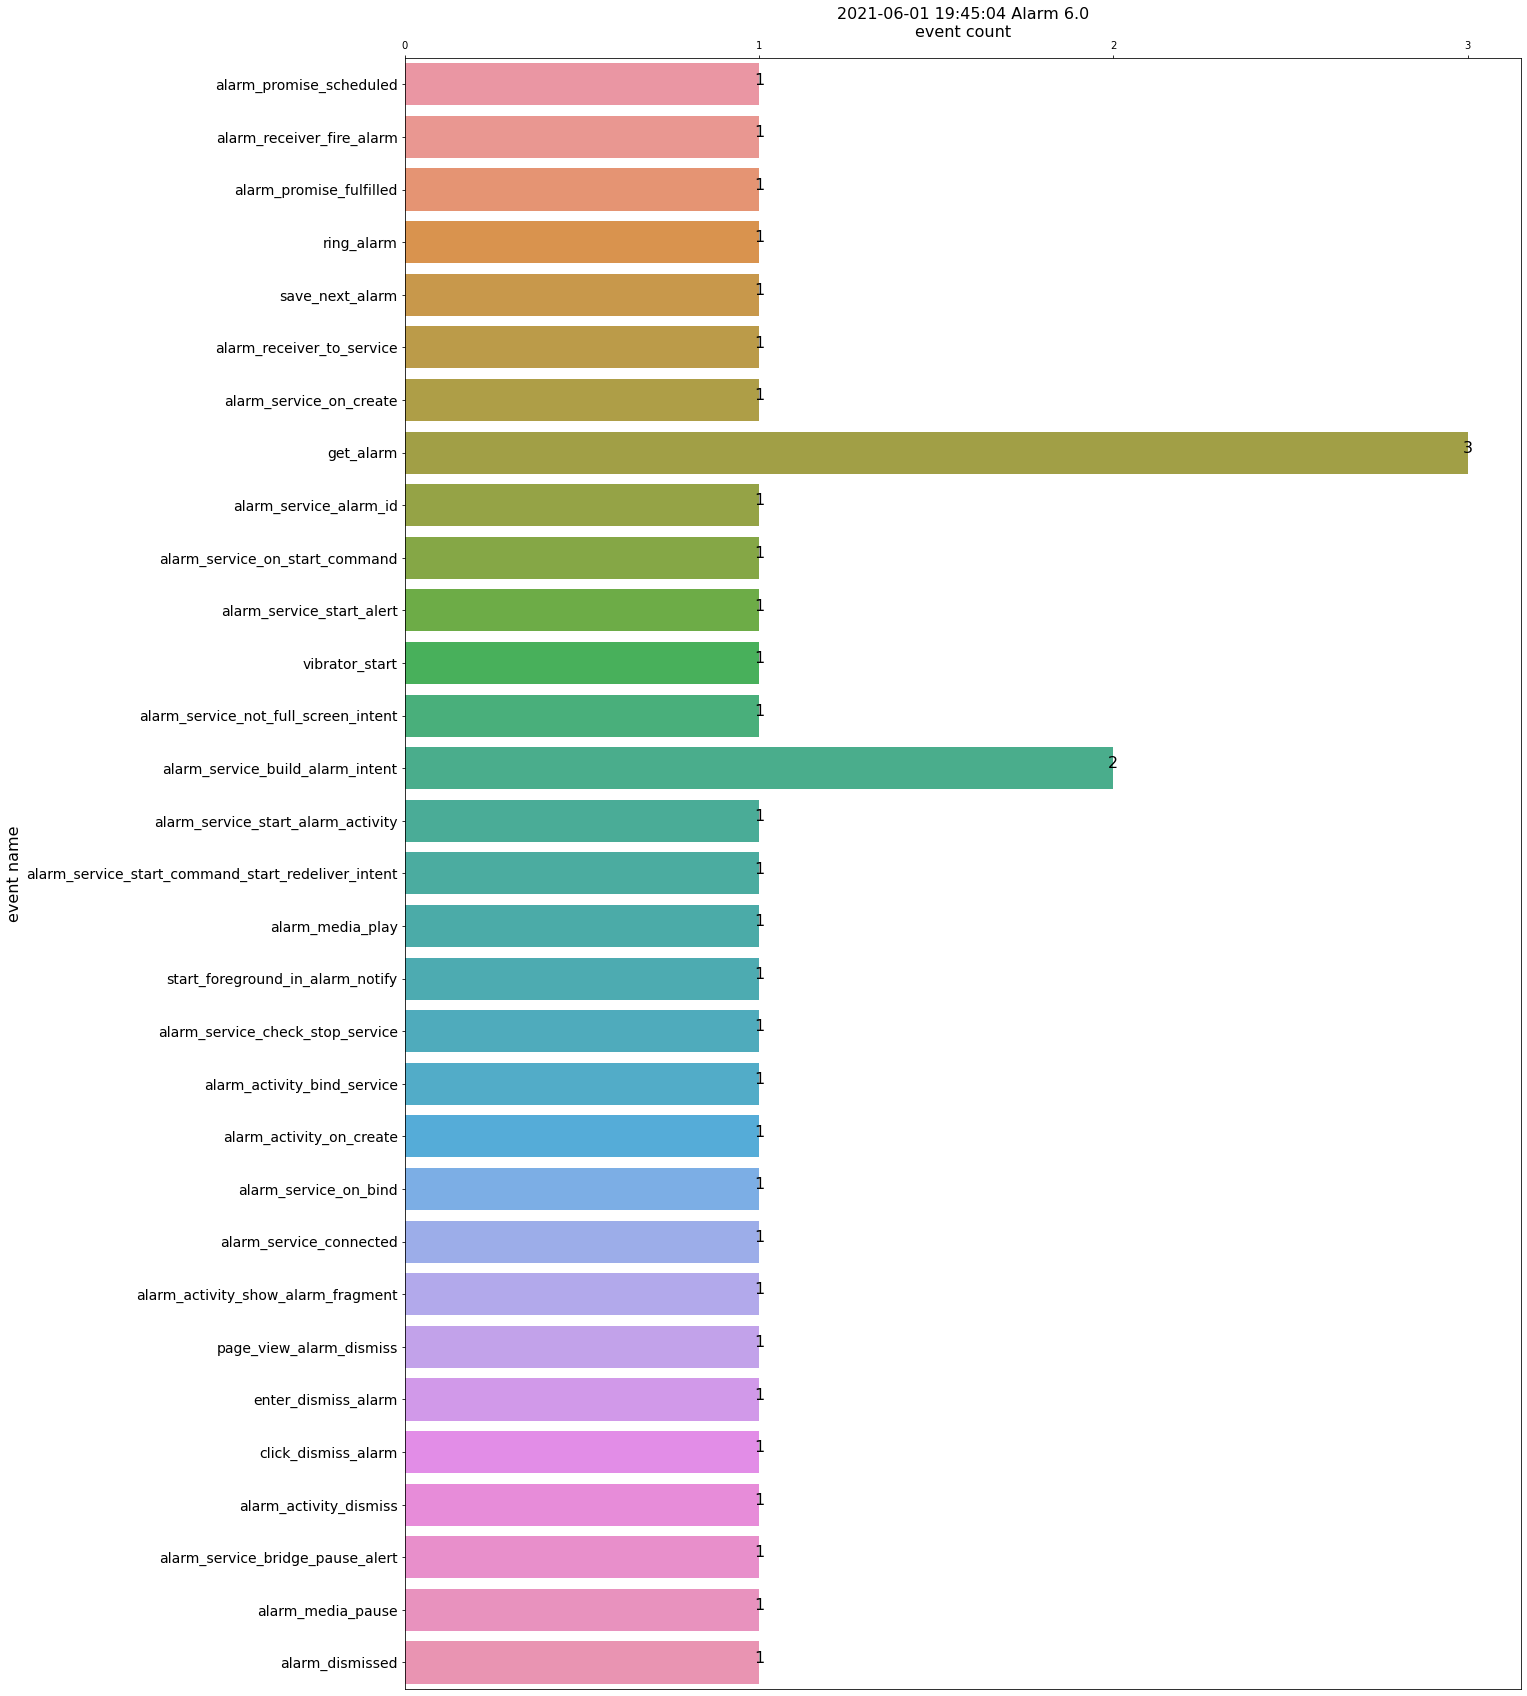

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 5174),
 ('alarm_promise_id', 'd20484b3-a329-4733-b1d4-469bcb32972c'),
 ('alarm_time', 1622620860000),
 ('alarm_time_formatted', '2021-06-02 03:01:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622620877152),
 ('fire_timestamp', 1622707260000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

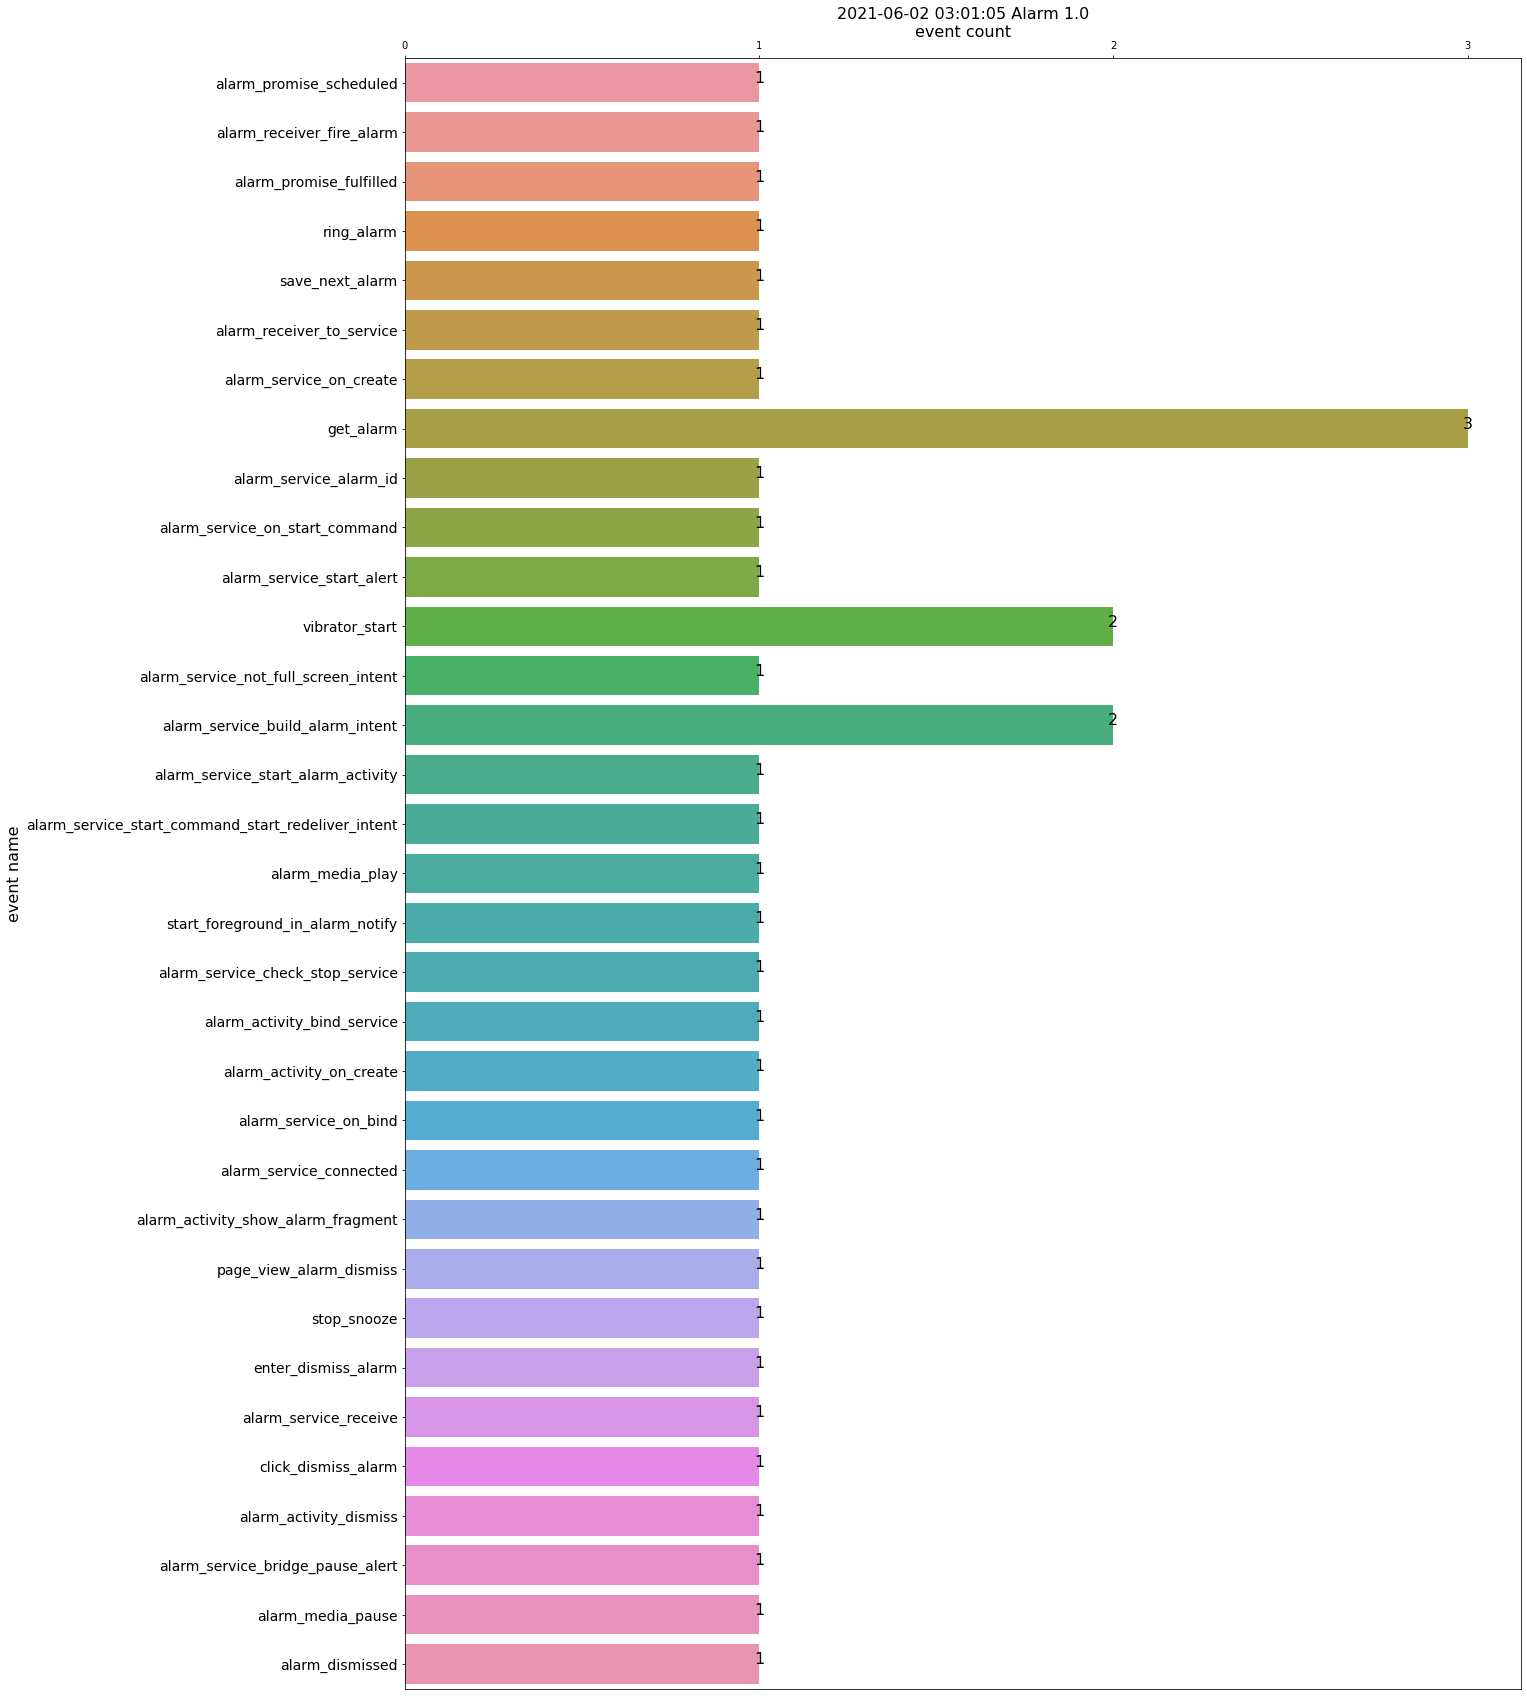

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 6768),
 ('alarm_promise_id', 'b7e1c162-0363-41a0-8987-d2ec67c2cf67'),
 ('alarm_time', 1622622660000),
 ('alarm_time_formatted', '2021-06-02 03:31:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622622679324),
 ('fire_timestamp', 1622709060000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('i

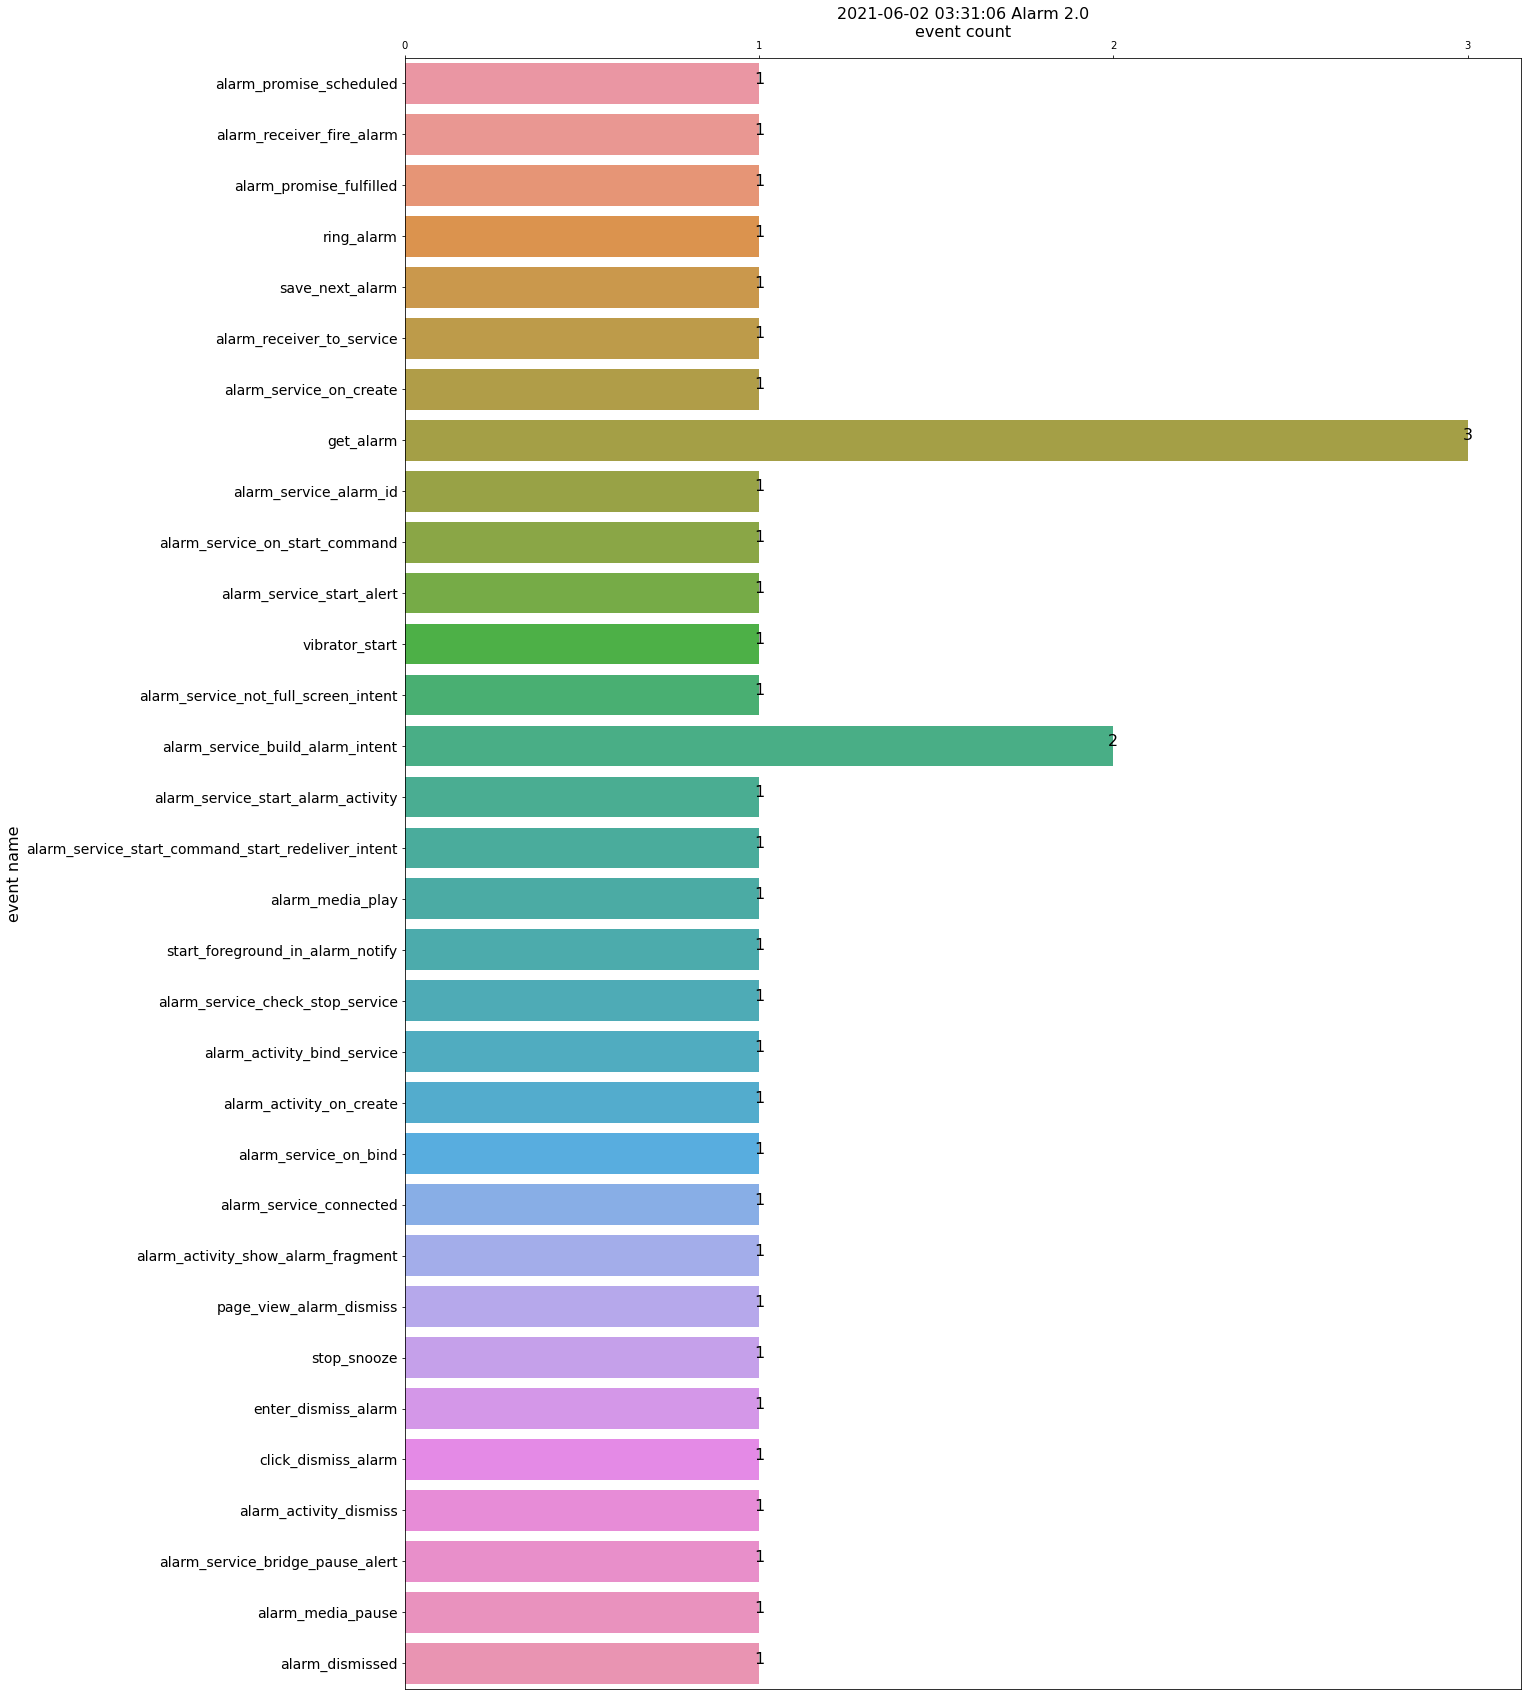

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 2468),
 ('alarm_promise_id', '1eca38ec-2912-4c2f-b028-955b0002bdef'),
 ('alarm_time', 1622718900000),
 ('alarm_time_formatted', '2021-06-03 06:15:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622718908138),
 ('fire_timestamp', 1622805300000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 6),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

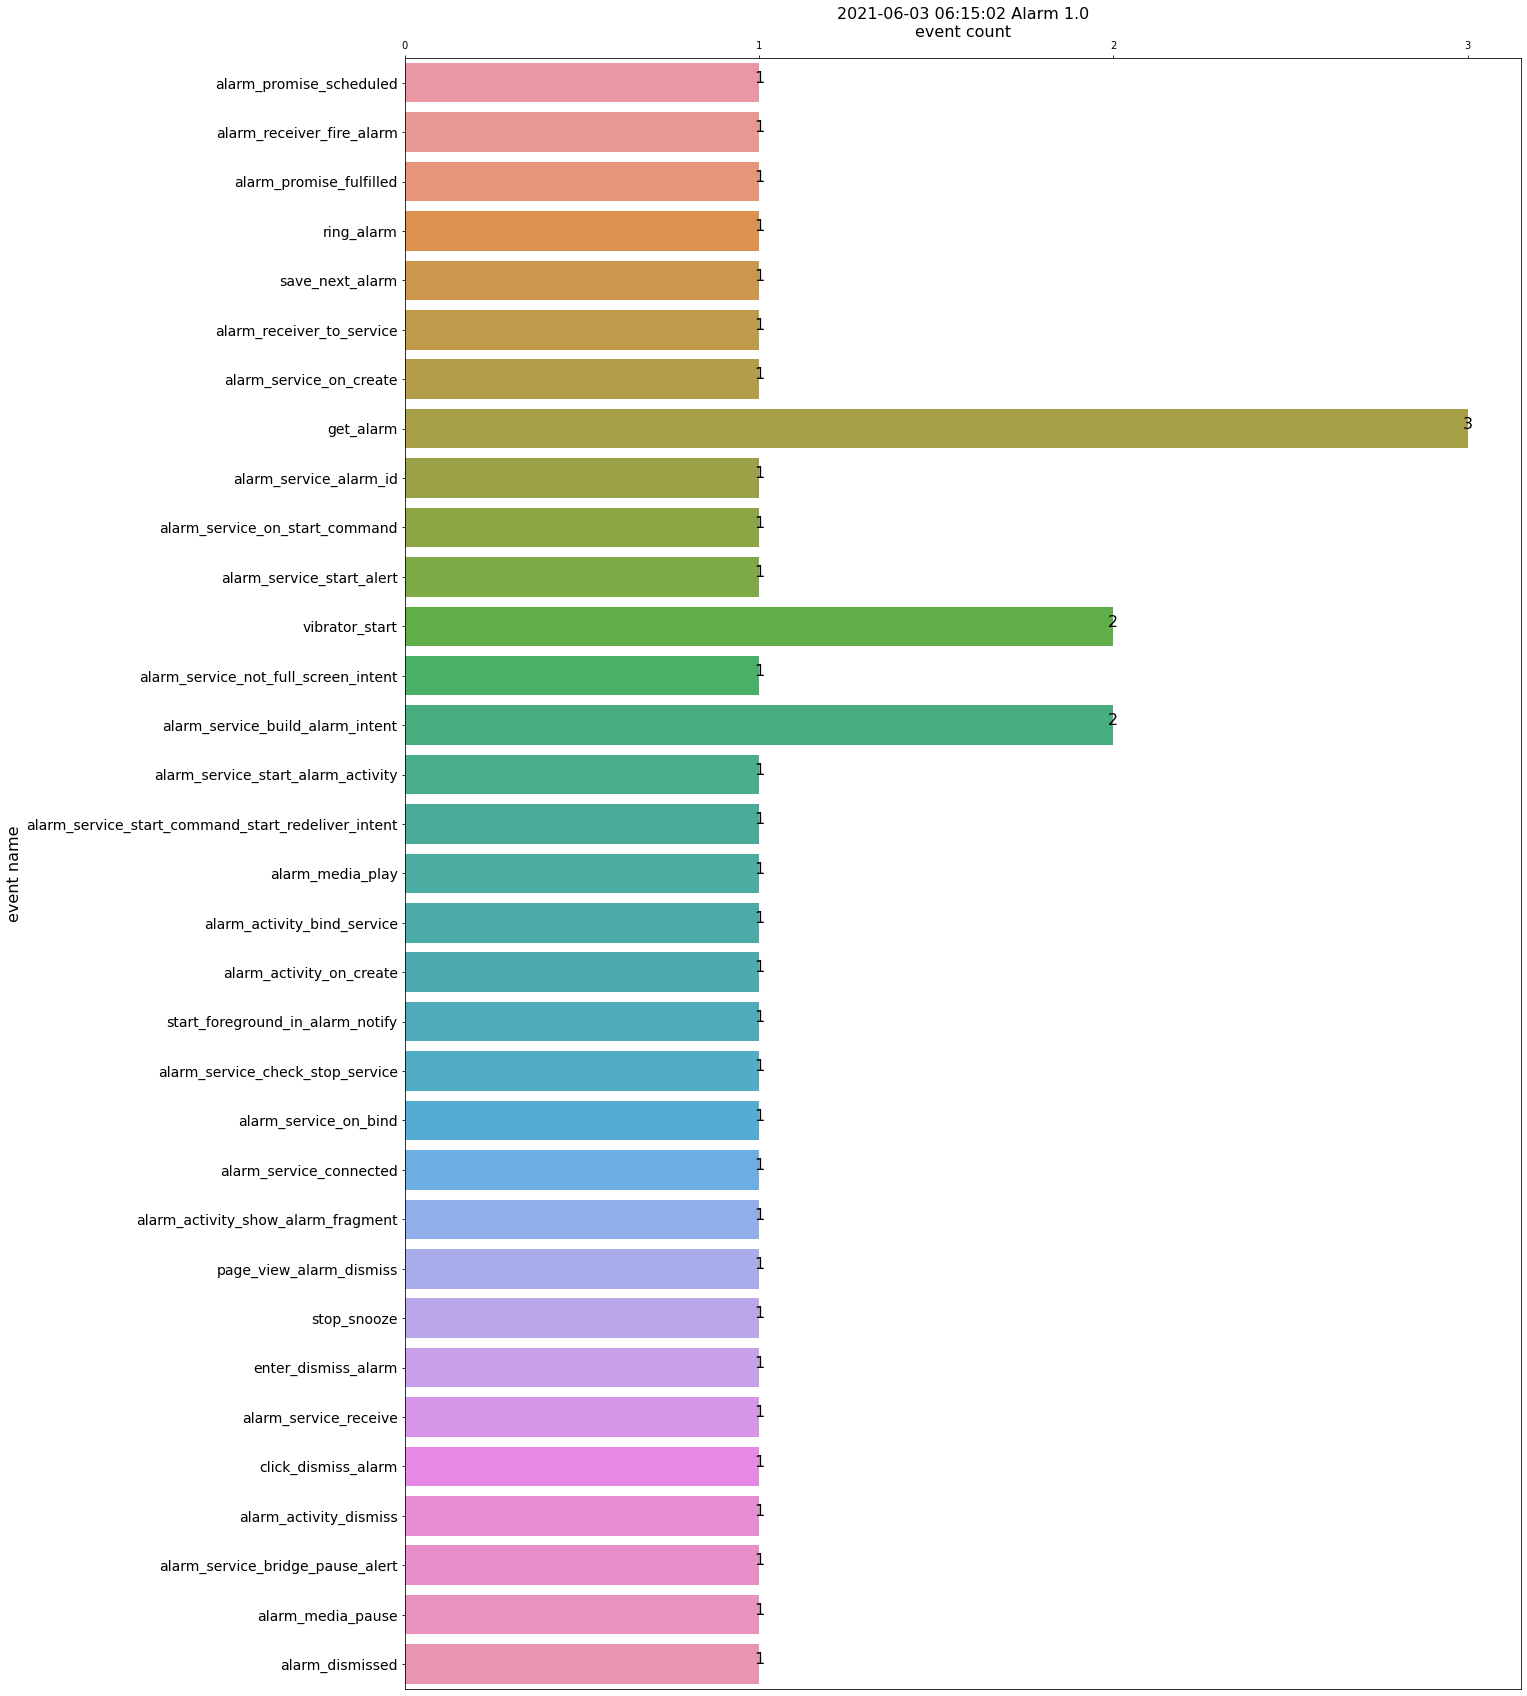

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 2514),
 ('alarm_promise_id', '03722b24-d920-476a-b28a-9f8c9b9592fa'),
 ('alarm_time', 1622721900000),
 ('alarm_time_formatted', '2021-06-03 07:05:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622721907778),
 ('fire_timestamp', 1622808300000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 7),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('i

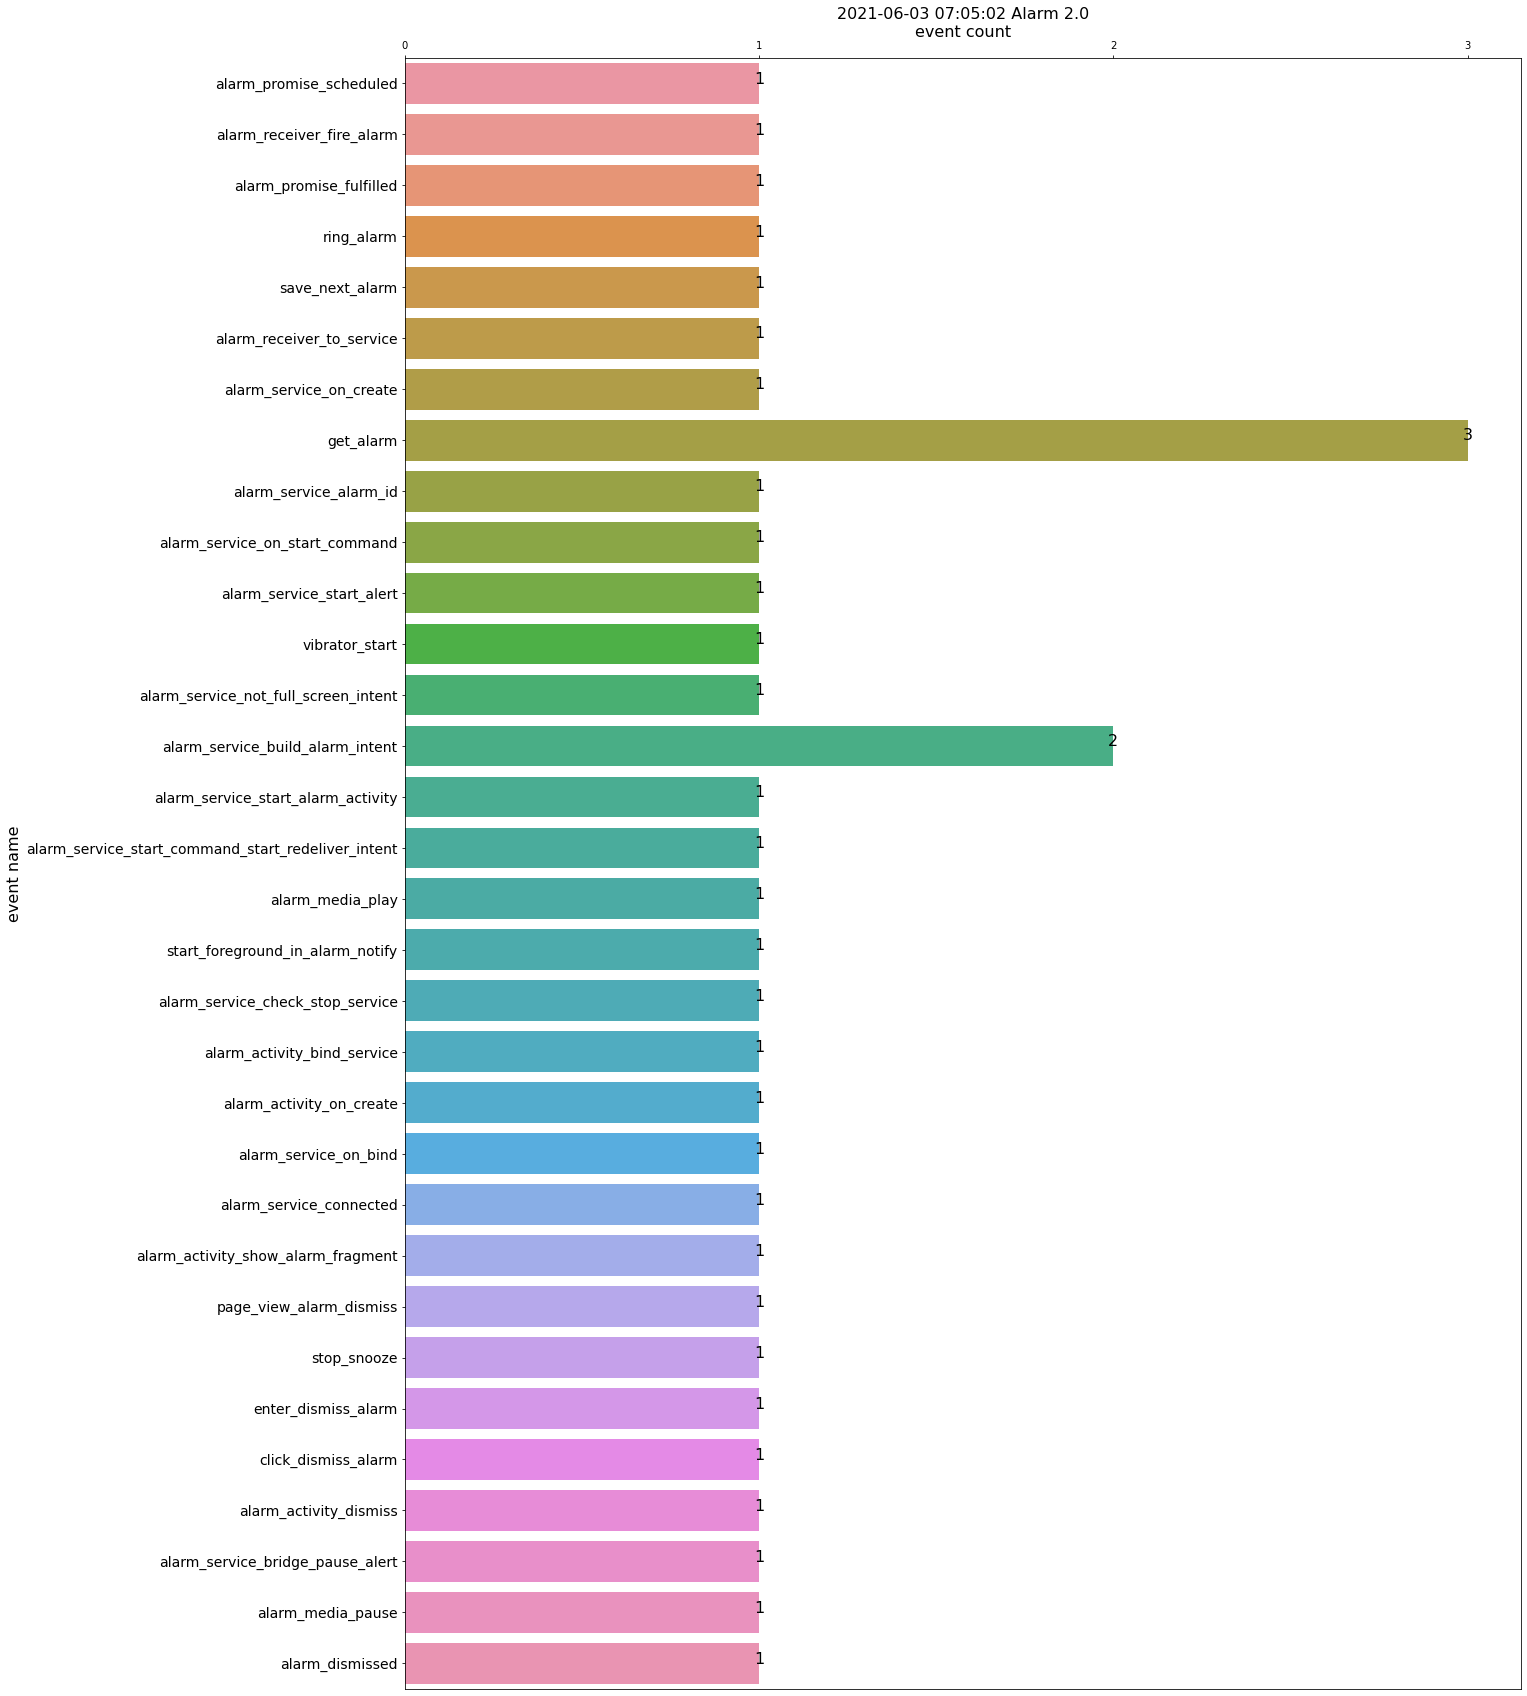

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_11'),
 ('alarm_offset_time', 3305),
 ('alarm_promise_id', '29fc8450-3e49-4974-bc9f-e9c23dceb686'),
 ('alarm_time', 1622842500000),
 ('alarm_time_formatted', '2021-06-04 16:35:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622842509435),
 ('fire_timestamp', 1623447300000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 16),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 (

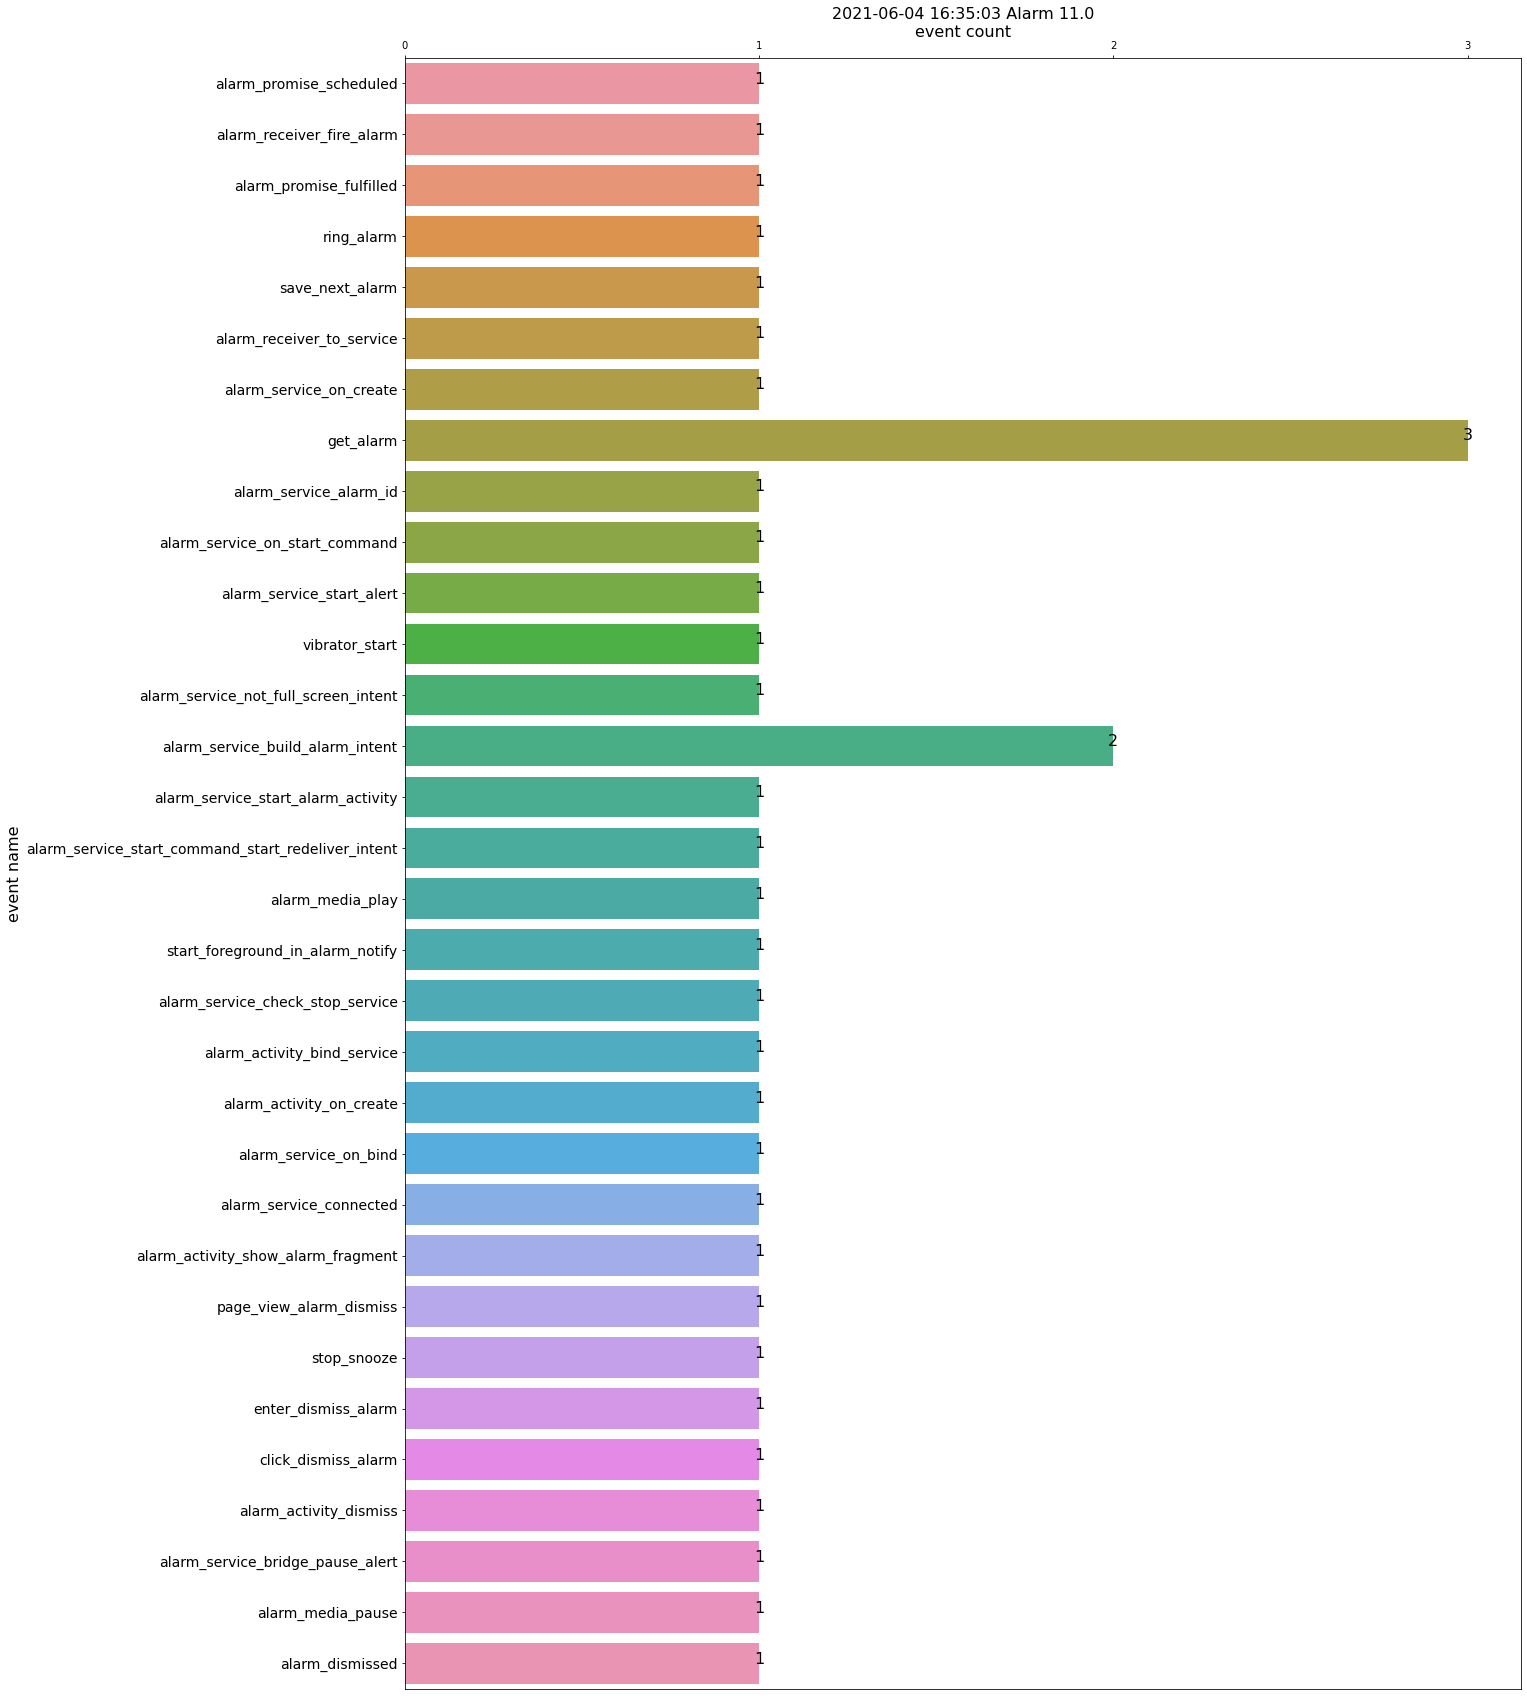

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_7'),
 ('alarm_offset_time', 3138),
 ('alarm_promise_id', '22bf043b-f95b-4d42-b28f-e57cb1a6f8ed'),
 ('alarm_time', 1622850060000),
 ('alarm_time_formatted', '2021-06-04 18:41:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622850078651),
 ('fire_timestamp', 1623454860000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 18),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fals

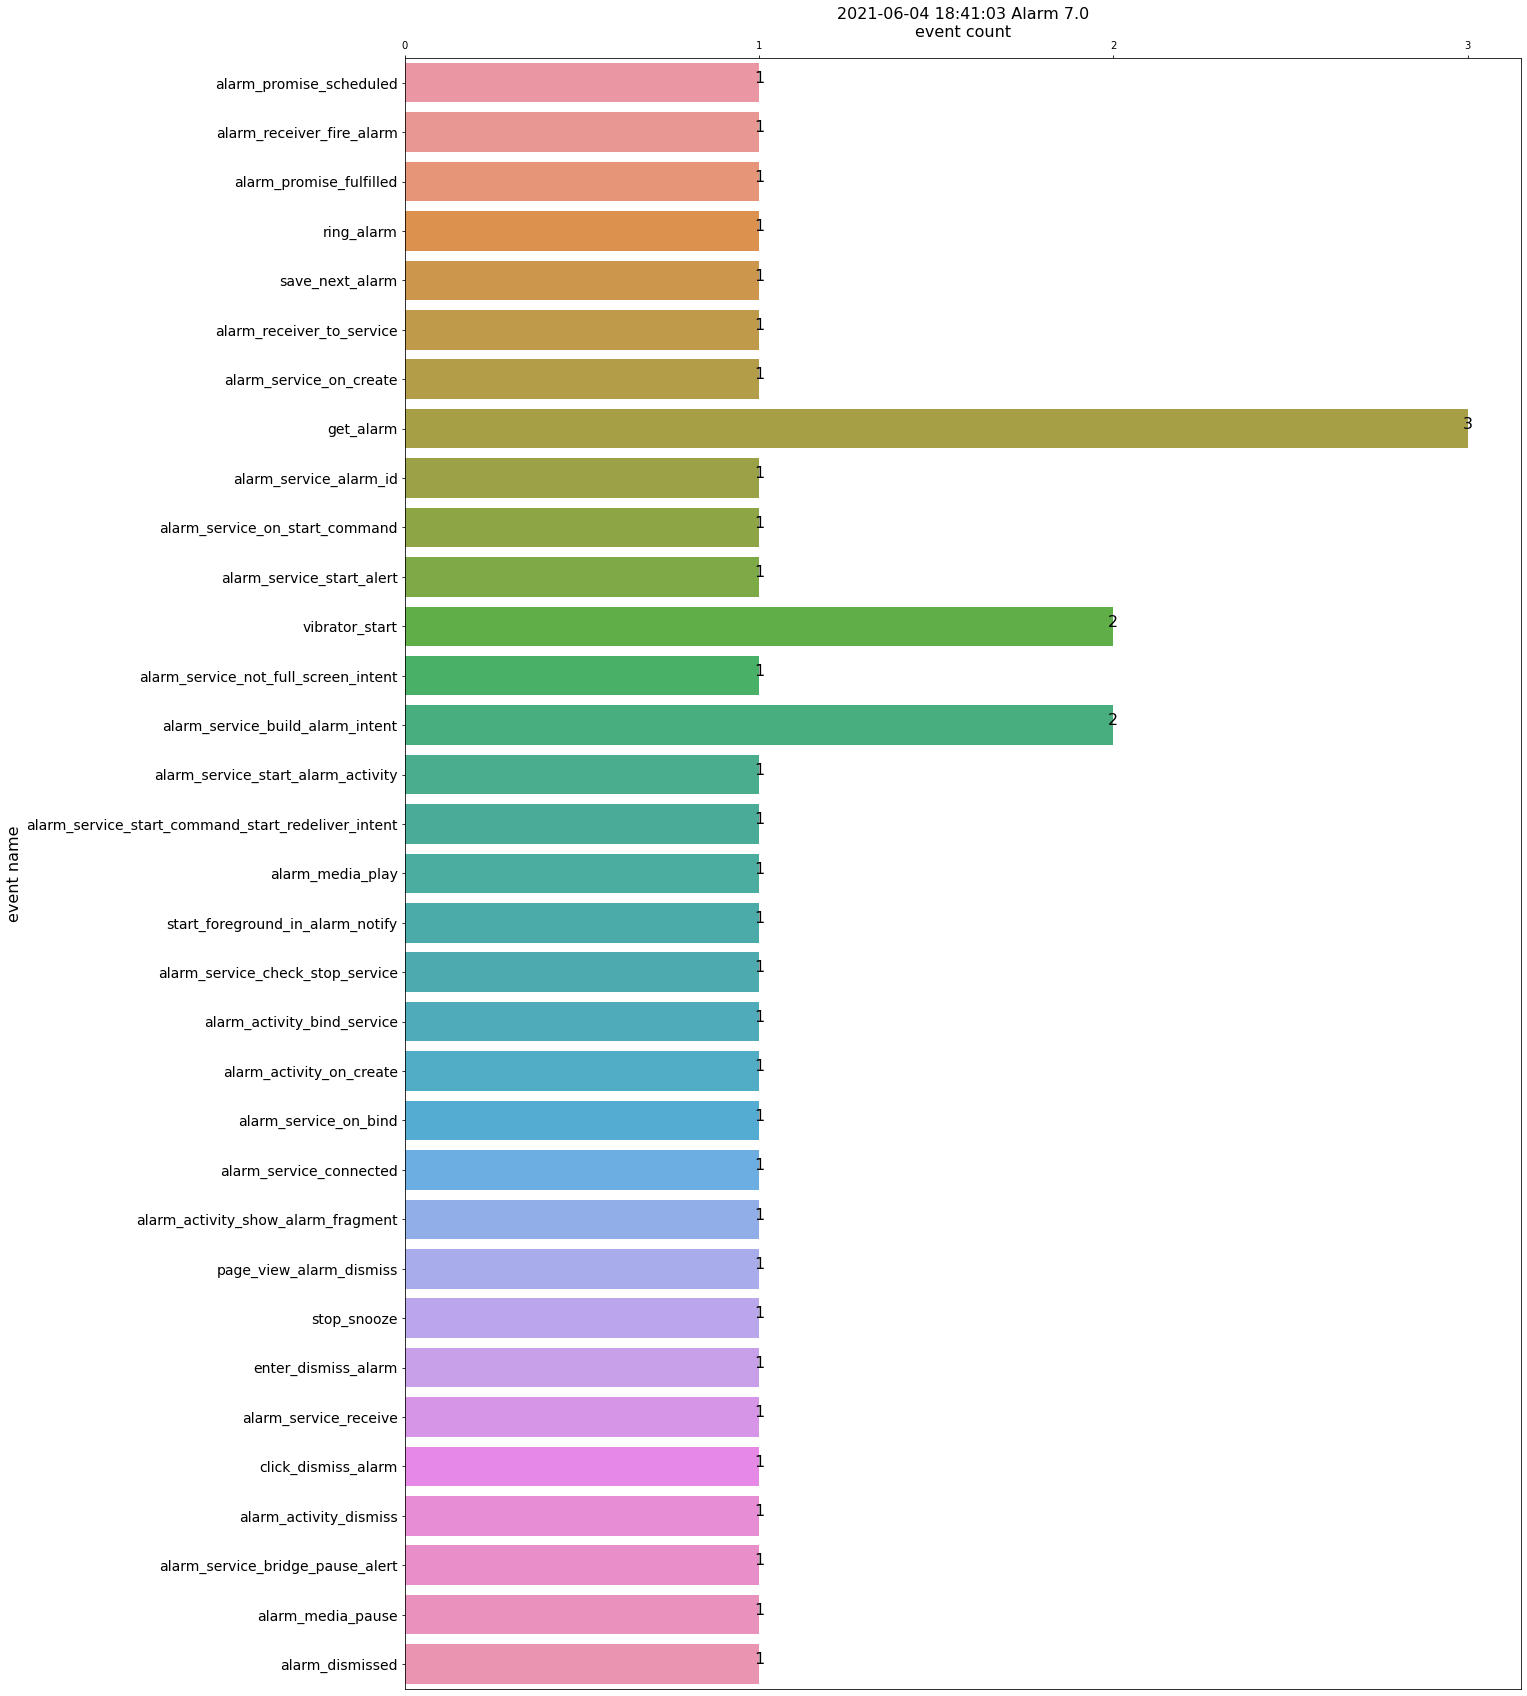

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_5'),
 ('alarm_offset_time', 1699),
 ('alarm_promise_id', 'd0af9f31-5a9e-403d-82f9-f8c5a23dceac'),
 ('alarm_time', 1622988900000),
 ('alarm_time_formatted', '2021-06-06 09:15:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1622988917211),
 ('fire_timestamp', 1623593700000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 9),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False

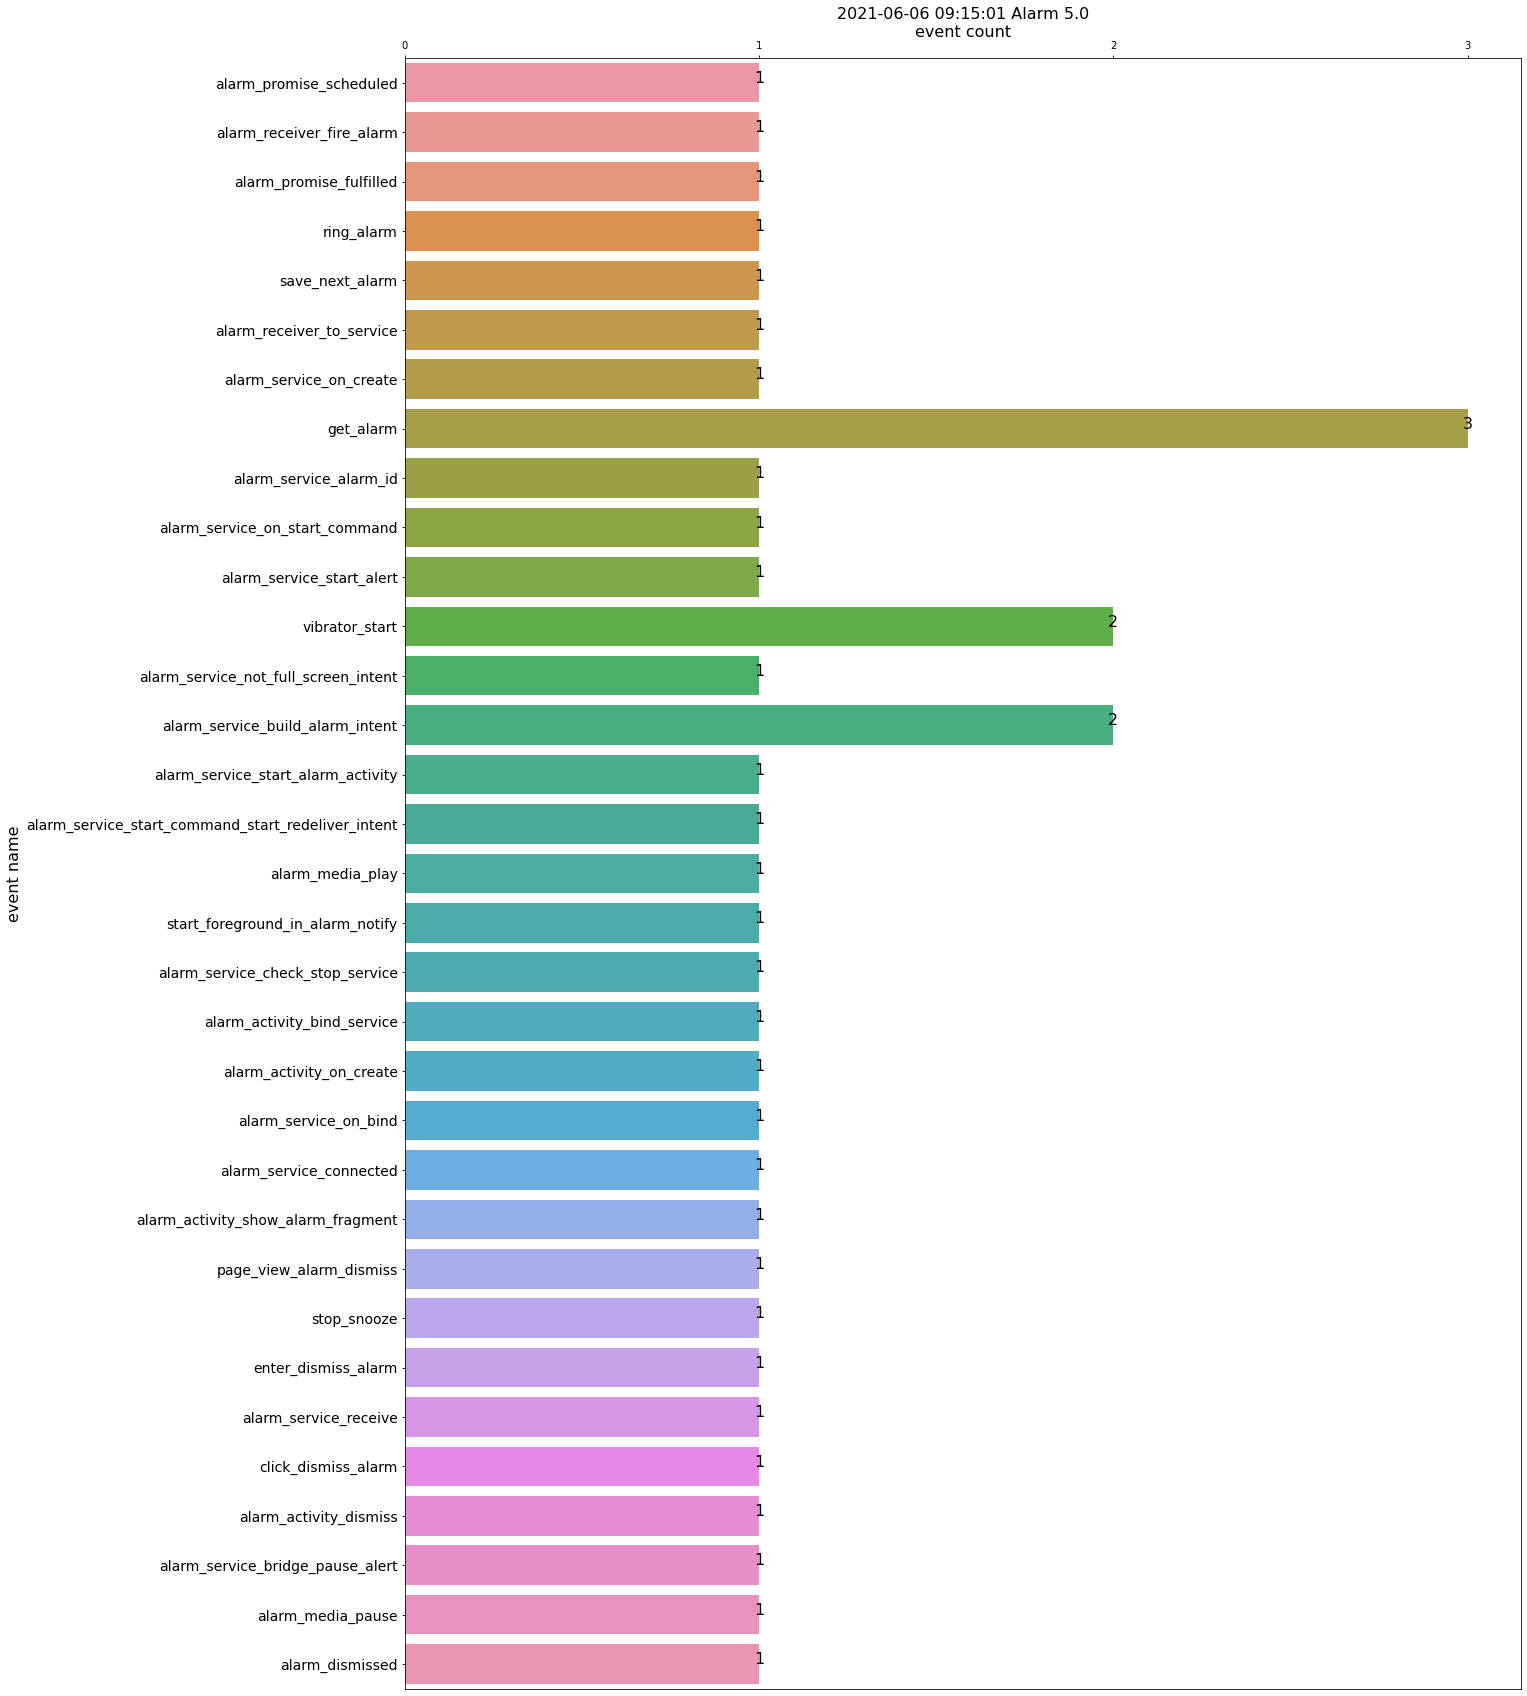

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 5494),
 ('alarm_promise_id', '1e8a01be-5631-40e9-ac60-0d98ad881900'),
 ('alarm_time', 1623067260000),
 ('alarm_time_formatted', '2021-06-07 07:01:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1623067270994),
 ('fire_timestamp', 1623153660000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 7),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

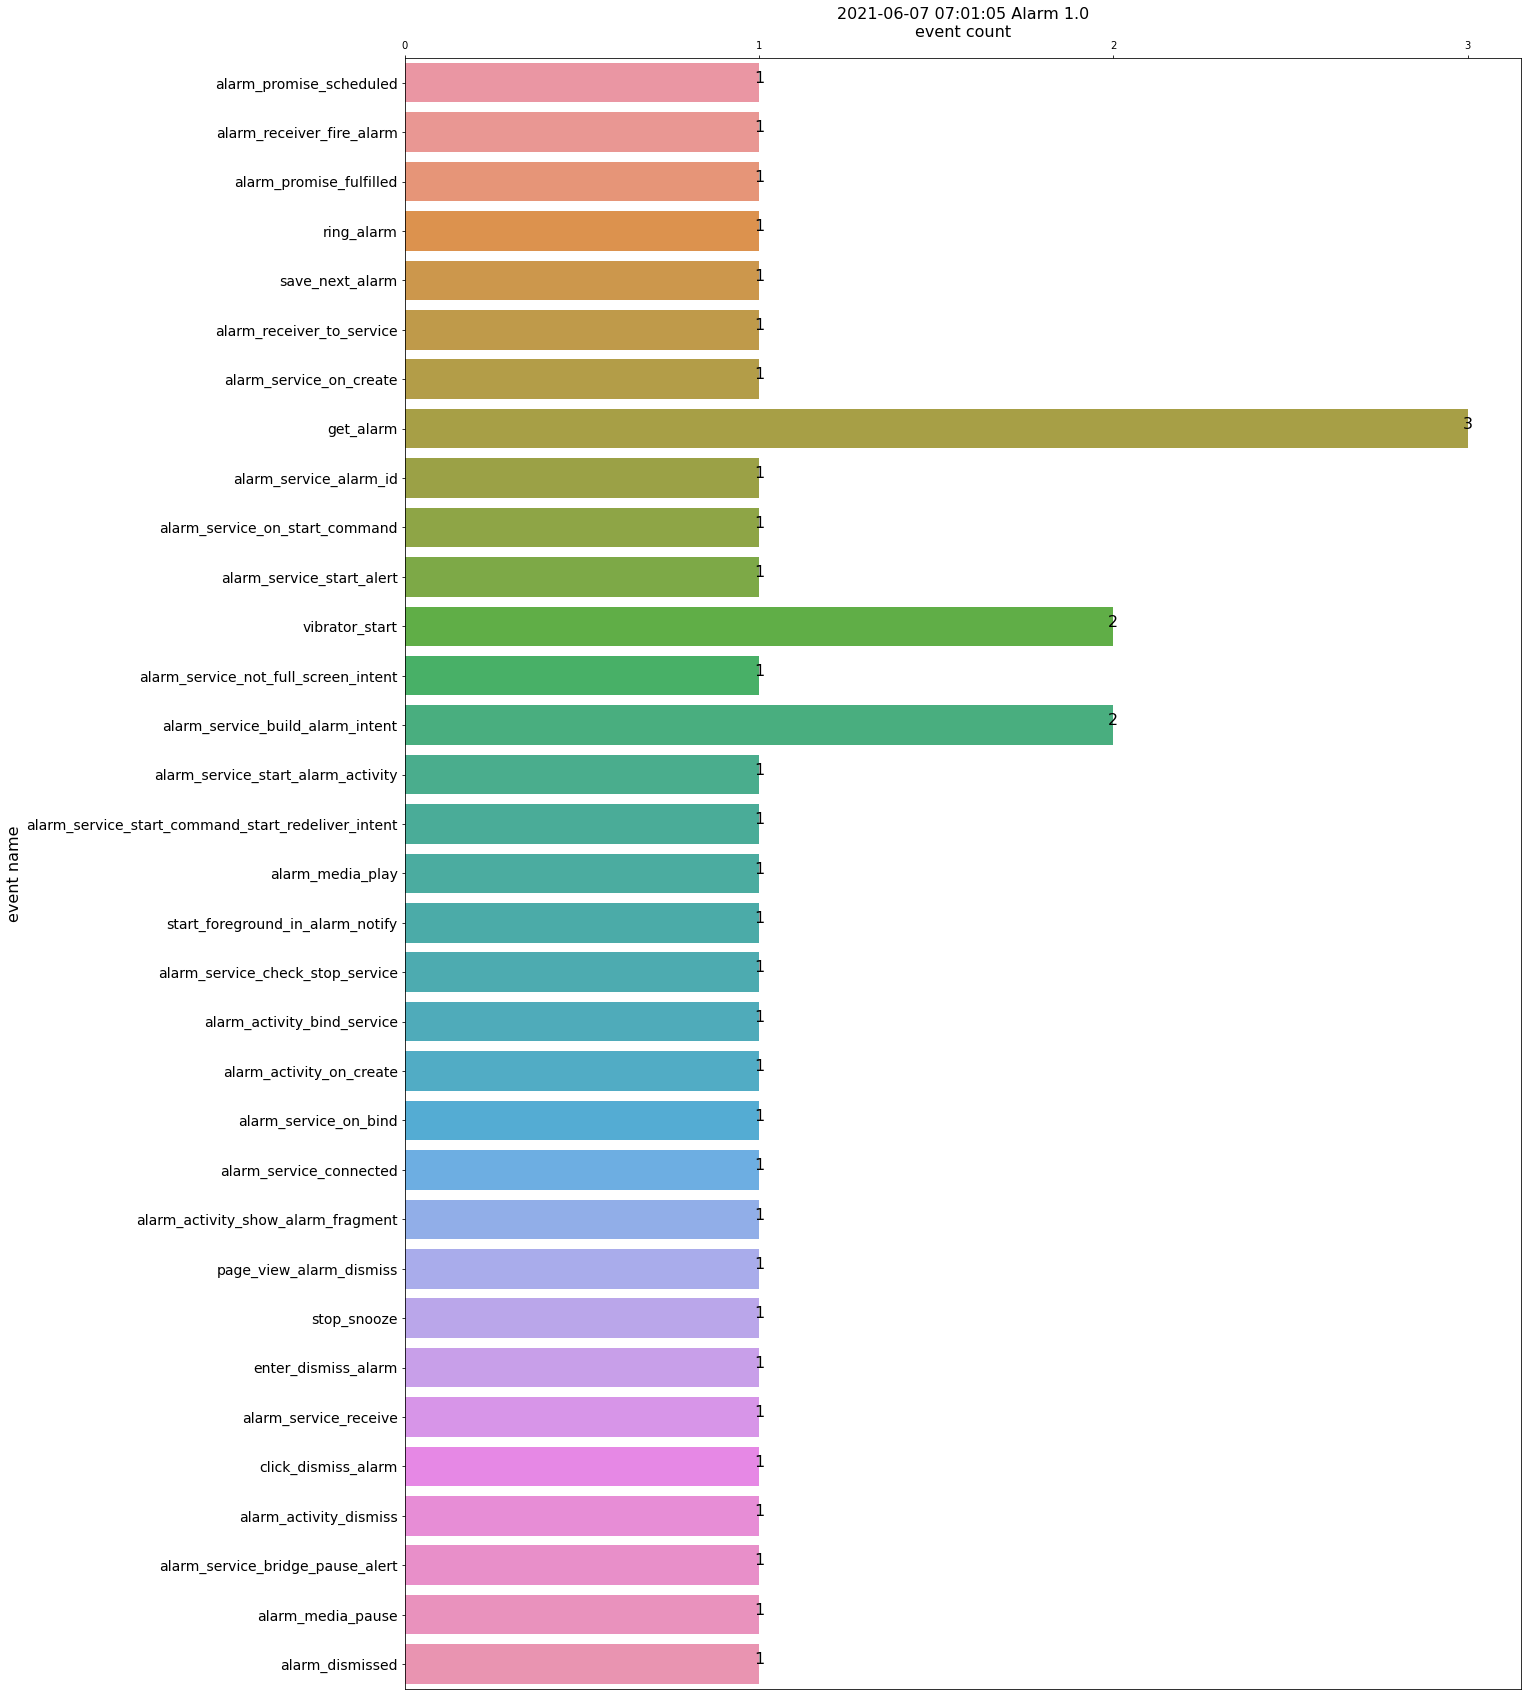

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 2307),
 ('alarm_promise_id', '0af476e0-9da4-4173-ba6c-93f526ef39ca'),
 ('alarm_time', 1623069300000),
 ('alarm_time_formatted', '2021-06-07 07:35:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1623069308554),
 ('fire_timestamp', 1623155700000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 7),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('i

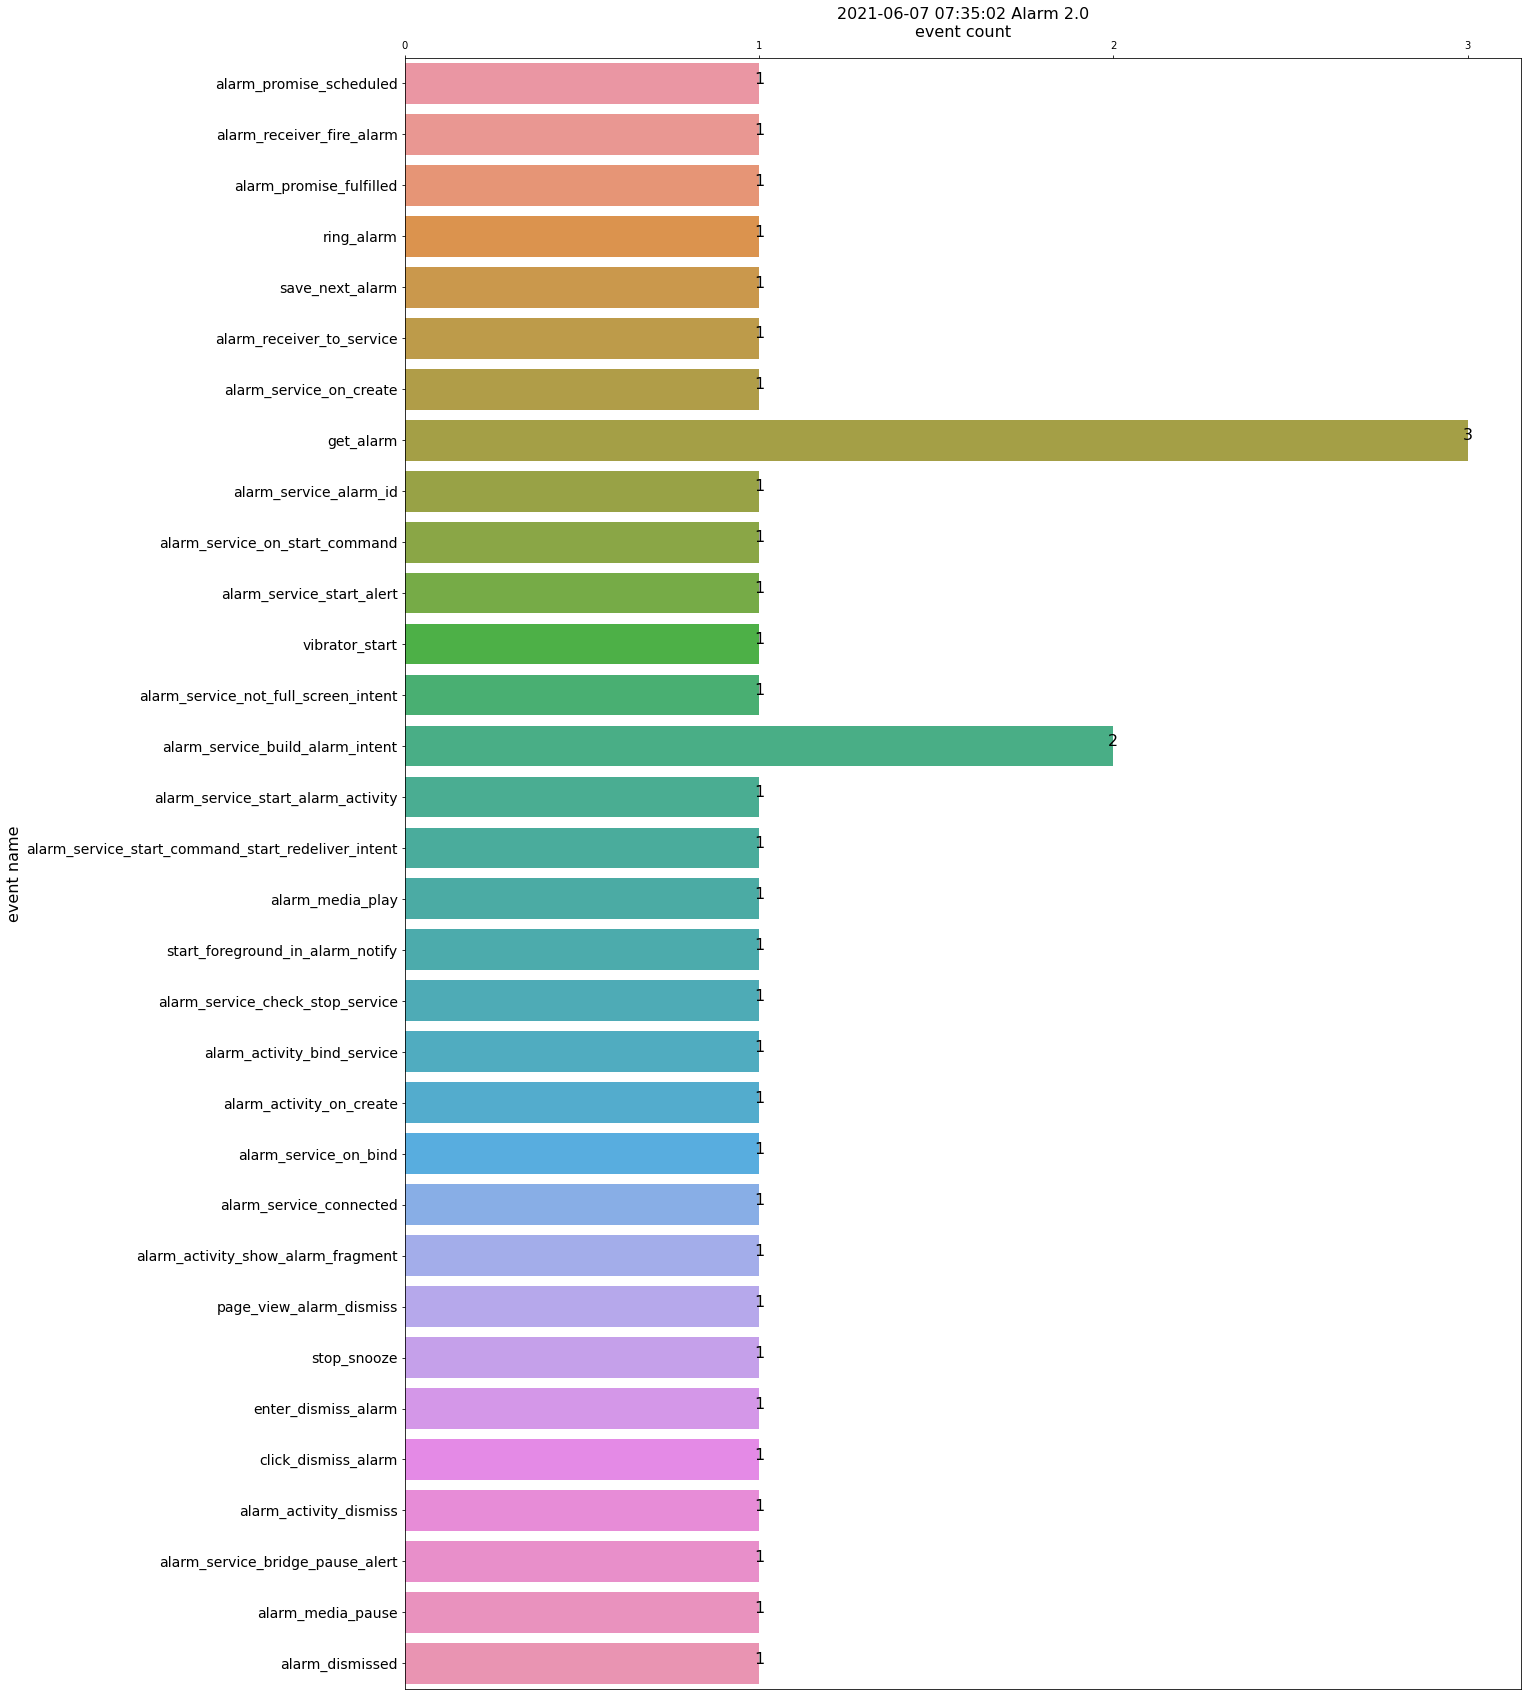

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'sweet home alabama'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1471'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_4'),
 ('alarm_offset_time', 2830),
 ('alarm_promise_id', '5173b5af-9eb4-4ad0-a120-48290c5500db'),
 ('alarm_time', 1623086100000),
 ('alarm_time_formatted', '2021-06-07 12:15:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1623086117479),
 ('fire_timestamp', 1623172500000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 12),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random

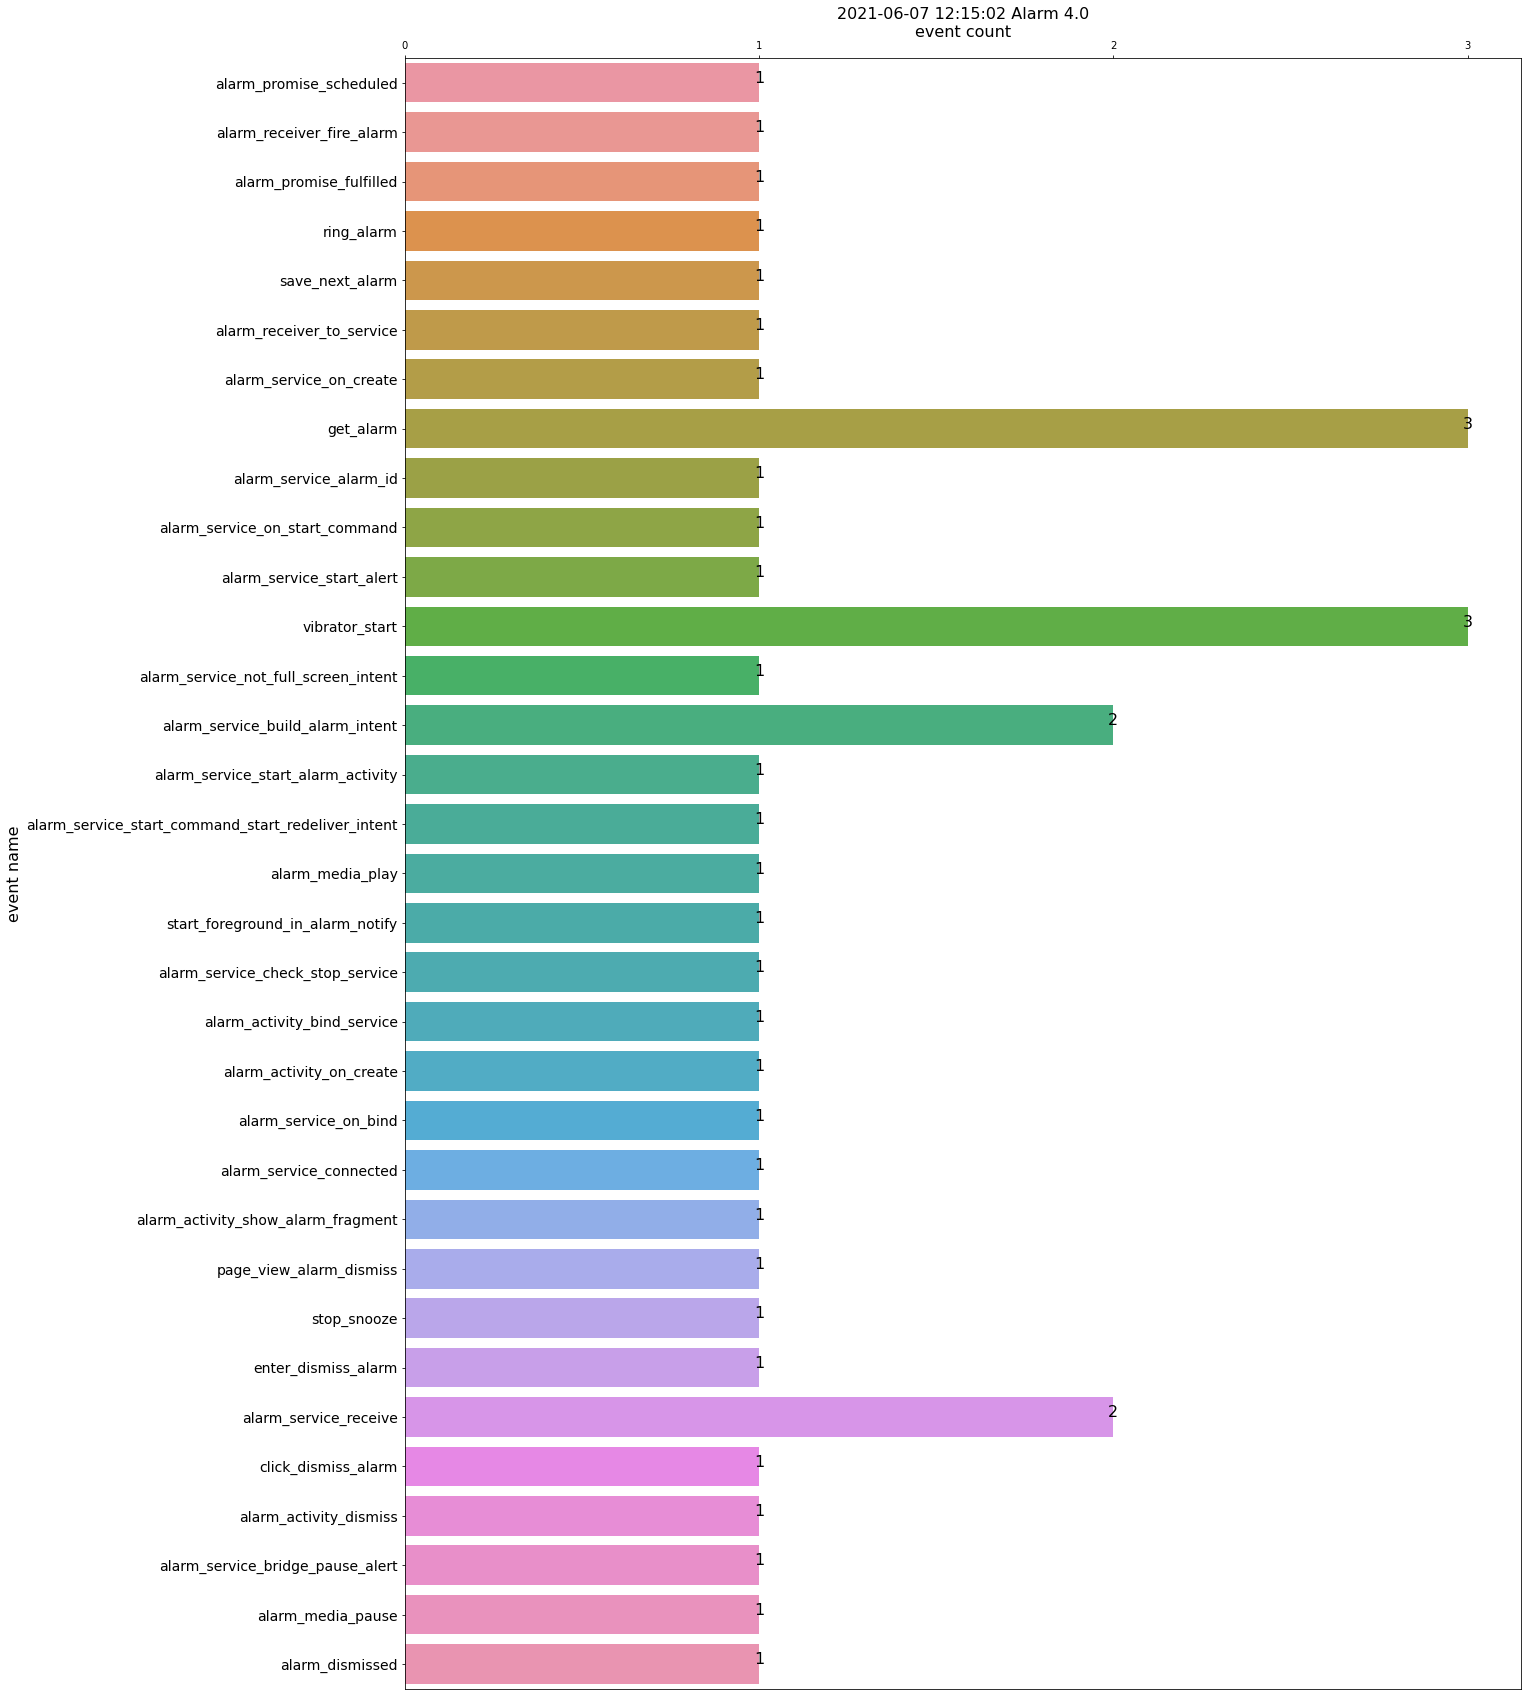

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_12'),
 ('alarm_offset_time', 146),
 ('alarm_promise_id', 'ad4021a5-7fd4-41ec-bb2c-74d5b6b6d866'),
 ('alarm_time', 1623118140000),
 ('alarm_time_formatted', '2021-06-07 21:09:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 77),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1623118146736),
 ('fire_timestamp', 1623204540000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 21),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', True),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('

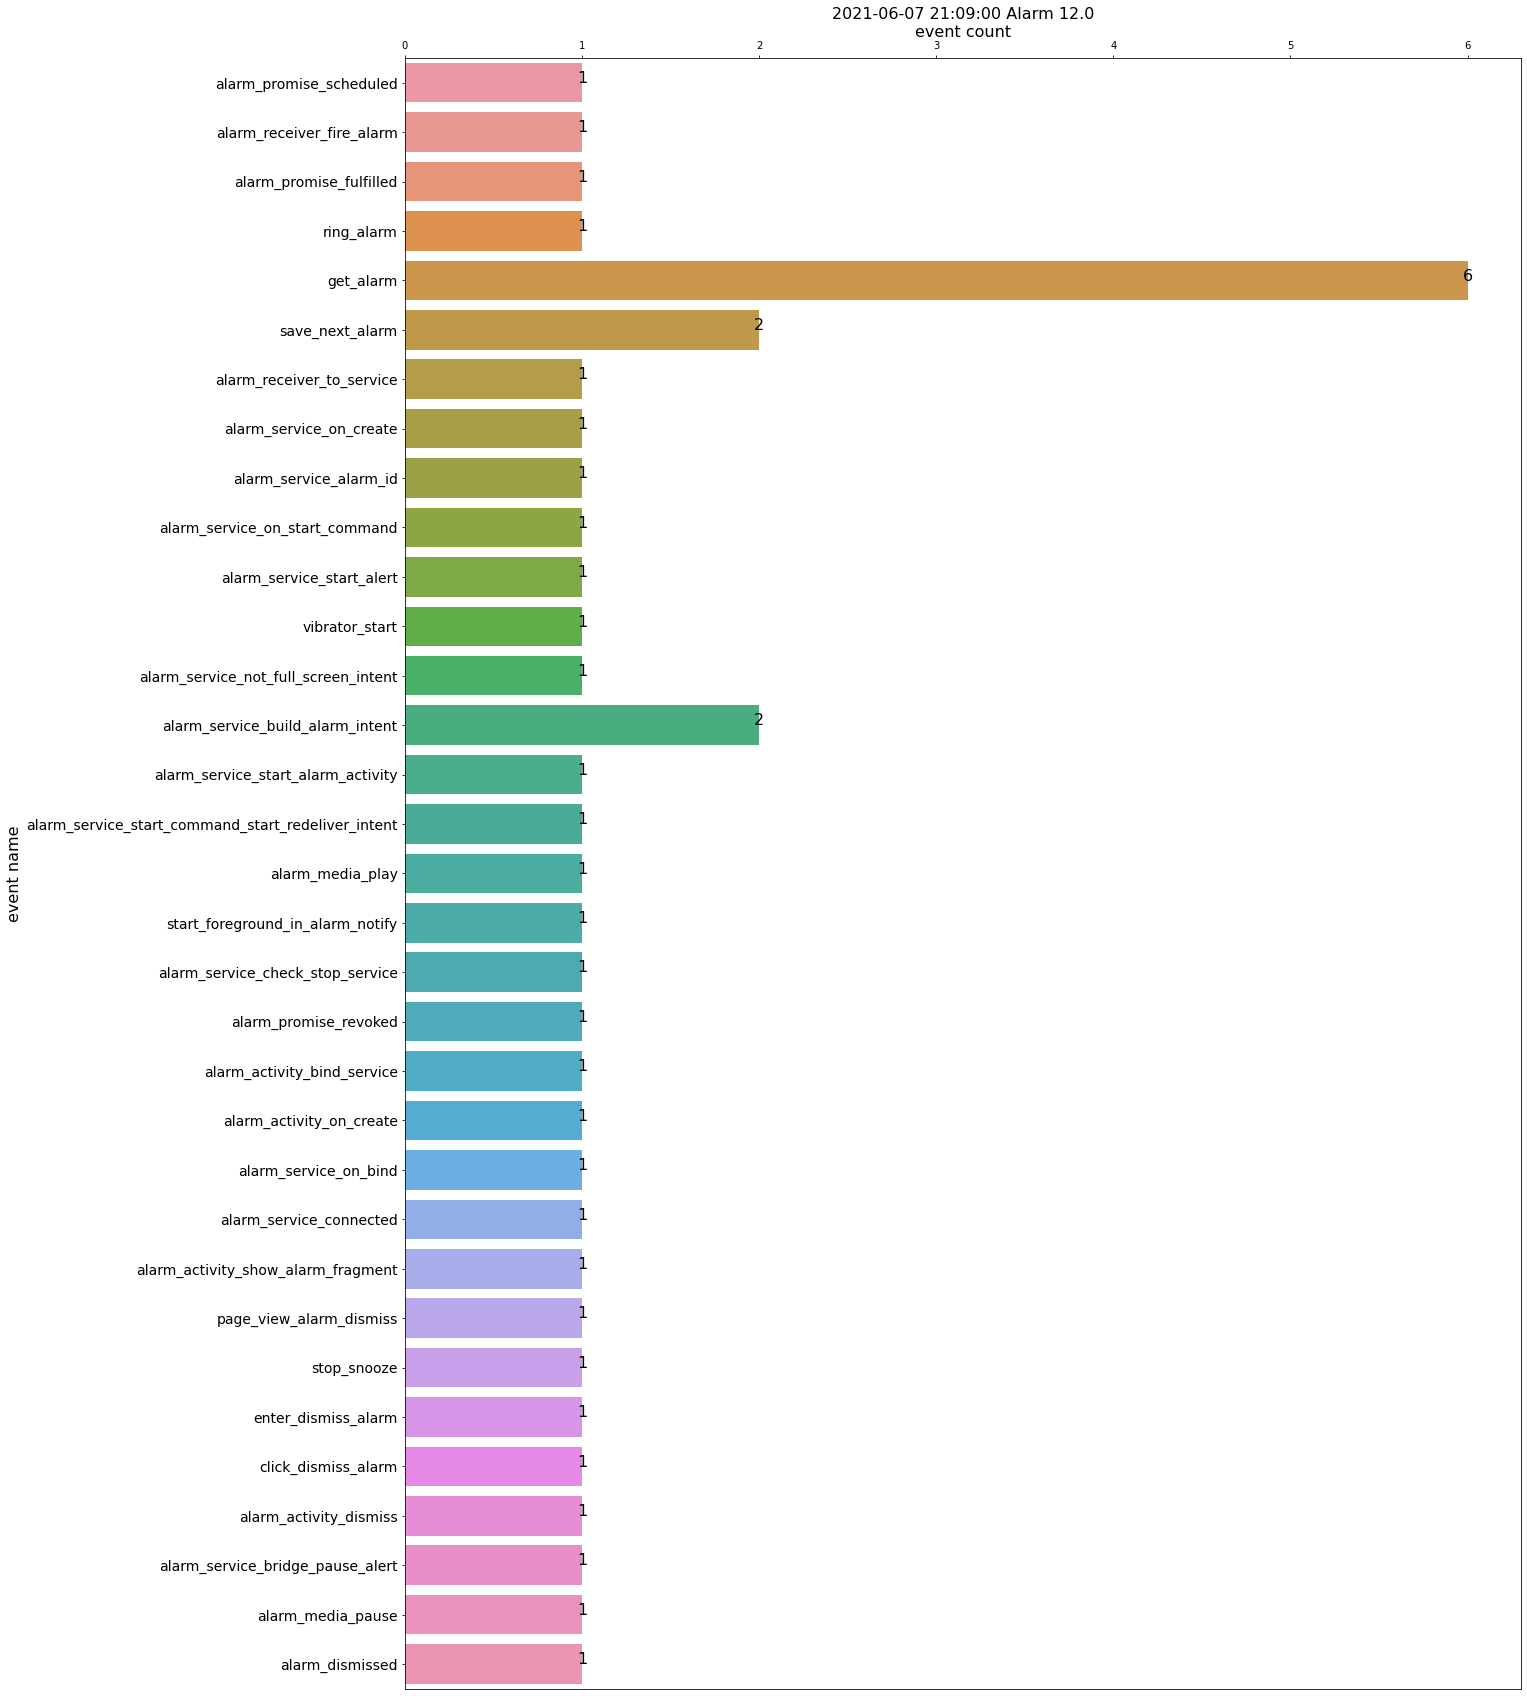

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_12'),
 ('alarm_offset_time', 1365),
 ('alarm_promise_id', '016bf5f9-51e7-4d3f-8265-a988745e6bc5'),
 ('alarm_time', 1623118740000),
 ('alarm_time_formatted', '2021-06-07 21:19:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 77),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1623118776664),
 ('fire_timestamp', 1623205140000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 21),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', True),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 (

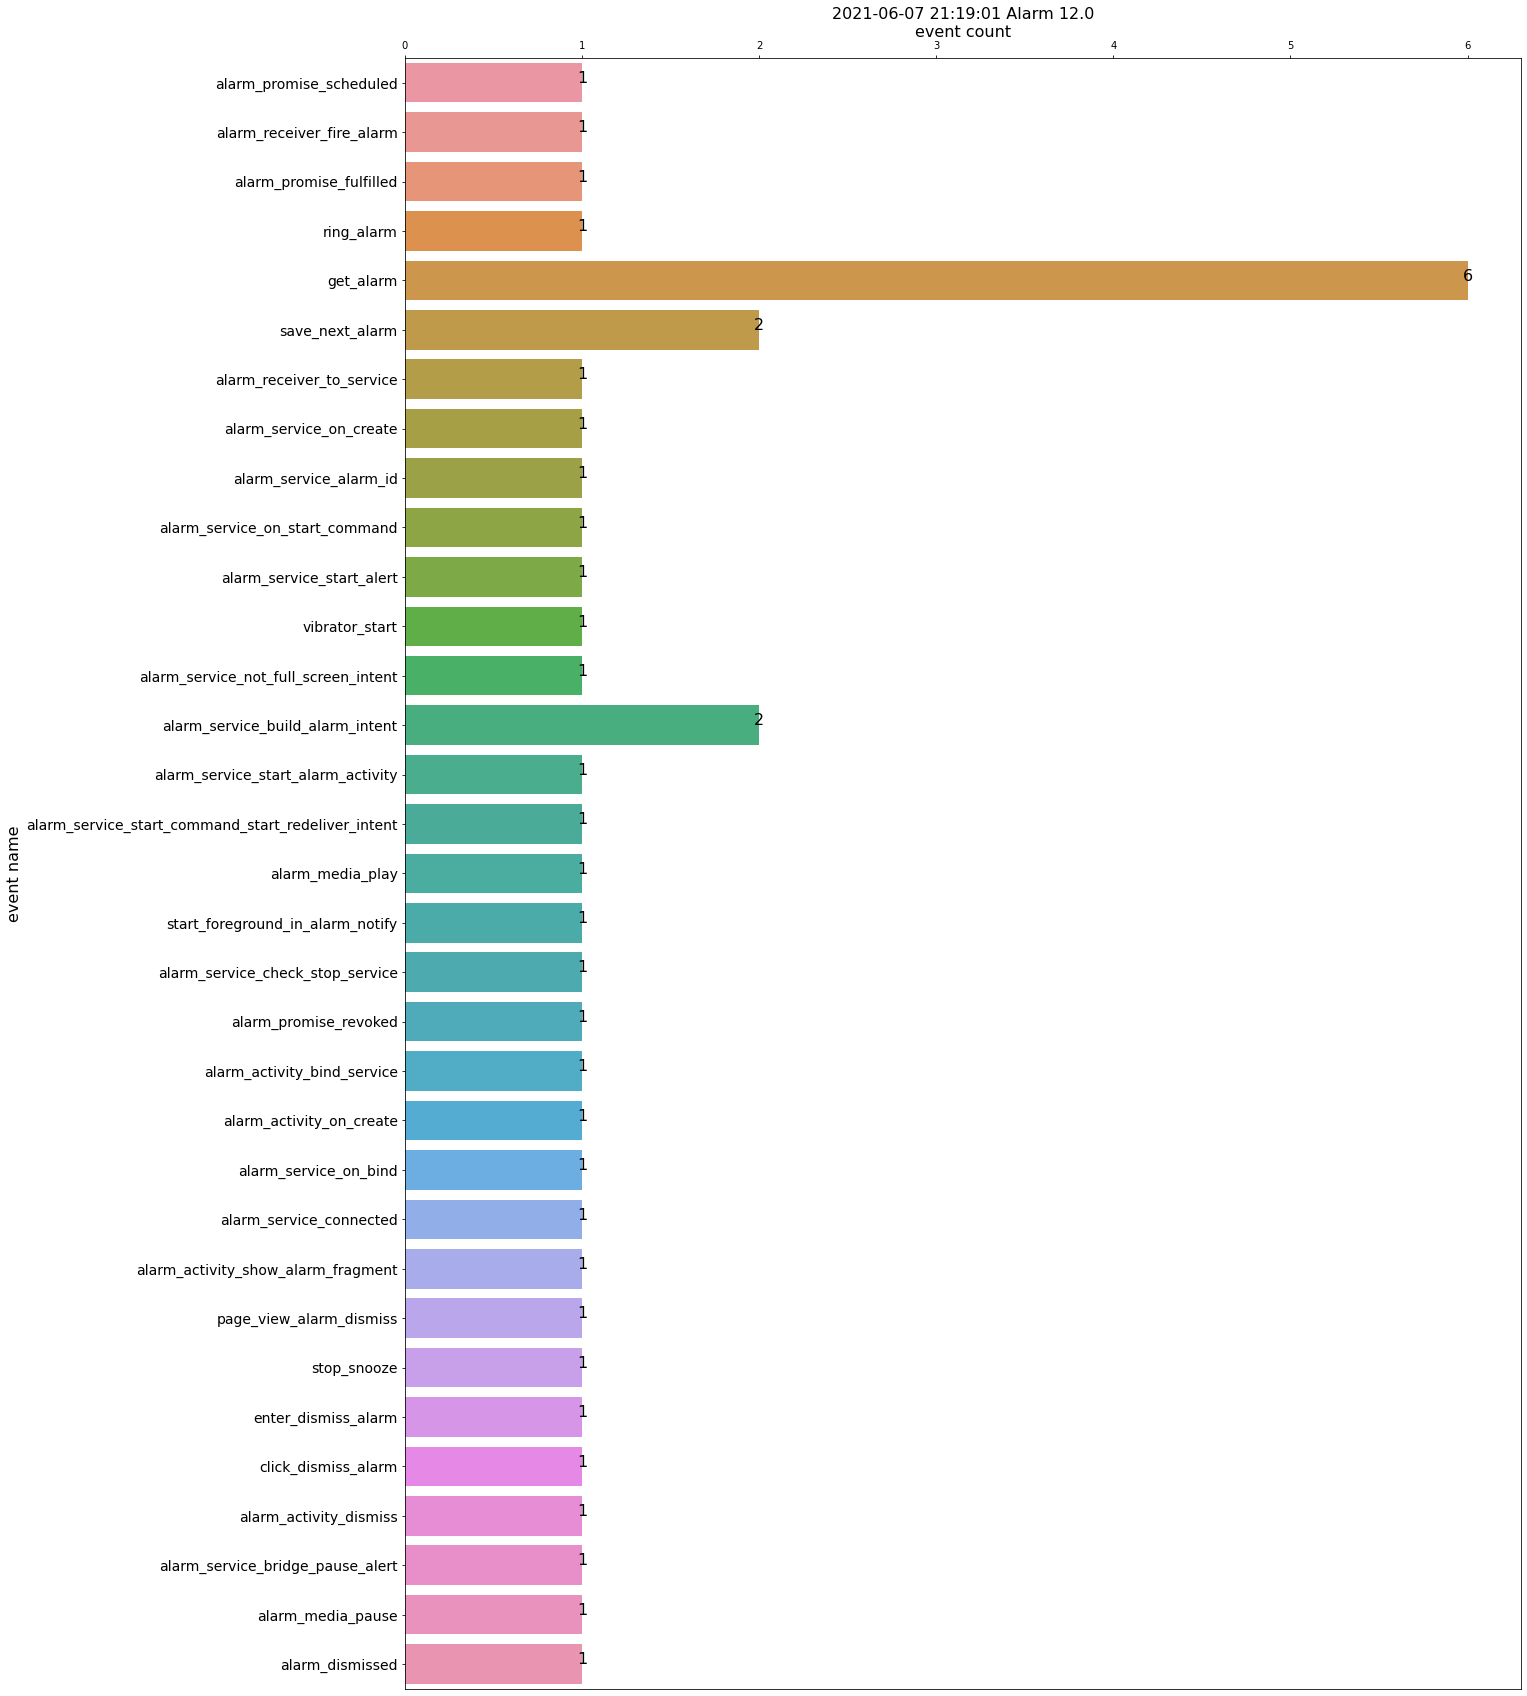

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 3088),
 ('alarm_promise_id', '7a2d43e1-f776-48bb-bc9e-dd245020b922'),
 ('alarm_time', 1623153660000),
 ('alarm_time_formatted', '2021-06-08 07:01:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1623153677438),
 ('fire_timestamp', 1623240060000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 7),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

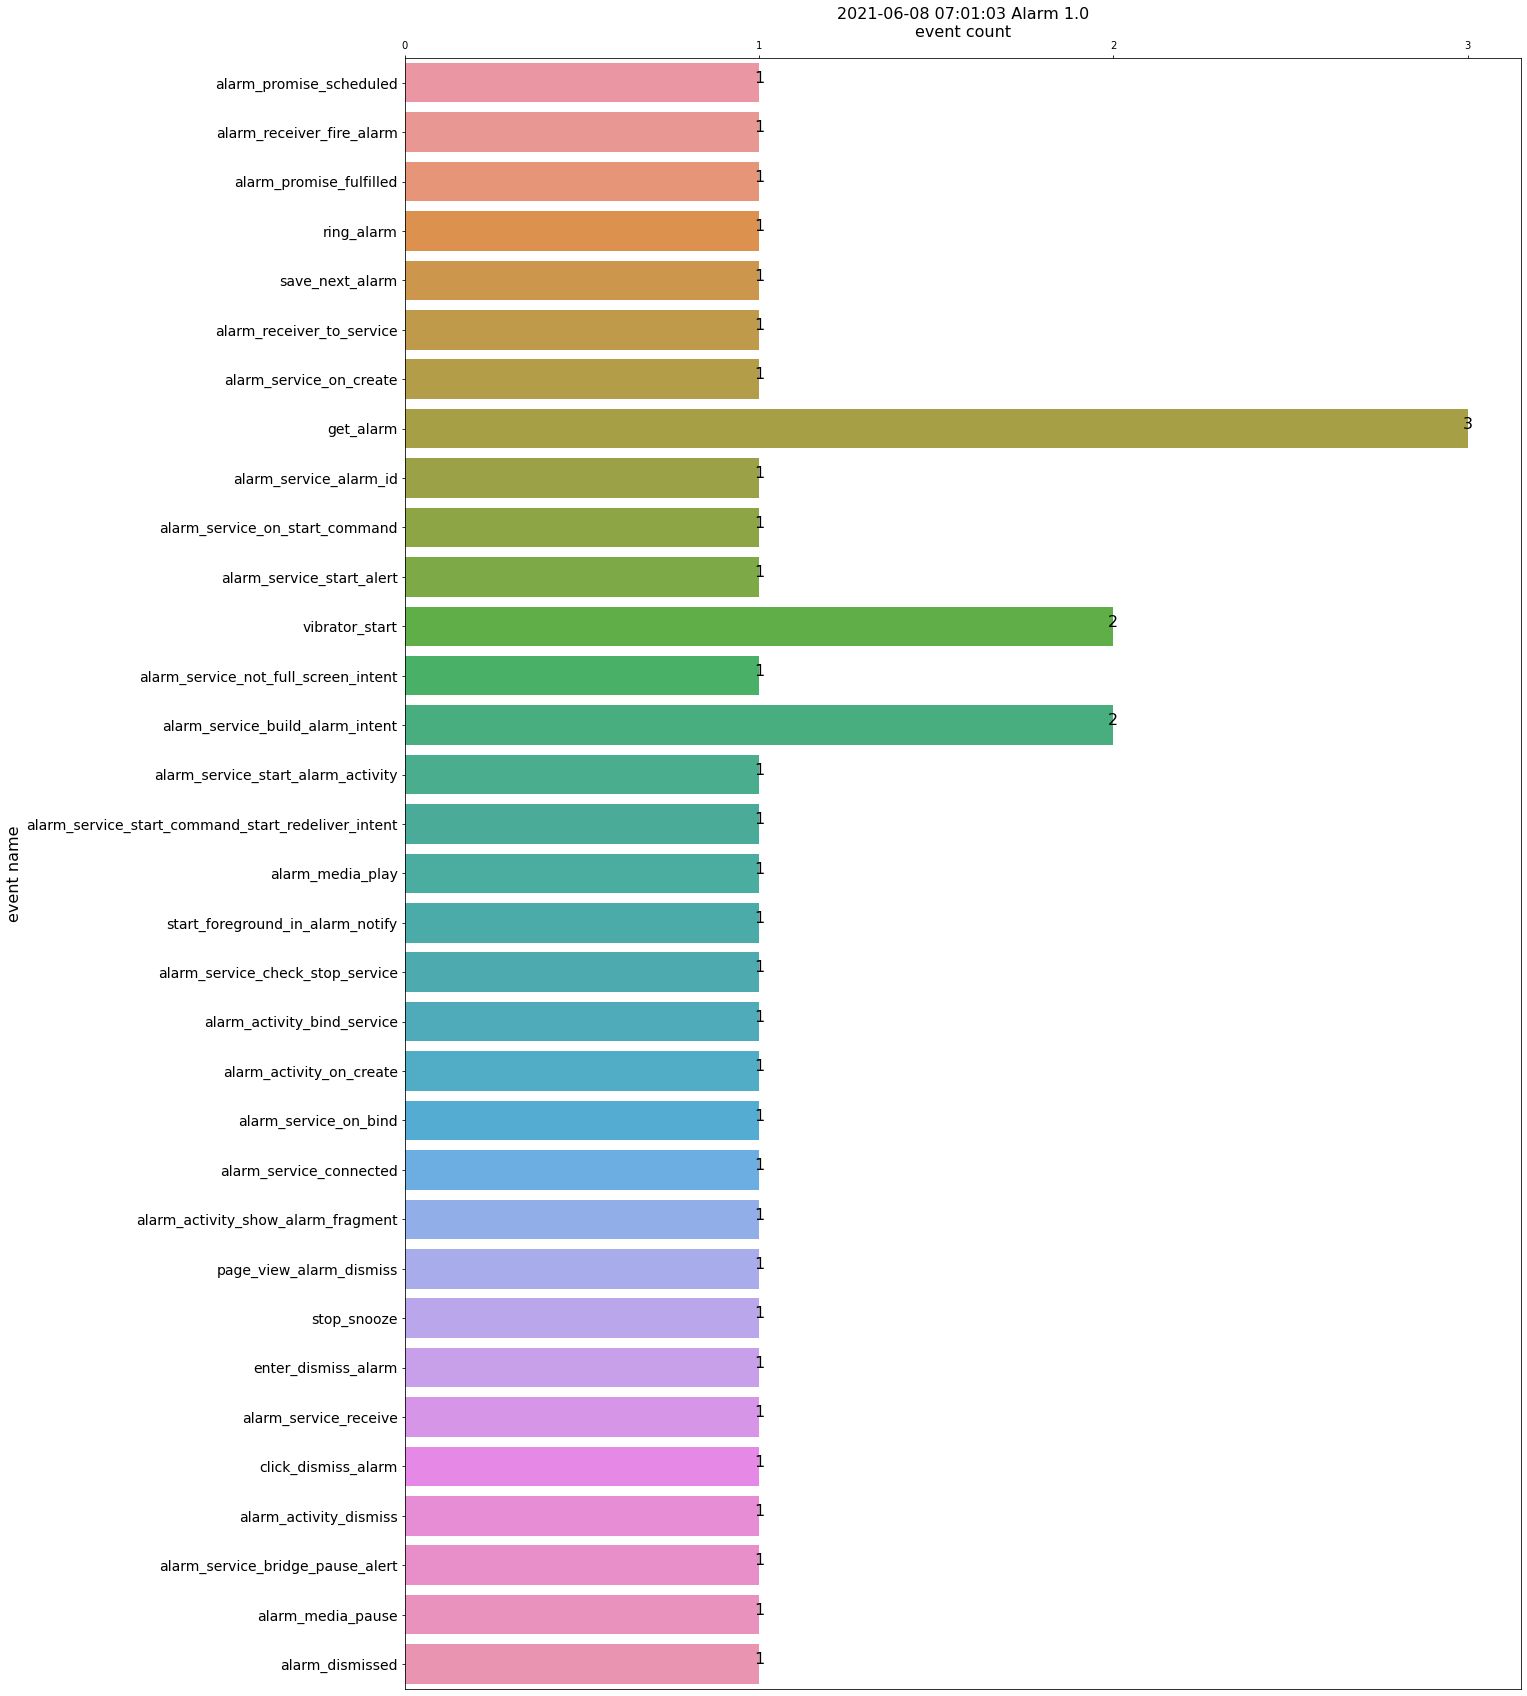

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_2'),
 ('alarm_offset_time', 1873),
 ('alarm_promise_id', '0f95162b-2e45-4491-b150-3a1e206e2f1a'),
 ('alarm_time', 1623155700000),
 ('alarm_time_formatted', '2021-06-08 07:35:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1623155708682),
 ('fire_timestamp', 1623242100000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 7),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', False),
 ('i

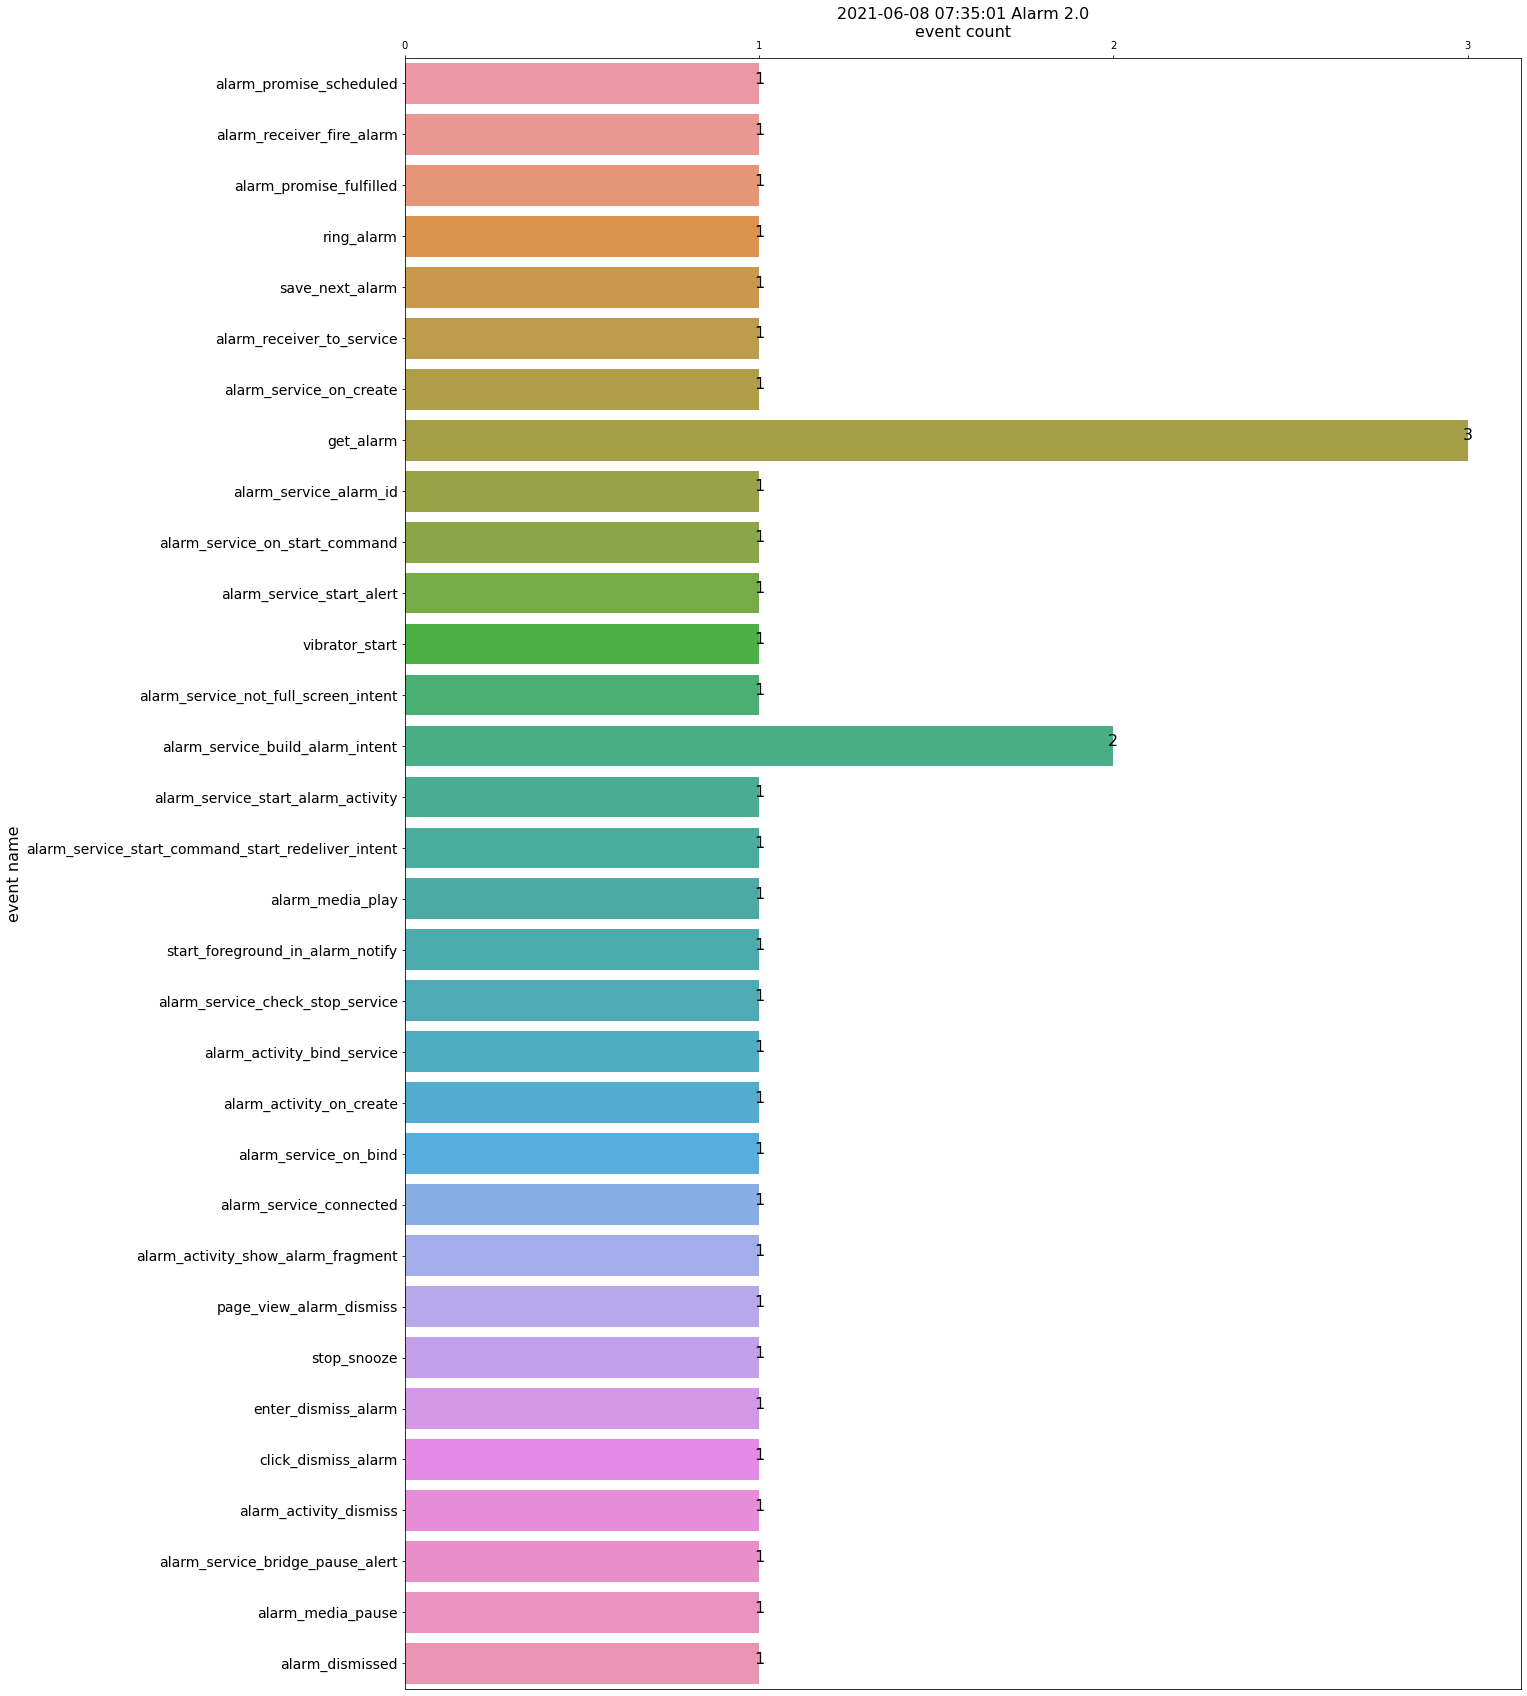

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('alarm_alert_title', 'sweet home alabama'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1471'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_4'),
 ('alarm_offset_time', 3143),
 ('alarm_promise_id', '8629f67f-4764-42ce-b81c-557416dc58af'),
 ('alarm_time', 1623172500000),
 ('alarm_time_formatted', '2021-06-08 12:15:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1623172508252),
 ('fire_timestamp', 1623258900000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 12),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', False),
 ('is_started_by_wake_up_check', Fals

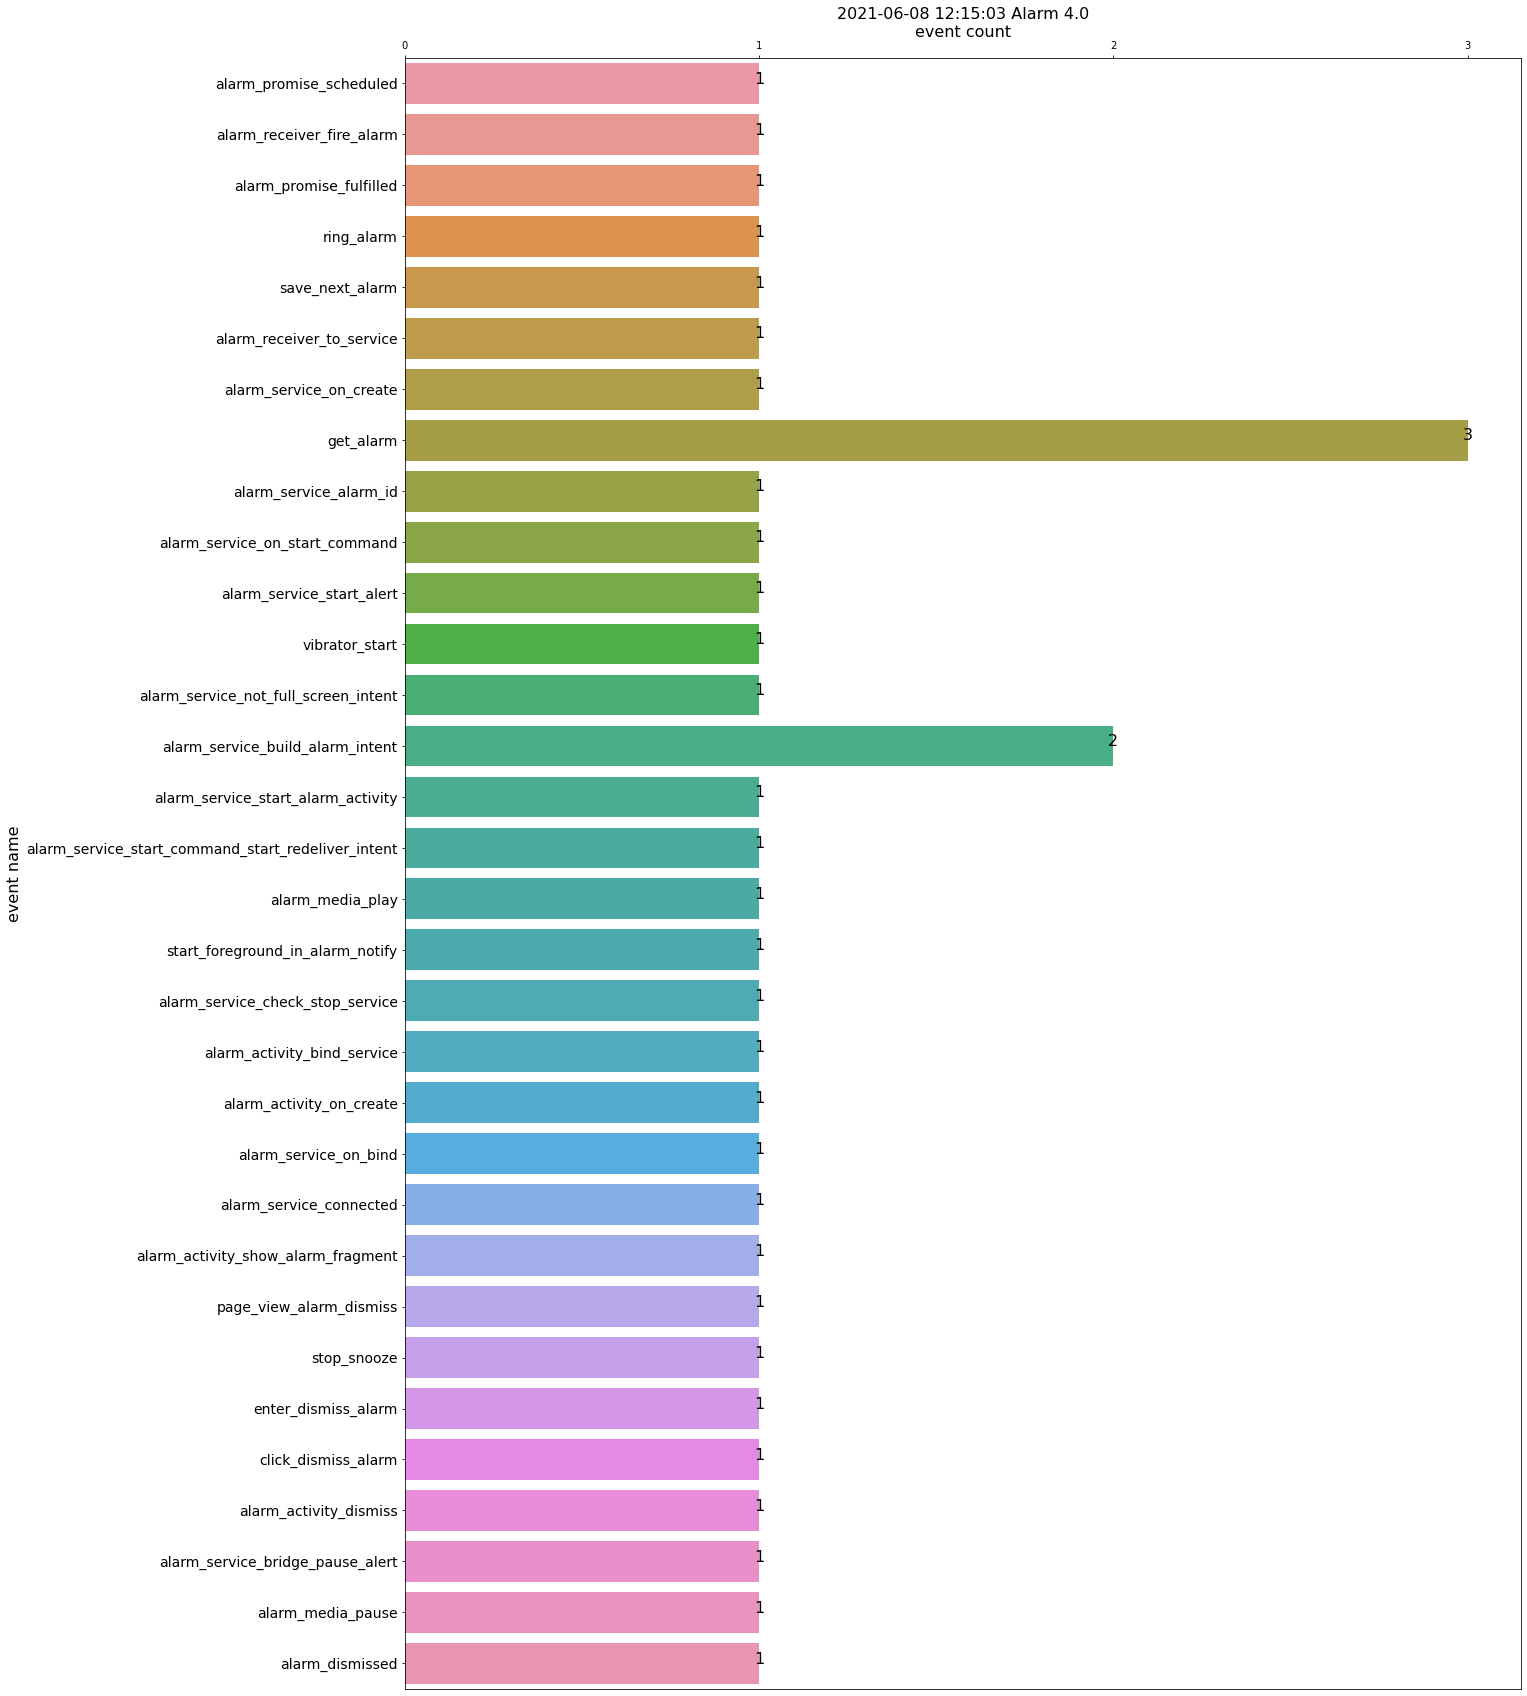

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Morning Glory'),
 ('alarm_alert_uri', 'content://media/internal/audio/media/52'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_6'),
 ('alarm_offset_time', 2837),
 ('alarm_promise_id', '74dffd47-c5a8-485f-ba9c-de408343f033'),
 ('alarm_time', 1623199500000),
 ('alarm_time_formatted', '2021-06-08 19:45:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1623199511564),
 ('fire_timestamp', 1623804300000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 19),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fals

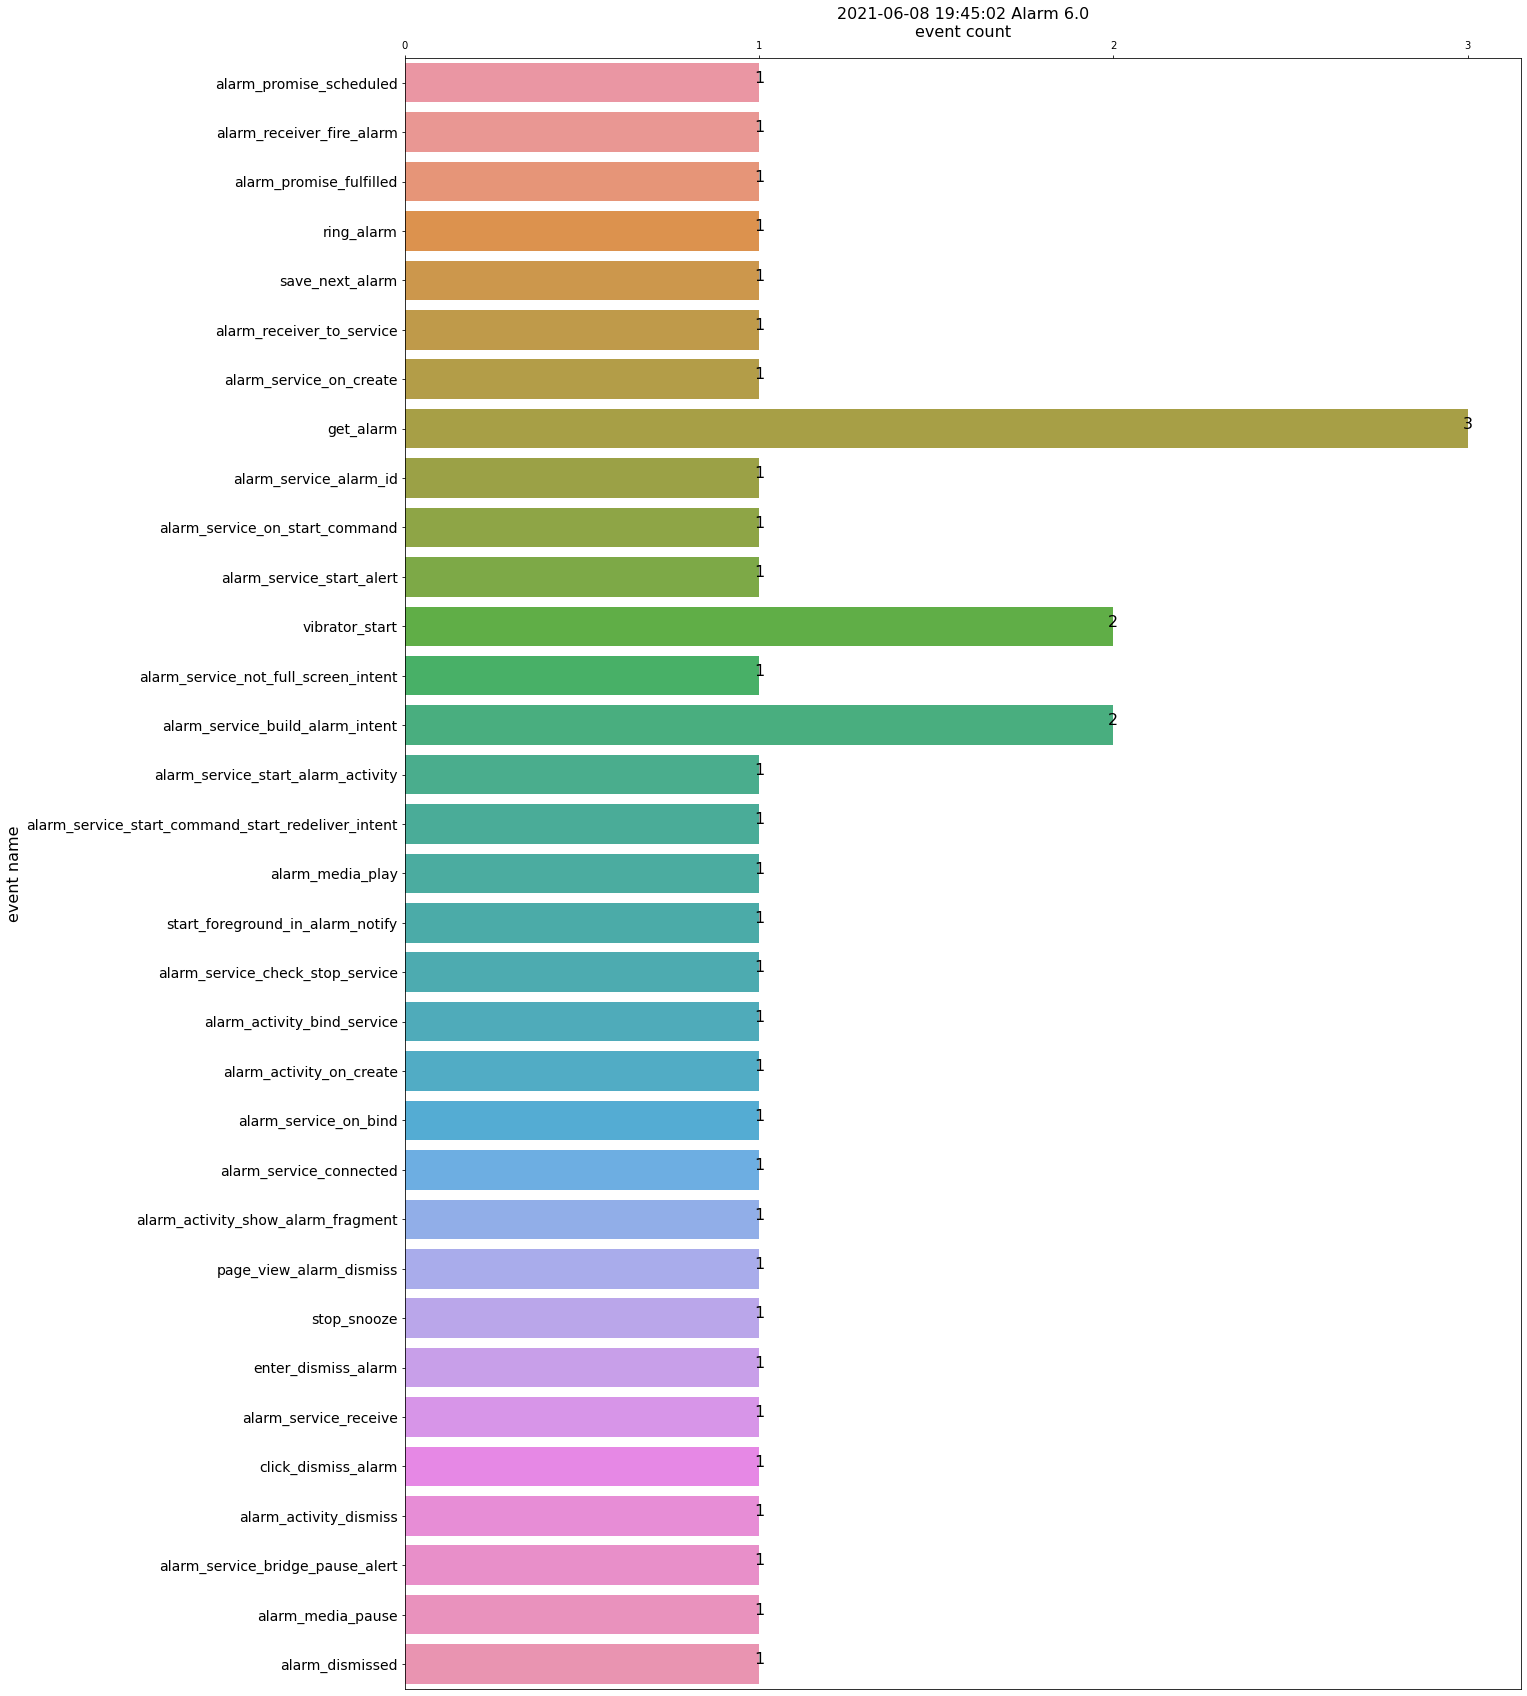

<ipython-input-140-da54811fe5a4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]


[('action', 'android.intent.action.SCREEN_ON'),
 ('alarm_alert_title', 'Minion wake up'),
 ('alarm_alert_uri', 'content://media/external/audio/media/1474'),
 ('alarm_id', 'cff6afc1-bc70-4e5d-a4e8-add37c6f1f42_1'),
 ('alarm_offset_time', 4408),
 ('alarm_promise_id', 'c3a61982-9dfe-49d5-b4cb-55d927af40ac'),
 ('alarm_time', 1623229260000),
 ('alarm_time_formatted', '2021-06-09 03:01:00'),
 ('alarm_volume', 15),
 ('auto_silence', '-1'),
 ('backup_sound', 'false'),
 ('barcode_id', ''),
 ('battery_opt', 'true'),
 ('dismiss_method', 0),
 ('dnd', 'false'),
 ('enable', 'true'),
 ('event_time', 1623229272817),
 ('fire_timestamp', 1623312060000),
 ('gradually_increase', 30),
 ('gradually_increase_volume', '30'),
 ('headset_connected', 'none'),
 ('hour', 3),
 ('is_back_up_sound_on', False),
 ('is_delayed', False),
 ('is_full_screen', False),
 ('is_mission_alarm', False),
 ('is_newly_created', True),
 ('is_overlapped', False),
 ('is_premium_on', False),
 ('is_quick_alarm', False),
 ('is_random', Fa

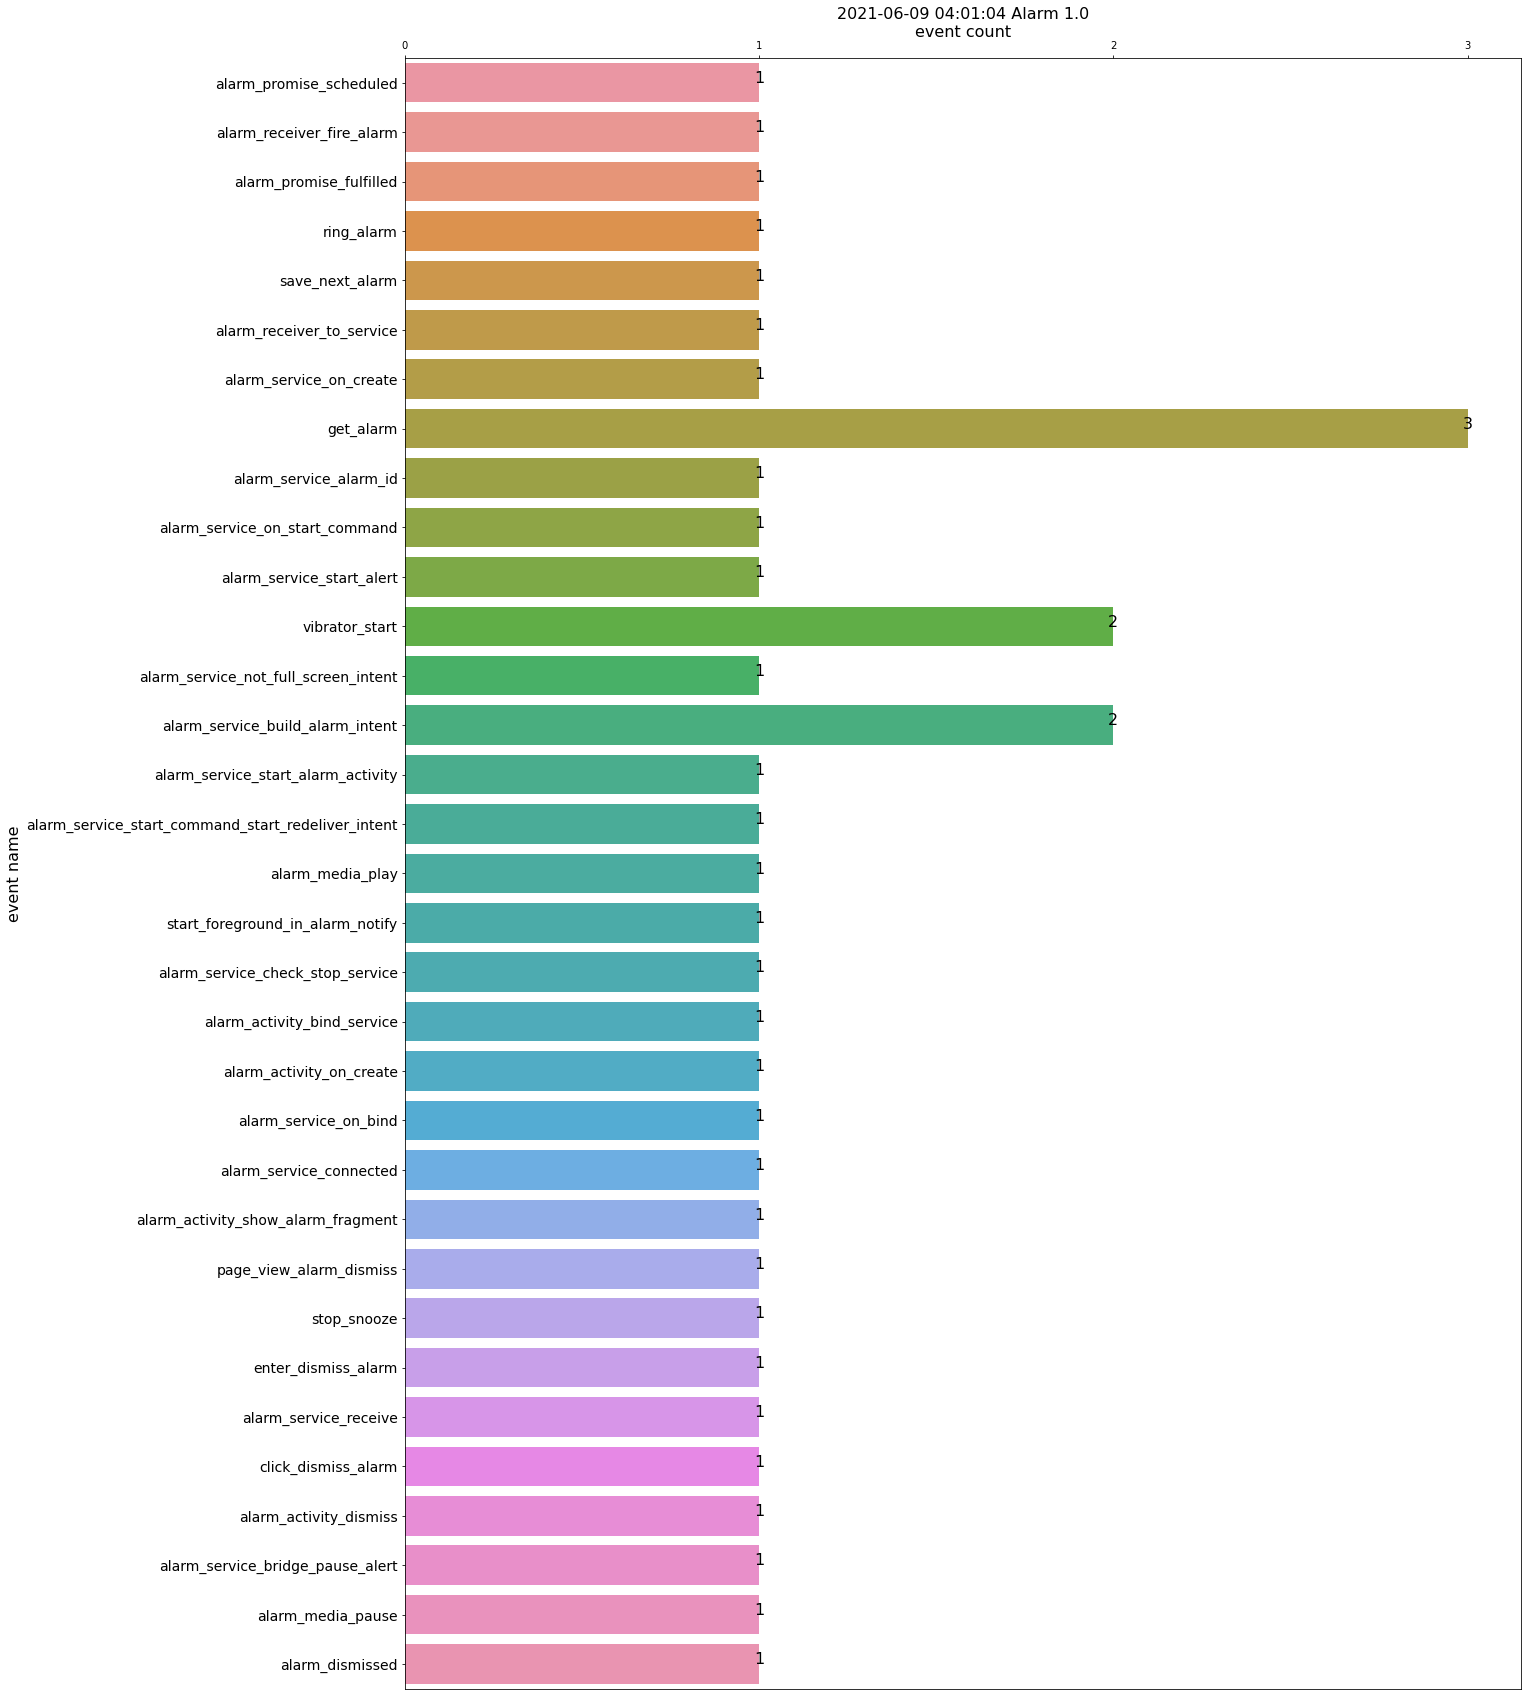

In [140]:
start_event_idxes = list(df[df['event name'] == start_event].index)
end_event_idxes = list(df[df['event name'] == end_event].index)

end_idx = end_event_idxes[0]

alarm_scheduled_logs = df[df['event name'] == scheduled_event]

for file in os.listdir('./alarm_logs'):
    os.remove(f"./alarm_logs/{file}")

for start_idx in start_event_idxes:
    while len(end_event_idxes) > 0 and end_idx < start_idx:
        end_idx = end_event_idxes.pop(0)
    
    alarm_log_df = df.loc[start_idx:end_idx]
    alarm_log_df = alarm_log_df[alarm_log_df['event name'] != scheduled_event]
    start_alarm_id = alarm_log_df.iloc[0]['alarm_id']
    end_alarm_id = alarm_log_df.iloc[-1]['alarm_id']

    ring_alarm_scheduled_logs = alarm_scheduled_logs.loc[:start_idx][alarm_scheduled_logs['alarm_id'] == end_alarm_id]

    if len(ring_alarm_scheduled_logs) > 0:
        alarm_log_df = pd.concat([ring_alarm_scheduled_logs.iloc[[-1]], alarm_log_df])

    properties = merge_alarm_properties(alarm_log_df)

    alarm_id = alarm_log_df.iloc[-1]['alarm_id']
    alarm_time = alarm_log_df.iloc[1]['timestamps']
    y = alarm_log_df['event name'].unique()
    x = alarm_log_df['event name'].value_counts()[y]
    
    # Visualize Alarm Logs
    pprint(sorted(properties.items()))
    figure, ax = plt.subplots(figsize=(20, len(properties) / 2 + len(alarm_log_df) / 3))
    plt.title(f"{alarm_time} Alarm {alarm_id}", size=16)
    plt.xticks(range(100))
    plt.yticks(size=14)
    graph = sns.barplot(x=x, y=y)
    for event, count in enumerate(x):
        graph.text(count, event, count, ha='center', size=16)
    plt.xlabel('event count', size=16)
    plt.ylabel('event name', size=16)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.show()
    plt.savefig(f'{alarm_log_path}/{file_name}.png', dpi=150)
    
    # Logging Alarm Logs
    alarm_log_df.to_csv(f'./alarm_logs/{alarm_time}_alarm_{end_alarm_id}.csv')